In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the display bars longer and spread out 100% across the screen width

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

#import xarray as xr
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

!whoami
!date

beatrixh
Mon Jun 14 14:10:01 PDT 2021


In [3]:
## from rajan: model results with the updated LRI prevalence and EMR, half-day time-steps, and seeds of 100,000 simulants can be found here

# 1.0 CAUSE MODEL: LRI, Diarrhea, Measles

In [4]:
%cd /ihme/costeffectiveness/results/vivarium_ciff_sam/v1.3_ajusted_lri_prevalence_no_wasting/ciff_sam/2021_06_14_09_47_56/count_data
%ls

/ihme/costeffectiveness/results/vivarium_ciff_sam/v1.3_ajusted_lri_prevalence_no_wasting/ciff_sam/2021_06_14_09_47_56/count_data
deaths.csv       population.csv         transition_count.csv  ylls.csv
deaths.hdf       population.hdf         transition_count.hdf  ylls.hdf
person_time.csv  state_person_time.csv  ylds.csv
person_time.hdf  state_person_time.hdf  ylds.hdf


In [5]:
# mkdir /home/j/Project/simulation_science/ciff_malnutrition/verification_and_validation/v1.3_causes/

In [6]:
master_dir = '/home/j/Project/simulation_science/ciff_malnutrition/'
sim_result_dir = '/ihme/costeffectiveness/results/vivarium_ciff_sam/v1.3_ajusted_lri_prevalence_no_wasting/ciff_sam/2021_06_14_09_47_56/count_data/'
output_dir = master_dir + f'verification_and_validation/v1.3_causes/'

In [7]:
deaths_explore = pd.read_csv(sim_result_dir + 'deaths.csv')
deaths_explore

Unnamed: 0     sex  year               cause measure  input_draw  \
0              0  female  2022  diarrheal_diseases   death          29   
1              1  female  2022  diarrheal_diseases   death          29   
2              2  female  2022  diarrheal_diseases   death          29   
3              3  female  2022  diarrheal_diseases   death          29   
...          ...     ...   ...                 ...     ...         ...   
1916        1916    male  2026        other_causes   death         946   
1917        1917    male  2026        other_causes   death         946   
1918        1918    male  2026        other_causes   death         946   
1919        1919    male  2026        other_causes   death         946   

      scenario  value             age  
0     baseline    3.0  early_neonatal  
1     baseline   18.0   late_neonatal  
2     baseline  308.0   post_neonatal  
3     baseline  521.0          1_to_4  
...        ...    ...             ...  
1916  baseline  367.0  early_neonatal  
1917  baseline   82.0   late_neonatal  
1918  baseline  129.0   post_neonatal  
1919  baseline  302.0          1_to_4  

[1920 rows x 9 columns]

In [8]:
deaths_explore.cause.unique()

array(['diarrheal_diseases', 'lower_respiratory_infections', 'measles',
       'other_causes'], dtype=object)

In [9]:
deaths_explore.input_draw.nunique()

12

In [10]:
deaths_explore.input_draw.unique()

array([ 29, 223, 232, 357, 394, 524, 602, 629, 650, 680, 829, 946])

In [11]:
deaths_explore.sex.unique()

array(['female', 'male'], dtype=object)

In [12]:
deaths_explore.year.unique()

array([2022, 2023, 2024, 2025, 2026])

In [13]:
#check with rajan how people are born

pt_explore = pd.read_csv(sim_result_dir + 'population.csv')
pt_explore

Unnamed: 0                     measure  input_draw  scenario      value
0            0            total_population          29  baseline  1169038.0
1            1            total_population         223  baseline  1169805.0
2            2            total_population         232  baseline  1168973.0
3            3            total_population         357  baseline  1168712.0
..         ...                         ...         ...       ...        ...
56          56  total_population_untracked         650  baseline        0.0
57          57  total_population_untracked         680  baseline        0.0
58          58  total_population_untracked         829  baseline        0.0
59          59  total_population_untracked         946  baseline        0.0

[60 rows x 5 columns]

In [14]:
#unit is person-years

pt_explore = pd.read_csv(sim_result_dir + 'person_time.csv')
pt_explore

Unnamed: 0     sex  year      measure  input_draw  scenario  \
0             0  female  2022  person_time          29  baseline   
1             1  female  2022  person_time          29  baseline   
2             2  female  2022  person_time          29  baseline   
3             3  female  2022  person_time          29  baseline   
..          ...     ...   ...          ...         ...       ...   
476         476    male  2026  person_time         946  baseline   
477         477    male  2026  person_time         946  baseline   
478         478    male  2026  person_time         946  baseline   
479         479    male  2026  person_time         946  baseline   

             value             age  
0       330.663179  early_neonatal  
1      1180.011837   late_neonatal  
2     57864.653217   post_neonatal  
3    388405.390876          1_to_4  
..             ...             ...  
476     325.407969  early_neonatal  
477     961.387382   late_neonatal  
478   15352.919591   post_neonatal  
479  110207.678888          1_to_4  

[480 rows x 8 columns]

In [15]:
statept_explore = pd.read_csv(sim_result_dir + 'state_person_time.csv')
statept_explore

Unnamed: 0     sex  year                   cause            measure  \
0              0  female  2022      diarrheal_diseases  state_person_time   
1              1  female  2022      diarrheal_diseases  state_person_time   
2              2  female  2022      diarrheal_diseases  state_person_time   
3              3  female  2022      diarrheal_diseases  state_person_time   
...          ...     ...   ...                     ...                ...   
2876        2876    male  2026  susceptible_to_measles  state_person_time   
2877        2877    male  2026  susceptible_to_measles  state_person_time   
2878        2878    male  2026  susceptible_to_measles  state_person_time   
2879        2879    male  2026  susceptible_to_measles  state_person_time   

      input_draw  scenario          value             age  
0             29  baseline       7.373032  early_neonatal  
1             29  baseline      55.716632   late_neonatal  
2             29  baseline    2321.665982   post_neonatal  
3             29  baseline    9487.587953          1_to_4  
...          ...       ...            ...             ...  
2876         946  baseline     325.648186  early_neonatal  
2877         946  baseline     961.453799   late_neonatal  
2878         946  baseline   15349.108830   post_neonatal  
2879         946  baseline  110252.355921          1_to_4  

[2880 rows x 9 columns]

In [16]:
statept_explore.cause.unique()

array(['diarrheal_diseases', 'lower_respiratory_infections', 'measles',
       'susceptible_to_diarrheal_diseases',
       'susceptible_to_lower_respiratory_infections',
       'susceptible_to_measles'], dtype=object)

In [17]:
transition_explore = pd.read_csv(sim_result_dir + 'transition_count.csv')
transition_explore

Unnamed: 0     sex  year  \
0              0  female  2022   
1              1  female  2022   
2              2  female  2022   
3              3  female  2022   
...          ...     ...   ...   
2876        2876    male  2026   
2877        2877    male  2026   
2878        2878    male  2026   
2879        2879    male  2026   

                                                measure  input_draw  scenario  \
0     diarrheal_diseases_to_susceptible_to_diarrheal...          29  baseline   
1     diarrheal_diseases_to_susceptible_to_diarrheal...          29  baseline   
2     diarrheal_diseases_to_susceptible_to_diarrheal...          29  baseline   
3     diarrheal_diseases_to_susceptible_to_diarrheal...          29  baseline   
...                                                 ...         ...       ...   
2876      susceptible_to_measles_to_measles_event_count         946  baseline   
2877      susceptible_to_measles_to_measles_event_count         946  baseline   
2878      susceptible_to_measles_to_measles_event_count         946  baseline   
2879      susceptible_to_measles_to_measles_event_count         946  baseline   

         value             age  
0        405.0  early_neonatal  
1       3409.0   late_neonatal  
2     149224.0   post_neonatal  
3     615203.0          1_to_4  
...        ...             ...  
2876       0.0  early_neonatal  
2877       0.0   late_neonatal  
2878     141.0   post_neonatal  
2879     567.0          1_to_4  

[2880 rows x 8 columns]

In [18]:
transition_explore.measure.unique()

array(['diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count',
       'lower_respiratory_infections_to_susceptible_to_lower_respiratory_infections_event_count',
       'measles_to_susceptible_to_measles_event_count',
       'susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count',
       'susceptible_to_lower_respiratory_infections_to_lower_respiratory_infections_event_count',
       'susceptible_to_measles_to_measles_event_count'], dtype=object)

# Sim results

In [19]:
def load_sim_count_data(sim_result_dir: str):
    columns = ['age', 'sex', 'year', 'input_draw', 'scenario', 'measure']
    df = {}
    fnames = ['deaths', 'transition_count', 'state_person_time', 'person_time']
    for fname in fnames:
        df[fname] = pd.read_csv(sim_result_dir + fname + '.csv', index_col=0)
        # get aggregated results if stratifications exist
        if 'cause' in df[fname].columns:
            df[fname] = df[fname].groupby(columns + ['cause']).value.sum().reset_index()
        else:
            df[fname] = df[fname].groupby(columns).value.sum().reset_index()
    return df

In [20]:
df = load_sim_count_data(sim_result_dir)

### DEATH counts 

In [21]:
#deaths

deaths_count_dd = df['deaths'].query('cause == "diarrheal_diseases"')
deaths_count_lri = df['deaths'].query('cause == "lower_respiratory_infections"')
deaths_count_msls = df['deaths'].query('cause == "measles"')
deaths_count_others = df['deaths'].query('cause == "other_causes"')

total_deaths_count = (df['deaths']
                     .groupby(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure'])
                     .value.sum()
                     .reset_index())

total_deaths_count['cause'] = 'all_causes'

### incidence counts

In [22]:
transition_explore = pd.read_csv(sim_result_dir + 'transition_count.csv') 
transition_explore

Unnamed: 0     sex  year  \
0              0  female  2022   
1              1  female  2022   
2              2  female  2022   
3              3  female  2022   
...          ...     ...   ...   
2876        2876    male  2026   
2877        2877    male  2026   
2878        2878    male  2026   
2879        2879    male  2026   

                                                measure  input_draw  scenario  \
0     diarrheal_diseases_to_susceptible_to_diarrheal...          29  baseline   
1     diarrheal_diseases_to_susceptible_to_diarrheal...          29  baseline   
2     diarrheal_diseases_to_susceptible_to_diarrheal...          29  baseline   
3     diarrheal_diseases_to_susceptible_to_diarrheal...          29  baseline   
...                                                 ...         ...       ...   
2876      susceptible_to_measles_to_measles_event_count         946  baseline   
2877      susceptible_to_measles_to_measles_event_count         946  baseline   
2878      susceptible_to_measles_to_measles_event_count         946  baseline   
2879      susceptible_to_measles_to_measles_event_count         946  baseline   

         value             age  
0        405.0  early_neonatal  
1       3409.0   late_neonatal  
2     149224.0   post_neonatal  
3     615203.0          1_to_4  
...        ...             ...  
2876       0.0  early_neonatal  
2877       0.0   late_neonatal  
2878     141.0   post_neonatal  
2879     567.0          1_to_4  

[2880 rows x 8 columns]

In [23]:
transition_explore.measure.unique()

array(['diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count',
       'lower_respiratory_infections_to_susceptible_to_lower_respiratory_infections_event_count',
       'measles_to_susceptible_to_measles_event_count',
       'susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count',
       'susceptible_to_lower_respiratory_infections_to_lower_respiratory_infections_event_count',
       'susceptible_to_measles_to_measles_event_count'], dtype=object)

In [24]:
#incidence counts 

#incident cases of diarrheal diseases: S to diarrhea
incidence_dd_count = (df['transition_count'].query('measure == "susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count"'))
incidence_dd_count['cause'] = 'diarrheal_disease'
incidence_dd_count['measure'] = 'incidence'

#incident cases of lri: S to LRI
incidence_lri_count = (df['transition_count'].query('measure == "susceptible_to_lower_respiratory_infections_to_lower_respiratory_infections_event_count"'))
incidence_lri_count['cause'] = 'lri'
incidence_lri_count['measure'] = 'incidence'

#incident cases of lri: S to measles
incidence_msls_count = (df['transition_count'].query('measure == "susceptible_to_measles_to_measles_event_count"'))
incidence_msls_count['cause'] = 'measles'
incidence_msls_count['measure'] = 'incidence'


In [25]:
incidence_msls_count

age     sex  year  input_draw  scenario    measure   value  \
5            1_to_4  female  2022          29  baseline  incidence  3728.0   
11           1_to_4  female  2022         223  baseline  incidence  6666.0   
17           1_to_4  female  2022         232  baseline  incidence  7617.0   
23           1_to_4  female  2022         357  baseline  incidence  4596.0   
...             ...     ...   ...         ...       ...        ...     ...   
2861  post_neonatal    male  2026         650  baseline  incidence   600.0   
2867  post_neonatal    male  2026         680  baseline  incidence   140.0   
2873  post_neonatal    male  2026         829  baseline  incidence   618.0   
2879  post_neonatal    male  2026         946  baseline  incidence   141.0   

        cause  
5     measles  
11    measles  
17    measles  
23    measles  
...       ...  
2861  measles  
2867  measles  
2873  measles  
2879  measles  

[480 rows x 8 columns]

In [26]:
# remission counts 

#incident cases of diarrheal diseases: S to diarrhea
remission_dd_count = (df['transition_count']
                      .query('measure == "diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count"'))
remission_dd_count['cause'] = 'diarrheal_disease'
remission_dd_count['measure'] = 'remission'

#incident cases of lri: S to LRIb
remission_lri_count = (df['transition_count']
                      .query('measure == "lower_respiratory_infections_to_susceptible_to_lower_respiratory_infections_event_count"'))
remission_lri_count['cause'] = 'lri'
remission_lri_count['measure'] = 'remission'

#incident cases of lri: S to measles
remission_msls_count = (df['transition_count']
                      .query('measure == "measles_to_susceptible_to_measles_event_count"'))
remission_msls_count['cause'] = 'measles'
remission_msls_count['measure'] = 'remission'


In [27]:
remission_msls_count

age     sex  year  input_draw  scenario    measure   value  \
2            1_to_4  female  2022          29  baseline  remission  3730.0   
8            1_to_4  female  2022         223  baseline  remission  6637.0   
14           1_to_4  female  2022         232  baseline  remission  7558.0   
20           1_to_4  female  2022         357  baseline  remission  4497.0   
...             ...     ...   ...         ...       ...        ...     ...   
2858  post_neonatal    male  2026         650  baseline  remission   578.0   
2864  post_neonatal    male  2026         680  baseline  remission   137.0   
2870  post_neonatal    male  2026         829  baseline  remission   592.0   
2876  post_neonatal    male  2026         946  baseline  remission   137.0   

        cause  
2     measles  
8     measles  
14    measles  
20    measles  
...       ...  
2858  measles  
2864  measles  
2870  measles  
2876  measles  

[480 rows x 8 columns]

### person-time

In [28]:
statept_explore = pd.read_csv(sim_result_dir + 'state_person_time.csv')
statept_explore

Unnamed: 0     sex  year                   cause            measure  \
0              0  female  2022      diarrheal_diseases  state_person_time   
1              1  female  2022      diarrheal_diseases  state_person_time   
2              2  female  2022      diarrheal_diseases  state_person_time   
3              3  female  2022      diarrheal_diseases  state_person_time   
...          ...     ...   ...                     ...                ...   
2876        2876    male  2026  susceptible_to_measles  state_person_time   
2877        2877    male  2026  susceptible_to_measles  state_person_time   
2878        2878    male  2026  susceptible_to_measles  state_person_time   
2879        2879    male  2026  susceptible_to_measles  state_person_time   

      input_draw  scenario          value             age  
0             29  baseline       7.373032  early_neonatal  
1             29  baseline      55.716632   late_neonatal  
2             29  baseline    2321.665982   post_neonatal  
3             29  baseline    9487.587953          1_to_4  
...          ...       ...            ...             ...  
2876         946  baseline     325.648186  early_neonatal  
2877         946  baseline     961.453799   late_neonatal  
2878         946  baseline   15349.108830   post_neonatal  
2879         946  baseline  110252.355921          1_to_4  

[2880 rows x 9 columns]

In [29]:
statept_explore.cause.unique()

array(['diarrheal_diseases', 'lower_respiratory_infections', 'measles',
       'susceptible_to_diarrheal_diseases',
       'susceptible_to_lower_respiratory_infections',
       'susceptible_to_measles'], dtype=object)

In [30]:
person_time_dd = df['state_person_time'].query('cause == "diarrheal_diseases"')
person_time_lri = df['state_person_time'].query('cause == "lower_respiratory_infections"')
person_time_msls = df['state_person_time'].query('cause == "measles"')

person_time_sus_dd = df['state_person_time'].query('cause == "susceptible_to_diarrheal_diseases"')
person_time_sus_lri = df['state_person_time'].query('cause == "susceptible_to_lower_respiratory_infections"')
person_time_sus_msls = df['state_person_time'].query('cause == "susceptible_to_measles"')

#person_time_pc['measure'] = 'prevalence'
#person_time_c['measure'] = 'prevalence'

In [31]:
person_time_sus_msls 

age     sex  year  input_draw  scenario            measure  \
5            1_to_4  female  2022          29  baseline  state_person_time   
11           1_to_4  female  2022         223  baseline  state_person_time   
17           1_to_4  female  2022         232  baseline  state_person_time   
23           1_to_4  female  2022         357  baseline  state_person_time   
...             ...     ...   ...         ...       ...                ...   
2861  post_neonatal    male  2026         650  baseline  state_person_time   
2867  post_neonatal    male  2026         680  baseline  state_person_time   
2873  post_neonatal    male  2026         829  baseline  state_person_time   
2879  post_neonatal    male  2026         946  baseline  state_person_time   

                       cause          value  
5     susceptible_to_measles  388299.331964  
11    susceptible_to_measles  389025.594798  
17    susceptible_to_measles  389342.598220  
23    susceptible_to_measles  388950.670773  
...                      ...            ...  
2861  susceptible_to_measles   15248.915811  
2867  susceptible_to_measles   15506.746064  
2873  susceptible_to_measles   15640.971937  
2879  susceptible_to_measles   15349.108830  

[480 rows x 8 columns]

# Measures

In [32]:
def get_measure(data: pd.DataFrame):
    # rate per PY among source population
    
    result = (data.set_index(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure', 'cause'])
              .div(df['person_time'].drop(columns='measure').set_index(['age', 'sex', 'year', 'input_draw', 'scenario']))
              .reset_index())
    
    result['age_group'] = np.where(result['age'] == 'early_neonatal', 1,
                              np.where(result['age'] == 'late_neonatal', 2,
                                       np.where(result['age'] == 'post_neonatal',3,
                                        4)))
    
    result_summary = (result
                      .groupby(['age_group', 'sex', 'year', 'scenario', 'measure', 'cause'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
    
    return result_summary

#note the numerator is 'data' and denominator is df['person_time]

### ACMR and CSMR

In [33]:
deaths_count_dd

age     sex  year  input_draw  scenario measure  \
0            1_to_4  female  2022          29  baseline   death   
4            1_to_4  female  2022         223  baseline   death   
8            1_to_4  female  2022         232  baseline   death   
12           1_to_4  female  2022         357  baseline   death   
...             ...     ...   ...         ...       ...     ...   
1904  post_neonatal    male  2026         650  baseline   death   
1908  post_neonatal    male  2026         680  baseline   death   
1912  post_neonatal    male  2026         829  baseline   death   
1916  post_neonatal    male  2026         946  baseline   death   

                   cause  value  
0     diarrheal_diseases  521.0  
4     diarrheal_diseases  257.0  
8     diarrheal_diseases  355.0  
12    diarrheal_diseases  233.0  
...                  ...    ...  
1904  diarrheal_diseases   83.0  
1908  diarrheal_diseases   44.0  
1912  diarrheal_diseases   37.0  
1916  diarrheal_diseases   34.0  

[480 rows x 8 columns]

In [34]:
df['person_time']

age     sex  year  input_draw  scenario      measure  \
0           1_to_4  female  2022          29  baseline  person_time   
1           1_to_4  female  2022         223  baseline  person_time   
2           1_to_4  female  2022         232  baseline  person_time   
3           1_to_4  female  2022         357  baseline  person_time   
..             ...     ...   ...         ...       ...          ...   
476  post_neonatal    male  2026         650  baseline  person_time   
477  post_neonatal    male  2026         680  baseline  person_time   
478  post_neonatal    male  2026         829  baseline  person_time   
479  post_neonatal    male  2026         946  baseline  person_time   

             value  
0    388405.390876  
1    389212.217632  
2    389553.955391  
3    389079.391287  
..             ...  
476   15265.295547  
477   15510.898834  
478   15657.611684  
479   15352.919591  

[480 rows x 7 columns]

In [35]:
# deaths acmr + csmr

acmr = get_measure(total_deaths_count)
deaths_dd = get_measure(deaths_count_dd)
deaths_lri = get_measure(deaths_count_lri)
deaths_msls = get_measure(deaths_count_msls)
deaths_other = get_measure(deaths_count_others)

In [36]:
acmr

age_group     sex  year  scenario measure       cause      mean      2.5%  \
0           1  female  2022  baseline   death  all_causes  0.818932  0.676980   
1           1  female  2023  baseline   death  all_causes  0.810028  0.565209   
2           1  female  2024  baseline   death  all_causes  0.805405  0.625977   
3           1  female  2025  baseline   death  all_causes  0.812833  0.621120   
..        ...     ...   ...       ...     ...         ...       ...       ...   
36          4    male  2023  baseline   death  all_causes  0.003612  0.002646   
37          4    male  2024  baseline   death  all_causes  0.003543  0.002657   
38          4    male  2025  baseline   death  all_causes  0.003621  0.002611   
39          4    male  2026  baseline   death  all_causes  0.003566  0.002444   

       97.5%  
0   0.984905  
1   0.911815  
2   0.974357  
3   0.944888  
..       ...  
36  0.004208  
37  0.004039  
38  0.004282  
39  0.004337  

[40 rows x 9 columns]

# PREVALENCE
#### 'prevalence' = 'infected_person_time' / 'person_time'


In [37]:
#numerator

person_time_dd.head() #40 rows

age     sex  year  input_draw  scenario            measure  \
0   1_to_4  female  2022          29  baseline  state_person_time   
6   1_to_4  female  2022         223  baseline  state_person_time   
12  1_to_4  female  2022         232  baseline  state_person_time   
18  1_to_4  female  2022         357  baseline  state_person_time   
24  1_to_4  female  2022         394  baseline  state_person_time   

                 cause         value  
0   diarrheal_diseases   9487.587953  
6   diarrheal_diseases   8298.139630  
12  diarrheal_diseases   9140.759754  
18  diarrheal_diseases   9596.414784  
24  diarrheal_diseases  11221.752225

In [38]:
#denominator

df['person_time'].head() #40 rows

age     sex  year  input_draw  scenario      measure          value
0  1_to_4  female  2022          29  baseline  person_time  388405.390876
1  1_to_4  female  2022         223  baseline  person_time  389212.217632
2  1_to_4  female  2022         232  baseline  person_time  389553.955391
3  1_to_4  female  2022         357  baseline  person_time  389079.391287
4  1_to_4  female  2022         394  baseline  person_time  388042.321094

In [39]:
# prevalence
prevalence_dd = get_measure(person_time_dd)
prevalence_lri = get_measure(person_time_lri)
prevalence_msls = get_measure(person_time_msls)

In [40]:
prevalence_dd.head()

age_group     sex  year  scenario            measure               cause  \
0          1  female  2022  baseline  state_person_time  diarrheal_diseases   
1          1  female  2023  baseline  state_person_time  diarrheal_diseases   
2          1  female  2024  baseline  state_person_time  diarrheal_diseases   
3          1  female  2025  baseline  state_person_time  diarrheal_diseases   
4          1  female  2026  baseline  state_person_time  diarrheal_diseases   

       mean      2.5%     97.5%  
0  0.022913  0.019521  0.025727  
1  0.022923  0.018788  0.026597  
2  0.023010  0.018836  0.026428  
3  0.022619  0.019799  0.024478  
4  0.022664  0.018199  0.025378

In [41]:
prevalence_lri.head()

age_group     sex  year  scenario            measure  \
0          1  female  2022  baseline  state_person_time   
1          1  female  2023  baseline  state_person_time   
2          1  female  2024  baseline  state_person_time   
3          1  female  2025  baseline  state_person_time   
4          1  female  2026  baseline  state_person_time   

                          cause      mean      2.5%     97.5%  
0  lower_respiratory_infections  0.000651  0.000485  0.000833  
1  lower_respiratory_infections  0.000620  0.000435  0.000941  
2  lower_respiratory_infections  0.000595  0.000362  0.000902  
3  lower_respiratory_infections  0.000612  0.000310  0.000914  
4  lower_respiratory_infections  0.000564  0.000401  0.000804

In [42]:
prevalence_msls.head()

age_group     sex  year  scenario            measure    cause  mean  2.5%  \
0          1  female  2022  baseline  state_person_time  measles   0.0   0.0   
1          1  female  2023  baseline  state_person_time  measles   0.0   0.0   
2          1  female  2024  baseline  state_person_time  measles   0.0   0.0   
3          1  female  2025  baseline  state_person_time  measles   0.0   0.0   
4          1  female  2026  baseline  state_person_time  measles   0.0   0.0   

   97.5%  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

# INCIDENCE 

In [43]:
#numerator: incidence_{cause}_count
incidence_dd_count
incidence_lri_count
incidence_msls_count

age     sex  year  input_draw  scenario    measure   value  \
5            1_to_4  female  2022          29  baseline  incidence  3728.0   
11           1_to_4  female  2022         223  baseline  incidence  6666.0   
17           1_to_4  female  2022         232  baseline  incidence  7617.0   
23           1_to_4  female  2022         357  baseline  incidence  4596.0   
...             ...     ...   ...         ...       ...        ...     ...   
2861  post_neonatal    male  2026         650  baseline  incidence   600.0   
2867  post_neonatal    male  2026         680  baseline  incidence   140.0   
2873  post_neonatal    male  2026         829  baseline  incidence   618.0   
2879  post_neonatal    male  2026         946  baseline  incidence   141.0   

        cause  
5     measles  
11    measles  
17    measles  
23    measles  
...       ...  
2861  measles  
2867  measles  
2873  measles  
2879  measles  

[480 rows x 8 columns]

In [44]:
incidence_msls_count.age.unique()

array(['1_to_4', 'early_neonatal', 'late_neonatal', 'post_neonatal'],
      dtype=object)

In [45]:
#denominator
person_time_sus_dd = df['state_person_time'].query('cause == "susceptible_to_diarrheal_diseases"')
person_time_sus_lri = df['state_person_time'].query('cause == "susceptible_to_lower_respiratory_infections"')
person_time_sus_msls = df['state_person_time'].query('cause == "susceptible_to_measles"')


In [46]:
def get_transition(data_numerator: pd.DataFrame, data_denominator: pd.DataFrame):
    # rate per PY among source population
    
    result = (data_numerator.set_index(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure', 'cause'])
              .div(data_denominator.drop(columns='measure').drop(columns='cause').set_index(['age', 'sex', 'year', 'input_draw', 'scenario']))
              .reset_index())
    
    #print(data_numerator)
    #print(data_denominator)
    
    result['age_group'] = np.where(result['age'] == 'early_neonatal', 1,
                              np.where(result['age'] == 'late_neonatal', 2,
                                       np.where(result['age'] == 'post_neonatal',3,
                                        4)))
    
    result_summary = (result
                      .groupby(['age_group','sex', 'year', 'scenario', 'measure','cause'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
    
    return result_summary

In [47]:
incidence_dd_count

age     sex  year  input_draw  scenario    measure     value  \
3            1_to_4  female  2022          29  baseline  incidence  613706.0   
9            1_to_4  female  2022         223  baseline  incidence  540015.0   
15           1_to_4  female  2022         232  baseline  incidence  620176.0   
21           1_to_4  female  2022         357  baseline  incidence  602894.0   
...             ...     ...   ...         ...       ...        ...       ...   
2859  post_neonatal    male  2026         650  baseline  incidence   49874.0   
2865  post_neonatal    male  2026         680  baseline  incidence   41570.0   
2871  post_neonatal    male  2026         829  baseline  incidence   50079.0   
2877  post_neonatal    male  2026         946  baseline  incidence   41820.0   

                  cause  
3     diarrheal_disease  
9     diarrheal_disease  
15    diarrheal_disease  
21    diarrheal_disease  
...                 ...  
2859  diarrheal_disease  
2865  diarrheal_disease  
2871  diarrheal_disease  
2877  diarrheal_disease  

[480 rows x 8 columns]

In [48]:
person_time_sus_dd

age     sex  year  input_draw  scenario            measure  \
3            1_to_4  female  2022          29  baseline  state_person_time   
9            1_to_4  female  2022         223  baseline  state_person_time   
15           1_to_4  female  2022         232  baseline  state_person_time   
21           1_to_4  female  2022         357  baseline  state_person_time   
...             ...     ...   ...         ...       ...                ...   
2859  post_neonatal    male  2026         650  baseline  state_person_time   
2865  post_neonatal    male  2026         680  baseline  state_person_time   
2871  post_neonatal    male  2026         829  baseline  state_person_time   
2877  post_neonatal    male  2026         946  baseline  state_person_time   

                                  cause          value  
3     susceptible_to_diarrheal_diseases  378913.972621  
9     susceptible_to_diarrheal_diseases  380910.045175  
15    susceptible_to_diarrheal_diseases  380409.796030  
21    susceptible_to_diarrheal_diseases  379478.904860  
...                                 ...            ...  
2859  susceptible_to_diarrheal_diseases   14558.468172  
2865  susceptible_to_diarrheal_diseases   14870.114990  
2871  susceptible_to_diarrheal_diseases   14948.433949  
2877  susceptible_to_diarrheal_diseases   14735.442847  

[480 rows x 8 columns]

In [49]:
# incidence
incidence_dd = get_transition(incidence_dd_count, person_time_sus_dd)
incidence_lri = get_transition(incidence_lri_count, person_time_sus_lri )
incidence_msls = get_transition(incidence_msls_count, person_time_sus_msls)

In [50]:
incidence_dd.head()

age_group     sex  year  scenario    measure              cause      mean  \
0          1  female  2022  baseline  incidence  diarrheal_disease  3.295863   
1          1  female  2023  baseline  incidence  diarrheal_disease  3.390196   
2          1  female  2024  baseline  incidence  diarrheal_disease  3.348332   
3          1  female  2025  baseline  incidence  diarrheal_disease  3.343491   
4          1  female  2026  baseline  incidence  diarrheal_disease  3.349668   

       2.5%     97.5%  
0  2.857332  3.644432  
1  2.796531  3.802611  
2  2.792779  3.677465  
3  2.919215  3.662069  
4  2.760457  3.677155

In [51]:
incidence_lri.head()

age_group     sex  year  scenario    measure cause      mean      2.5%  \
0          1  female  2022  baseline  incidence   lri  0.082330  0.060883   
1          1  female  2023  baseline  incidence   lri  0.084533  0.059030   
2          1  female  2024  baseline  incidence   lri  0.085617  0.055128   
3          1  female  2025  baseline  incidence   lri  0.091824  0.049462   
4          1  female  2026  baseline  incidence   lri  0.082561  0.061884   

      97.5%  
0  0.119957  
1  0.114327  
2  0.113807  
3  0.123719  
4  0.112533

In [52]:
incidence_msls.head()

age_group     sex  year  scenario    measure    cause  mean  2.5%  97.5%
0          1  female  2022  baseline  incidence  measles   0.0   0.0    0.0
1          1  female  2023  baseline  incidence  measles   0.0   0.0    0.0
2          1  female  2024  baseline  incidence  measles   0.0   0.0    0.0
3          1  female  2025  baseline  incidence  measles   0.0   0.0    0.0
4          1  female  2026  baseline  incidence  measles   0.0   0.0    0.0

In [53]:
incidence_msls.age_group.unique()

array([1, 2, 3, 4])

# REMISSION

In [54]:
# remission
remission_dd = get_transition(remission_dd_count, person_time_dd)
remission_lri = get_transition(remission_lri_count, person_time_lri )
remission_msls = get_transition(remission_msls_count, person_time_msls)

In [55]:
remission_dd.head()

age_group     sex  year  scenario    measure              cause       mean  \
0          1  female  2022  baseline  remission  diarrheal_disease  56.844252   
1          1  female  2023  baseline  remission  diarrheal_disease  56.906771   
2          1  female  2024  baseline  remission  diarrheal_disease  54.550652   
3          1  female  2025  baseline  remission  diarrheal_disease  55.676853   
4          1  female  2026  baseline  remission  diarrheal_disease  56.388998   

        2.5%      97.5%  
0  46.749515  64.289628  
1  47.044909  66.727422  
2  45.828505  65.903362  
3  48.738764  64.083870  
4  47.639953  66.426838

In [56]:
remission_lri.head()

age_group     sex  year  scenario    measure cause       mean       2.5%  \
0          1  female  2022  baseline  remission   lri  44.677411  25.381725   
1          1  female  2023  baseline  remission   lri  31.897228  17.052366   
2          1  female  2024  baseline  remission   lri  39.283322  16.774560   
3          1  female  2025  baseline  remission   lri  38.897018  20.336396   
4          1  female  2026  baseline  remission   lri  38.761121  20.745559   

       97.5%  
0  64.217591  
1  52.819092  
2  56.991120  
3  57.821885  
4  50.663631

In [57]:
remission_msls.head()

age_group     sex  year  scenario    measure    cause  mean  2.5%  97.5%
0          1  female  2022  baseline  remission  measles   NaN   NaN    NaN
1          1  female  2023  baseline  remission  measles   NaN   NaN    NaN
2          1  female  2024  baseline  remission  measles   NaN   NaN    NaN
3          1  female  2025  baseline  remission  measles   NaN   NaN    NaN
4          1  female  2026  baseline  remission  measles   NaN   NaN    NaN

# EXCESS MORTALITY RATE
#### 'excess_mortality_rate' = 'deaths from cause' / 'infected_person_time'

In [58]:
def get_emr(data_numerator: pd.DataFrame, data_denominator: pd.DataFrame):
    # rate per PY among source population
    
    result = (data_numerator.set_index(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure', 'cause'])
              .div(data_denominator.drop(columns='measure').drop(columns='cause').set_index(['age', 'sex', 'year', 'input_draw', 'scenario']))
              .reset_index())
    
    #print(data_numerator)
    #print(data_denominator)
    
    result['age_group'] = np.where(result['age'] == 'early_neonatal', 1,
                              np.where(result['age'] == 'late_neonatal', 2,
                                       np.where(result['age'] == 'post_neonatal',3,
                                        4)))
    
    result_summary = (result
                      .groupby(['age_group', 'sex', 'year', 'scenario', 'measure','cause'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
    
    return result_summary

In [59]:
emr_dd = get_emr(deaths_count_dd, person_time_dd)
emr_lri = get_emr(deaths_count_lri, person_time_lri)
emr_msls = get_emr(deaths_count_msls, person_time_msls)

In [60]:
emr_dd.head()

age_group     sex  year  scenario measure               cause      mean  \
0          1  female  2022  baseline   death  diarrheal_diseases  0.220829   
1          1  female  2023  baseline   death  diarrheal_diseases  0.322433   
2          1  female  2024  baseline   death  diarrheal_diseases  0.424160   
3          1  female  2025  baseline   death  diarrheal_diseases  0.472119   
4          1  female  2026  baseline   death  diarrheal_diseases  0.284498   

       2.5%     97.5%  
0  0.000000  0.424447  
1  0.000000  0.673328  
2  0.135541  0.866280  
3  0.180103  1.043359  
4  0.034540  0.637251

In [61]:
emr_lri.head()

age_group     sex  year  scenario measure                         cause  \
0          1  female  2022  baseline   death  lower_respiratory_infections   
1          1  female  2023  baseline   death  lower_respiratory_infections   
2          1  female  2024  baseline   death  lower_respiratory_infections   
3          1  female  2025  baseline   death  lower_respiratory_infections   
4          1  female  2026  baseline   death  lower_respiratory_infections   

        mean       2.5%      97.5%  
0  20.133549  10.030281  44.594105  
1  19.340421   0.884967  36.242928  
2  17.704767   2.625980  35.500046  
3  21.643294   1.217500  64.607444  
4  15.906452   2.103534  31.121980

In [62]:
emr_msls.head()

age_group     sex  year  scenario measure    cause  mean  2.5%  97.5%
0          1  female  2022  baseline   death  measles   NaN   NaN    NaN
1          1  female  2023  baseline   death  measles   NaN   NaN    NaN
2          1  female  2024  baseline   death  measles   NaN   NaN    NaN
3          1  female  2025  baseline   death  measles   NaN   NaN    NaN
4          1  female  2026  baseline   death  measles   NaN   NaN    NaN

In [63]:
emr_msls.age_group.unique()

array([1, 2, 3, 4])

# ARTIFACT

In [64]:
#filepath

%cd /ihme/costeffectiveness/artifacts/vivarium_ciff_sam/
%ls

/ihme/costeffectiveness/artifacts/vivarium_ciff_sam
ethiopia.hdf


In [65]:
from vivarium import Artifact

#explore the artifact data (note age groups)
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf', filter_terms=['year_start == 2019', 'age_start >=  0.076712', f'age_end <= 5'])

In [66]:
#load population structure

art_pop = art.load('population.structure').reset_index()
art_pop

location     sex  age_start  age_end  year_start  year_end         value
0  Ethiopia  Female   0.076712      1.0        2019      2020  1.573806e+06
1  Ethiopia  Female   1.000000      5.0        2019      2020  6.437387e+06
2  Ethiopia    Male   0.076712      1.0        2019      2020  1.651227e+06
3  Ethiopia    Male   1.000000      5.0        2019      2020  6.742224e+06

In [67]:
art.keys

['metadata.keyspace',
 'metadata.locations',
 'population.location',
 'population.structure',
 'population.age_bins',
 'population.demographic_dimensions',
 'population.theoretical_minimum_risk_life_expectancy',
 'cause.all_causes.cause_specific_mortality_rate',
 'covariate.live_births_by_sex.estimate',
 'cause.diarrheal_diseases.prevalence',
 'cause.diarrheal_diseases.incidence_rate',
 'cause.diarrheal_diseases.remission_rate',
 'cause.diarrheal_diseases.disability_weight',
 'cause.diarrheal_diseases.excess_mortality_rate',
 'cause.diarrheal_diseases.cause_specific_mortality_rate',
 'cause.diarrheal_diseases.restrictions',
 'cause.measles.prevalence',
 'cause.measles.incidence_rate',
 'cause.measles.disability_weight',
 'cause.measles.excess_mortality_rate',
 'cause.measles.cause_specific_mortality_rate',
 'cause.measles.restrictions',
 'cause.lower_respiratory_infections.incidence_rate',
 'cause.lower_respiratory_infections.remission_rate',
 'cause.lower_respiratory_infections.disabi

In [68]:
art_msls_incidence = art.load('cause.measles.incidence_rate').reset_index()
art_msls_incidence

sex  age_start  age_end  year_start  year_end    draw_0    draw_1  \
0  Female   0.076712      1.0        2019      2020  0.024282  0.025631   
1  Female   1.000000      5.0        2019      2020  0.016045  0.016931   
2    Male   0.076712      1.0        2019      2020  0.026158  0.027612   
3    Male   1.000000      5.0        2019      2020  0.015655  0.016522   

     draw_2    draw_3    draw_4  ...  draw_990  draw_991  draw_992  draw_993  \
0  0.042767  0.008247  0.022174  ...  0.016154  0.033263  0.030494  0.036621   
1  0.028266  0.005453  0.014655  ...  0.010677  0.021984  0.020149  0.024192   
2  0.046070  0.008884  0.023886  ...  0.017401  0.035832  0.032849  0.039451   
3  0.027572  0.005319  0.014297  ...  0.010416  0.021446  0.019659  0.023605   

   draw_994  draw_995  draw_996  draw_997  draw_998  draw_999  
0  0.014697  0.021329  0.014435  0.005242  0.023575  0.007784  
1  0.009715  0.014100  0.009541  0.003465  0.015585  0.005147  
2  0.015831  0.022976  0.015549  0.005646  0.025395  0.008385  
3  0.009477  0.013754  0.009308  0.003380  0.015202  0.005021  

[4 rows x 1005 columns]

In [69]:
# define function to load data from artifact for a specified cause and measure
# this function is called in the next function below

def load_artifact_data(cause:str, measure:str):
    master_art_data = pd.DataFrame()
    for i in ['ethiopia']: #in case there are other countries
        art = Artifact('' + i + '.hdf', 
                   filter_terms=['year_start == 2019', 'age_start < 5'])
        data = art.load('cause.' + cause + '.' + measure)
        #data = pd.DataFrame(data.mean(axis=1)).reset_index().rename(columns={0:'value'})
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
        
        #print(data)
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['age'] = 0
        data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', 
                                   np.where(data['age_end'] == 1, 'post_neonatal',
                                            np.where(data['age_start'] == 1, '1_to_4', 
                                                    'late_neonatal')))
        
        data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == 'post_neonatal', 3, 
                                                    4)))
        
        
        data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
   
    master_art_data = master_art_data.append(data)
        
    return master_art_data

In [70]:
incidence_lri.age_group.unique()

array([1, 2, 3, 4])

# PLOT sim vs artifact

In [71]:
def add_age_midpoint(data: pd.DataFrame, output: str):
    data = data.copy()
    if output == 'sim':
        data['age_midpoint'] = list(map(lambda x, y: y-int(x.split('_to_')[1])+2, data['age'], data['year']))
    else:
        data['age_midpoint'] = data['age_group'].map(lambda x: int(x.split(' ')[0])+2)
    return data

### ART DATA

In [72]:
#ARTIFACT

#mortality
art_acmr = load_artifact_data('all_causes', 'cause_specific_mortality_rate')
art_csmr_dd = load_artifact_data('diarrheal_diseases','cause_specific_mortality_rate')
art_csmr_lri = load_artifact_data('lower_respiratory_infections','cause_specific_mortality_rate')
art_csmr_msls = load_artifact_data('measles','cause_specific_mortality_rate')

#prevalence 
art_prevalence_dd = load_artifact_data('diarrheal_diseases','prevalence')
art_prevalence_lri = load_artifact_data('lower_respiratory_infections','prevalence')
art_prevalence_msls = load_artifact_data('measles','prevalence')

#incidence
art_incidence_dd = load_artifact_data('diarrheal_diseases','incidence_rate')
art_incidence_lri = load_artifact_data('lower_respiratory_infections', 'incidence_rate')
art_incidence_msls = load_artifact_data('measles','incidence_rate')

#remission
art_remission_dd = load_artifact_data('diarrheal_diseases','remission_rate')
art_remission_lri = load_artifact_data('lower_respiratory_infections','remission_rate')
#art_remission_msls = load_artifact_data('measles','remission_rate')

#emr
art_emr_dd = load_artifact_data('diarrheal_diseases','excess_mortality_rate')
art_emr_lri = load_artifact_data('lower_respiratory_infections','excess_mortality_rate')
art_emr_msls = load_artifact_data('measles','excess_mortality_rate')

In [73]:
art_acmr

sex  age_start   age_end  year_start  year_end      mean      2.5%  \
0  female   0.000000  0.019178        2019      2020  0.869707  0.700294   
1  female   0.019178  0.076712        2019      2020  0.098099  0.078973   
2  female   0.076712  1.000000        2019      2020  0.012703  0.010194   
3  female   1.000000  5.000000        2019      2020  0.003620  0.002928   
4    male   0.000000  0.019178        2019      2020  1.288269  1.000185   
5    male   0.019178  0.076712        2019      2020  0.120528  0.093655   
6    male   0.076712  1.000000        2019      2020  0.014020  0.010861   
7    male   1.000000  5.000000        2019      2020  0.003827  0.002977   

      97.5%  location                        measure             age  \
0  1.093357  Ethiopia  cause_specific_mortality_rate  early_neonatal   
1  0.123338  Ethiopia  cause_specific_mortality_rate   late_neonatal   
2  0.015891  Ethiopia  cause_specific_mortality_rate   post_neonatal   
3  0.004488  Ethiopia  cause_specific_mortality_rate          1_to_4   
4  1.676748  Ethiopia  cause_specific_mortality_rate  early_neonatal   
5  0.156448  Ethiopia  cause_specific_mortality_rate   late_neonatal   
6  0.018239  Ethiopia  cause_specific_mortality_rate   post_neonatal   
7  0.004912  Ethiopia  cause_specific_mortality_rate          1_to_4   

   age_group  
0          1  
1          2  
2          3  
3          4  
4          1  
5          2  
6          3  
7          4

### SIM DATA 

In [74]:
#SIM

#mortality (5)
acmr = get_measure(total_deaths_count)
acmr['measure'] = 'acmr'
deaths_dd = get_measure(deaths_count_dd)
deaths_dd['measure'] = 'csmr_dd'
deaths_lri = get_measure(deaths_count_lri)
deaths_lri['measure'] = 'csmr_lri'
deaths_msls = get_measure(deaths_count_msls)
deaths_msls['measure'] = 'csmr_msls'
deaths_other = get_measure(deaths_count_others)
deaths_other['measure'] = 'csmr_other'

#prevalence (3)
prevalence_dd = get_measure(person_time_dd)
prevalence_dd['measure'] = 'prevalence_dd'
prevalence_lri = get_measure(person_time_lri)
prevalence_lri['measure'] = 'prevalence_lri'
prevalence_msls = get_measure(person_time_msls)
prevalence_msls['measure'] = 'prevalence_msls'

#incidence (3)
incidence_dd = get_transition(incidence_dd_count, person_time_sus_dd)
incidence_dd['measure'] = 'incidence_dd'
incidence_lri = get_transition(incidence_lri_count, person_time_sus_lri)
incidence_lri['measure'] = 'incidence_lri'
incidence_msls = get_transition(incidence_msls_count, person_time_sus_msls)
incidence_msls['measure'] = 'incidence_msls'

#remission (3)
remission_dd = get_transition(remission_dd_count, person_time_dd)
remission_dd['measure'] = 'remission_dd'
remission_lri = get_transition(remission_lri_count, person_time_lri )
remission_lri['measure'] = 'remission_lri'
remission_msls = get_transition(remission_msls_count, person_time_msls)
remission_msls['measure'] = 'remission_msls'

#emr (3)
emr_dd = get_emr(deaths_count_dd, person_time_dd)
emr_dd['measure'] = 'emr_dd'
emr_lri = get_emr(deaths_count_lri, person_time_lri)
emr_dd['measure'] = 'emr_lri'
emr_msls = get_emr(deaths_count_msls, person_time_msls)
emr_dd['measure'] = 'emr_msls'

In [75]:
emr_dd

age_group     sex  year  scenario   measure               cause      mean  \
0           1  female  2022  baseline  emr_msls  diarrheal_diseases  0.220829   
1           1  female  2023  baseline  emr_msls  diarrheal_diseases  0.322433   
2           1  female  2024  baseline  emr_msls  diarrheal_diseases  0.424160   
3           1  female  2025  baseline  emr_msls  diarrheal_diseases  0.472119   
..        ...     ...   ...       ...       ...                 ...       ...   
36          4    male  2023  baseline  emr_msls  diarrheal_diseases  0.034534   
37          4    male  2024  baseline  emr_msls  diarrheal_diseases  0.035159   
38          4    male  2025  baseline  emr_msls  diarrheal_diseases  0.034933   
39          4    male  2026  baseline  emr_msls  diarrheal_diseases  0.036184   

        2.5%     97.5%  
0   0.000000  0.424447  
1   0.000000  0.673328  
2   0.135541  0.866280  
3   0.180103  1.043359  
..       ...       ...  
36  0.019961  0.047395  
37  0.020165  0.046529  
38  0.017955  0.048996  
39  0.017166  0.048967  

[40 rows x 9 columns]

In [77]:
def plot_sim_vs_artifact(sim_data: pd.DataFrame, artifact_data: pd.DataFrame, sim_year: int, art_year: int, sex: str, sim_measure: str):
        
        
    ## add age label
    age_labels = {1: 'early_neonatal', 2: 'late_neonatal', 3: 'post_neonatal', 4: '1_to_4'}
    sim_data['age_label'] = sim_data.age_group.map(age_labels)
    artifact_data['age_label'] = artifact_data.age_group.map(age_labels)
    
    sim_sub = sim_data[(sim_data.scenario == 'baseline') & (sim_data.year == sim_year) & (sim_data.sex == sex)]
    artifact_sub = artifact_data[(artifact_data.year_start == art_year) & (artifact_data.sex == sex)]
    
#     fig, ax = plt.subplots() #
    plt.figure(figsize=(6, 4), dpi=120)
    plt.plot(sim_sub['age_group'], sim_sub['mean'], marker='o', label='sim baseline')
    plt.fill_between(sim_sub['age_group'], sim_sub['2.5%'], sim_sub['97.5%'], alpha=.3)
    plt.plot(artifact_sub['age_group'], artifact_sub['mean'], marker='o', label='artifact (2019)')
    plt.fill_between(artifact_sub['age_group'], artifact_sub['2.5%'], artifact_sub['97.5%'], alpha=.3)
    plt.title(f'{sim_year}, {sex}')
    plt.xlabel('Age')
    plt.xticks(ticks = [1, 2, 3, 4], labels = ['early neonatal', 'late neonatal', 'post neonatal', '1 to 4'], rotation = 45) 
    
    if sim_measure == 'acmr':
        plt.ylabel('Deaths due to all causes\n (per PY)')
    elif sim_measure == 'csmr_dd':
        plt.ylabel(f'Deaths due to diarrhea\n (per PY)')
    elif sim_measure == 'csmr_lri':
        plt.ylabel(f'Deaths due to lri\n (per PY)')
    elif sim_measure == 'csmr_msls':
        plt.ylabel(f'Deaths due to measles\n (per PY)')
    elif sim_measure == 'csmr_other':
        plt.ylabel(f'Deaths due to other causes\n (per PY)')
    elif sim_measure == 'prevalence_dd':
        plt.ylabel(f'Prevalence of diarrhea\n (per PY)')
    elif sim_measure == 'prevalence_lri':
        plt.ylabel(f'Prevalence of LRI\n (per PY)')    
    elif sim_measure == 'prevalence_msls':
        plt.ylabel(f'Prevalence of measles\n (per PY)')     
    elif sim_measure == 'incidence_dd':
        plt.ylabel(f'Incidence of diarrhea\n (per PY)')       
    elif sim_measure == 'incidence_lri':
        plt.ylabel(f'Incidence of LRI\n (per PY)')         
    elif sim_measure == 'incidence_msls':
        plt.ylabel(f'Incidence of measles\n (per PY)') 
    elif sim_measure == 'remission_dd':
        plt.ylabel(f'Remission of diarrhea\n (Cases per PY)')
    elif sim_measure == 'remission_lri':
        plt.ylabel(f'Remission of LRI\n (Cases per PY)')
    elif sim_measure == 'remission_msls':
        plt.ylabel(f'Remission of measles\n (Cases per PY)')
    elif sim_measure == 'emr_dd':
        plt.ylabel(f'Excess mortality rate of diarrhea\n (Cases per PY)')
    elif sim_measure == 'emr_lri':
        plt.ylabel(f'Excess mortality rate of LRI\n (Cases per PY)')
    elif sim_measure == 'emr_msls':
        plt.ylabel(f'Excess mortality rate of measles\n (Cases per PY)')
    else: # measure == 'prevalence'
        plt.ylabel(f'xxx\n (proportion)')
        
        
    plt.legend(loc=(1.05, .1))
#     plt.grid()

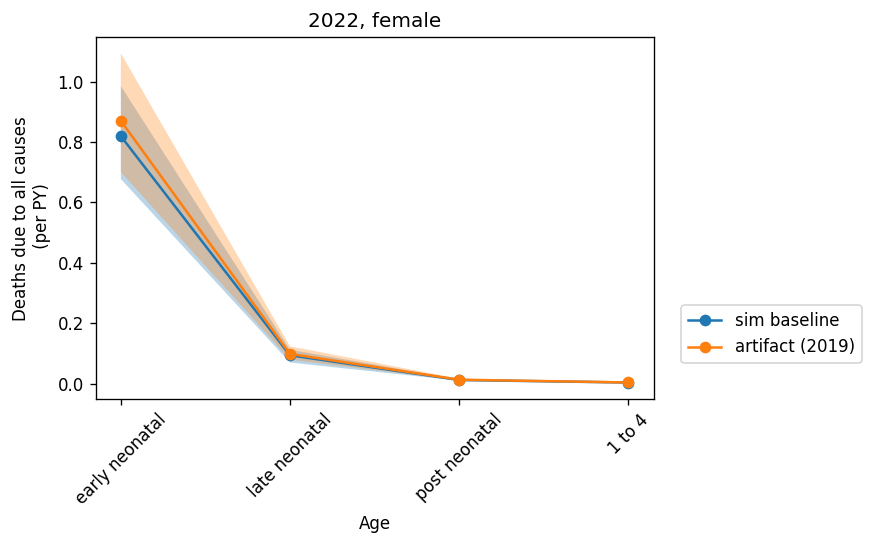

In [78]:
#plot_sim_vs_artifact(sim_data: pd.DataFrame, artifact_data: pd.DataFrame, sim_year: int, art_year: int, sex: str, sim_measure: str):
plot_sim_vs_artifact(acmr, art_acmr, 2022, 2019, 'female', 'acmr')

In [85]:
ls /home/j/Project/simulation_science/ciff_malnutrition/verification_and_validation/v1.3_causes/

all_cause_mortality.pdf  diarrhea_remission.pdf  lri_remission.pdf
diarrhea_emr.pdf         lri_emr.pdf             measles_emr.pdf
diarrhea_incidence.pdf   lri_incidence.pdf       measles_incidence.pdf
diarrhea_mortality.pdf   lri_mortality.pdf       measles_mortality.pdf
diarrhea_prevalence.pdf  lri_prevalence.pdf      measles_prevalence.pdf


In [79]:
output_dir

'/home/j/Project/simulation_science/ciff_malnutrition/verification_and_validation/v1.3_causes/'

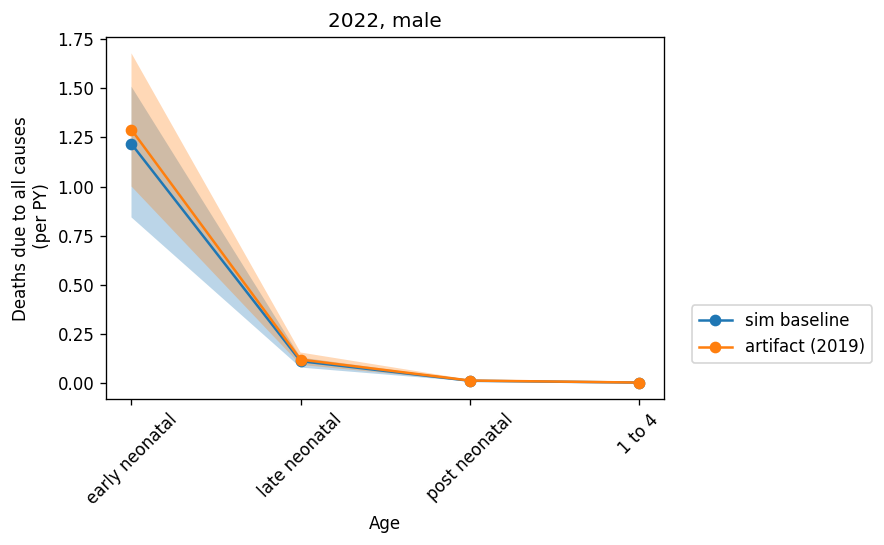

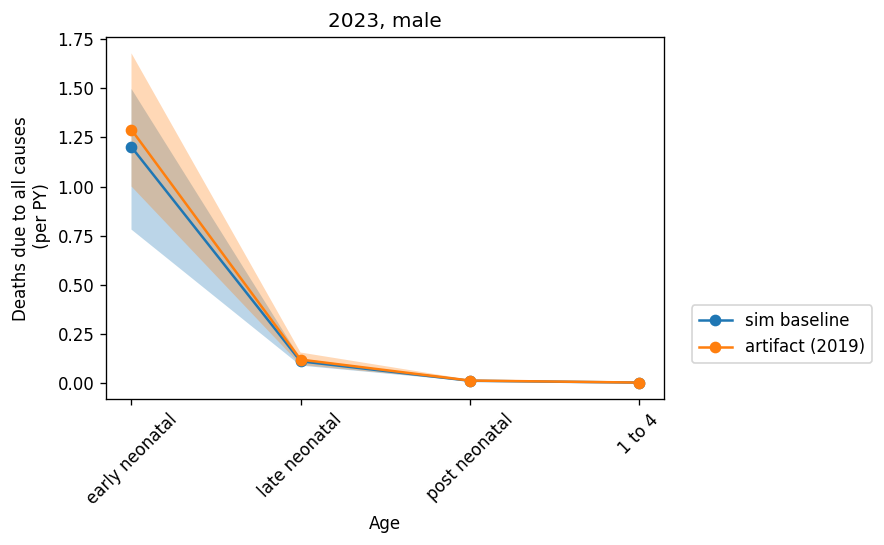

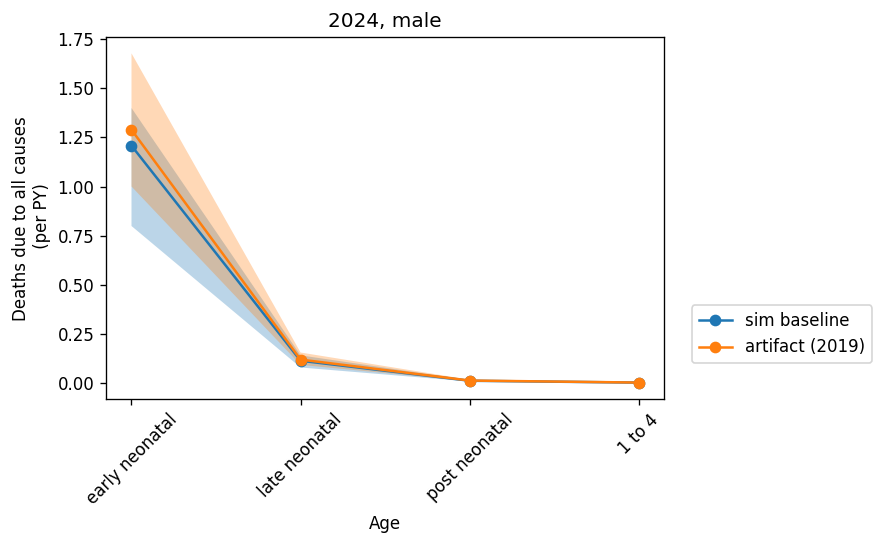

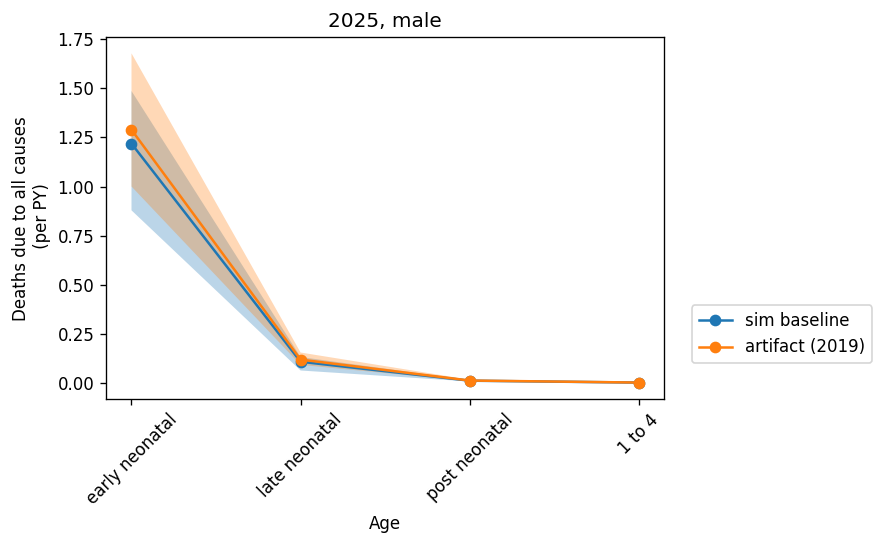

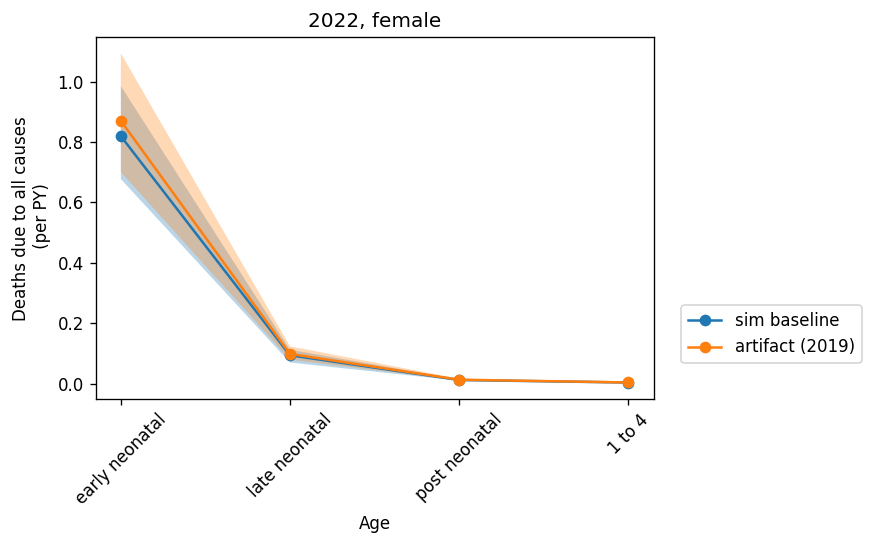

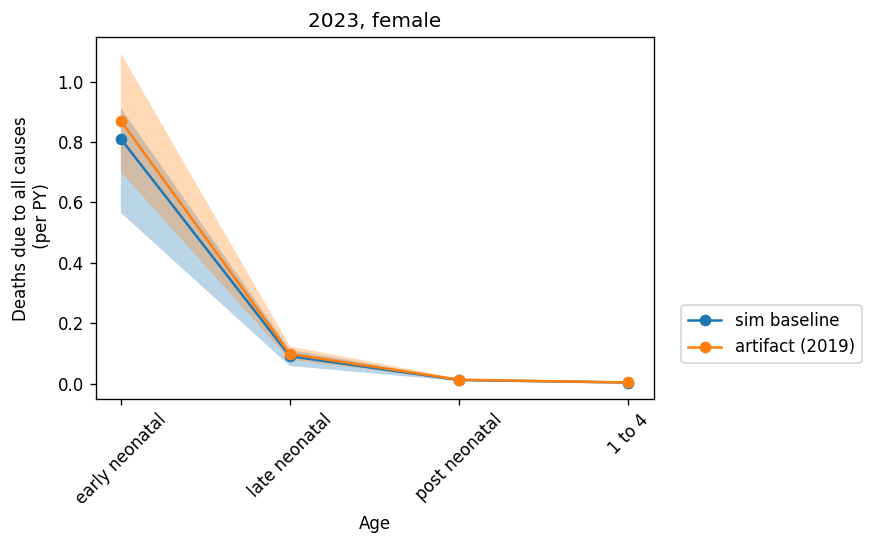

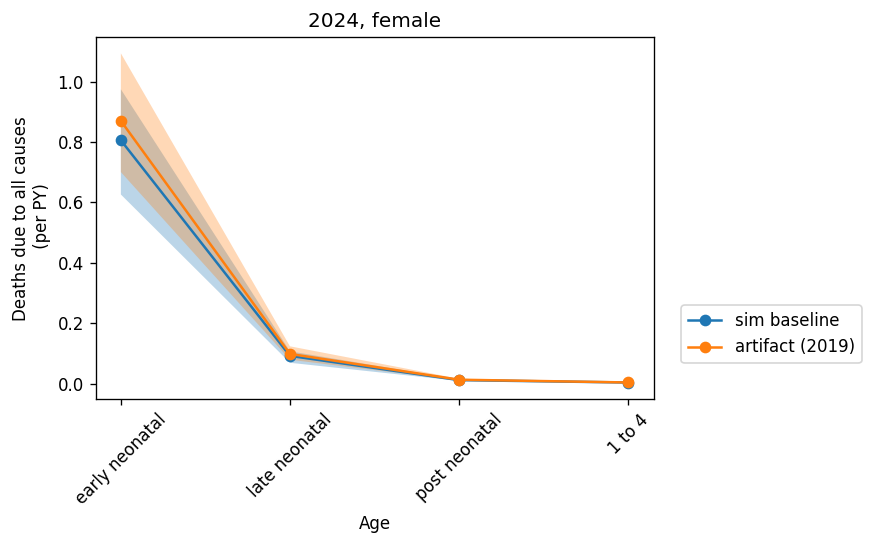

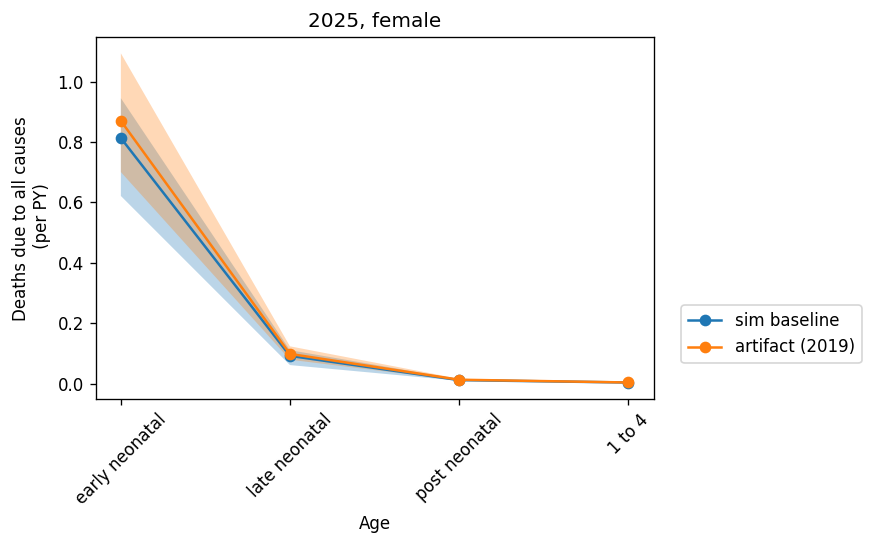

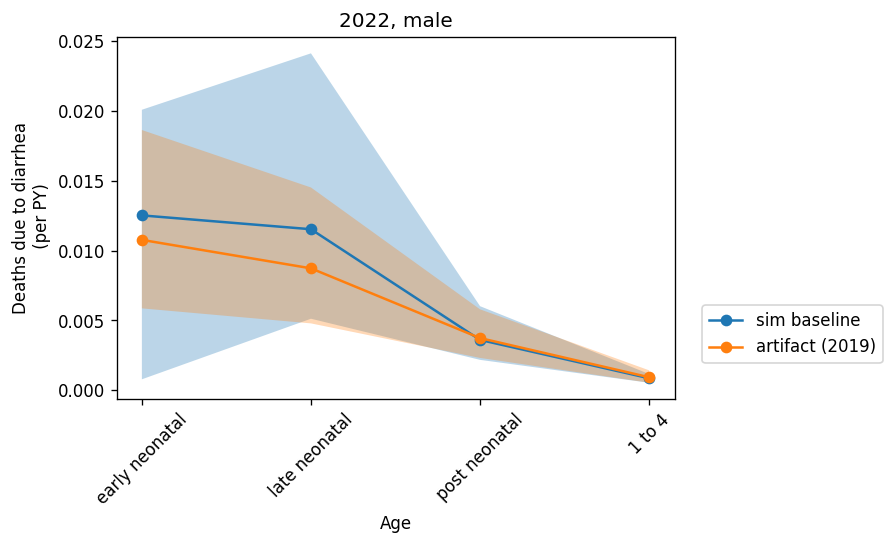

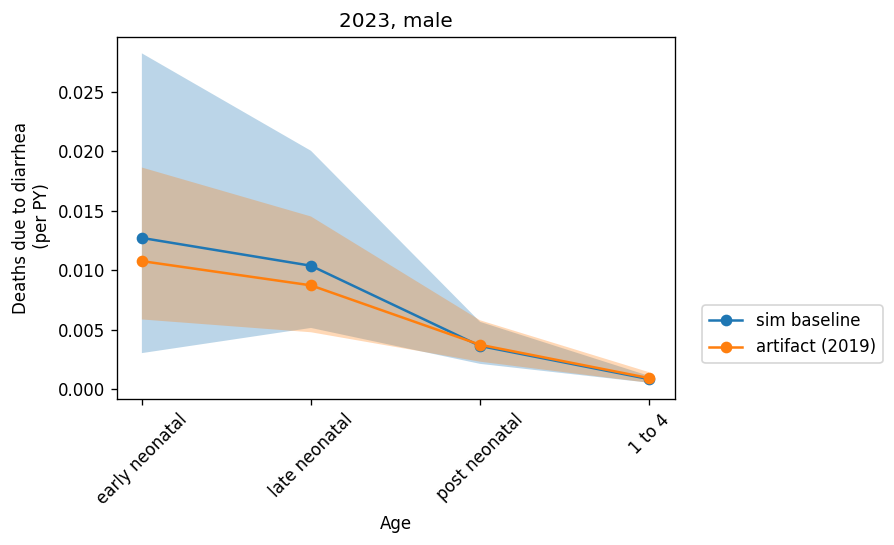

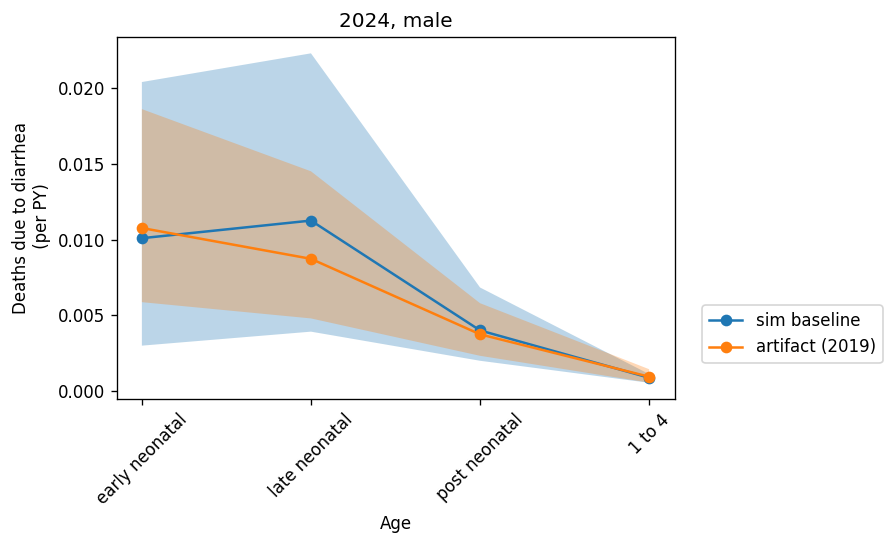

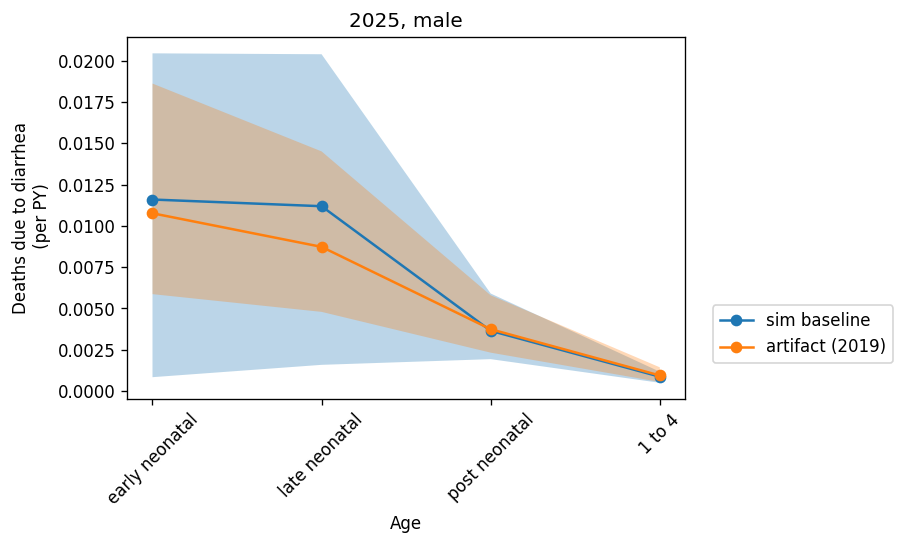

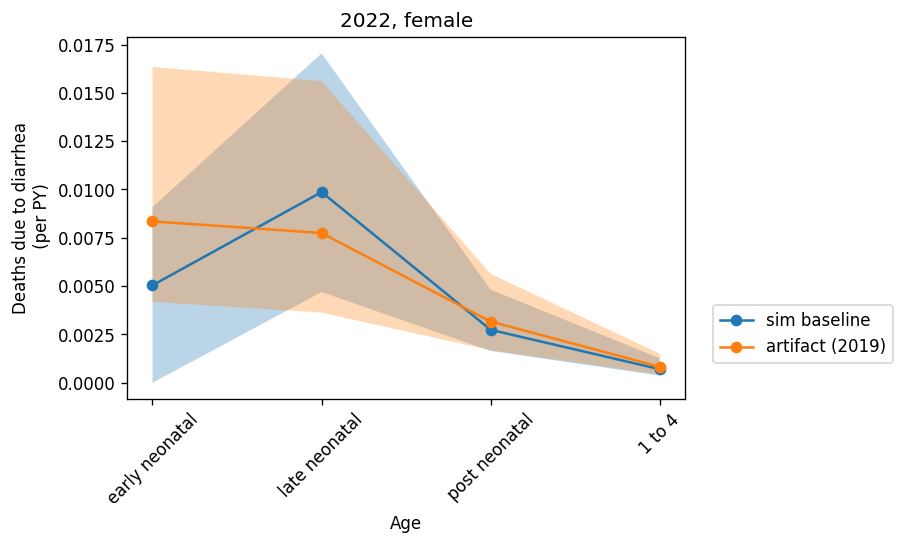

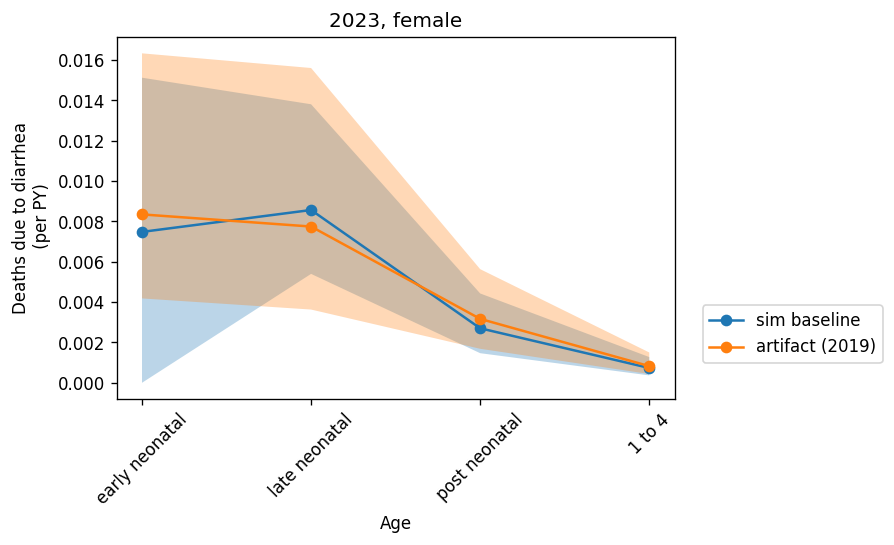

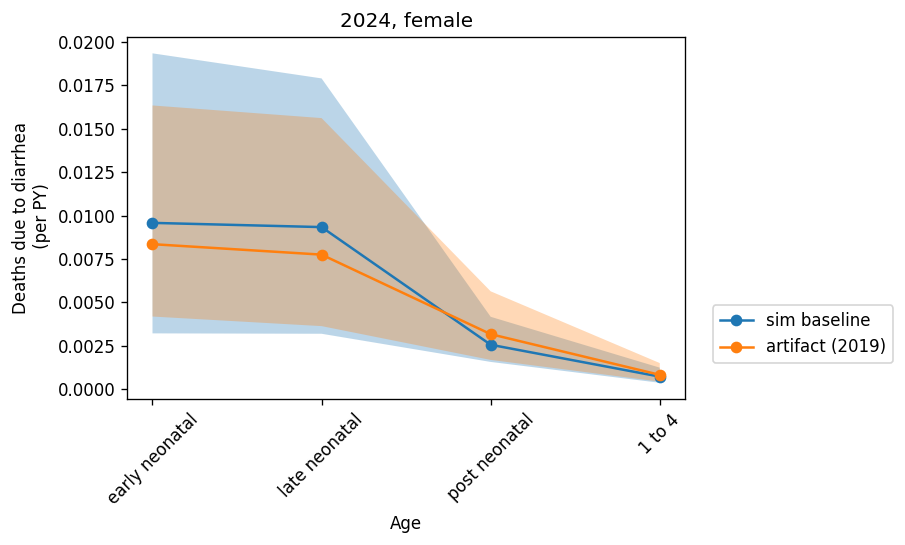

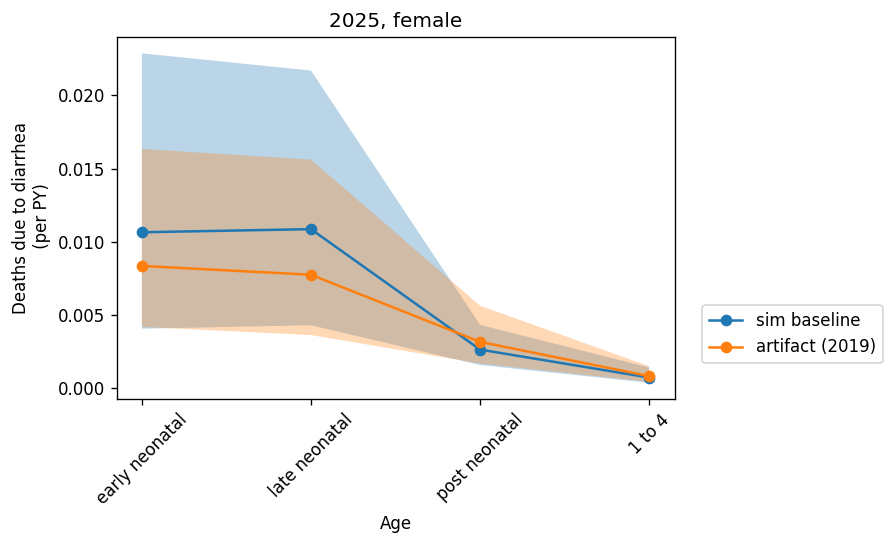

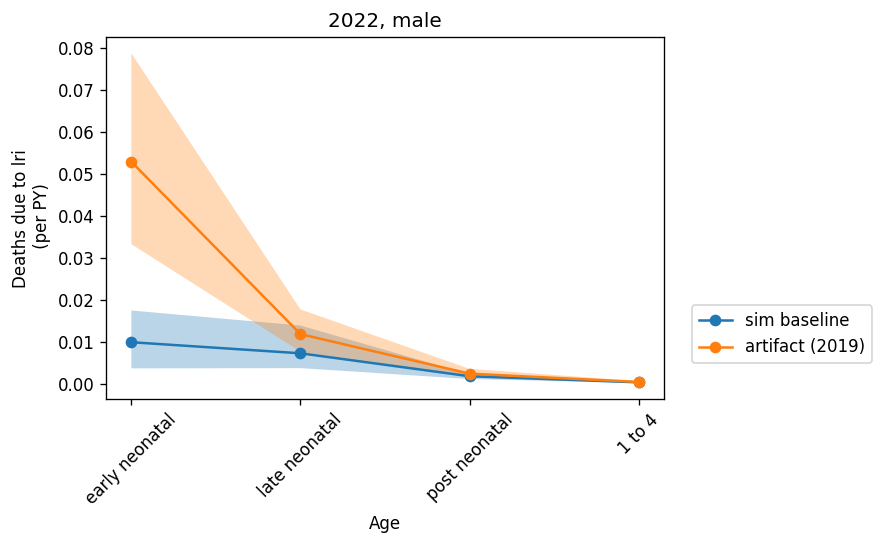

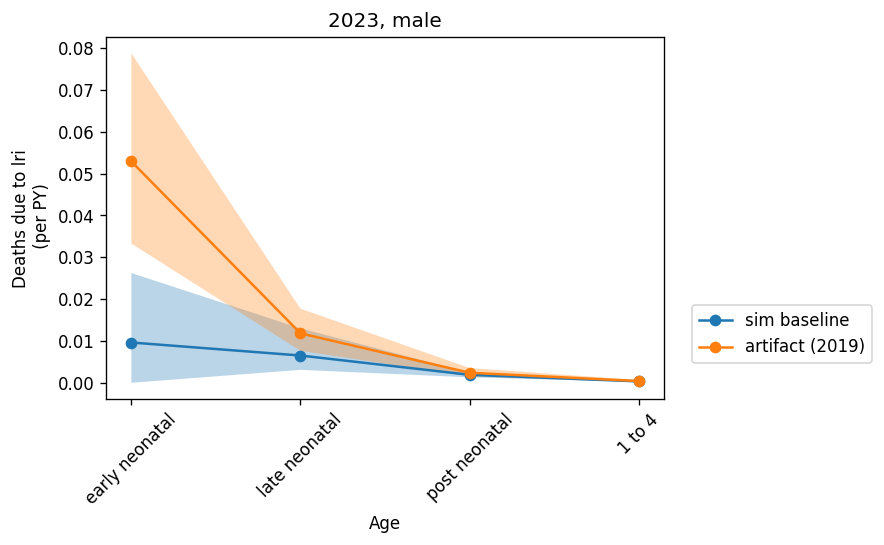

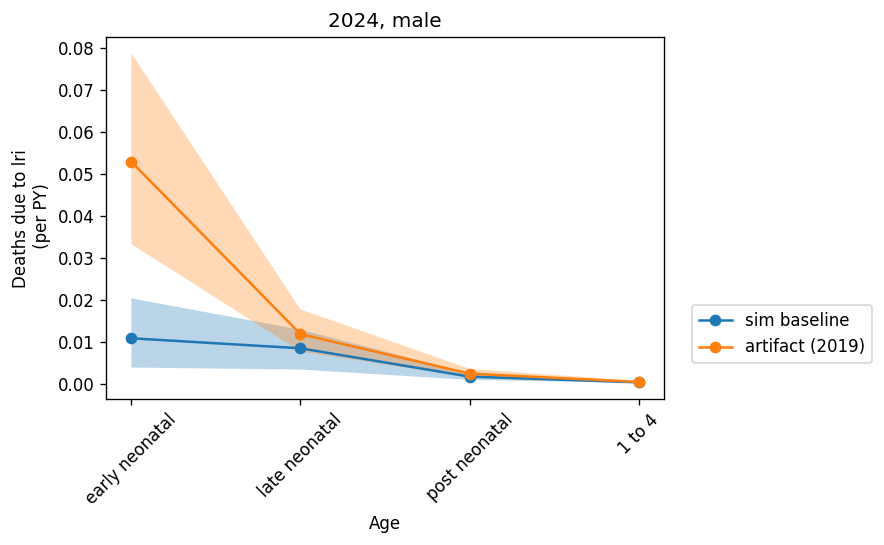

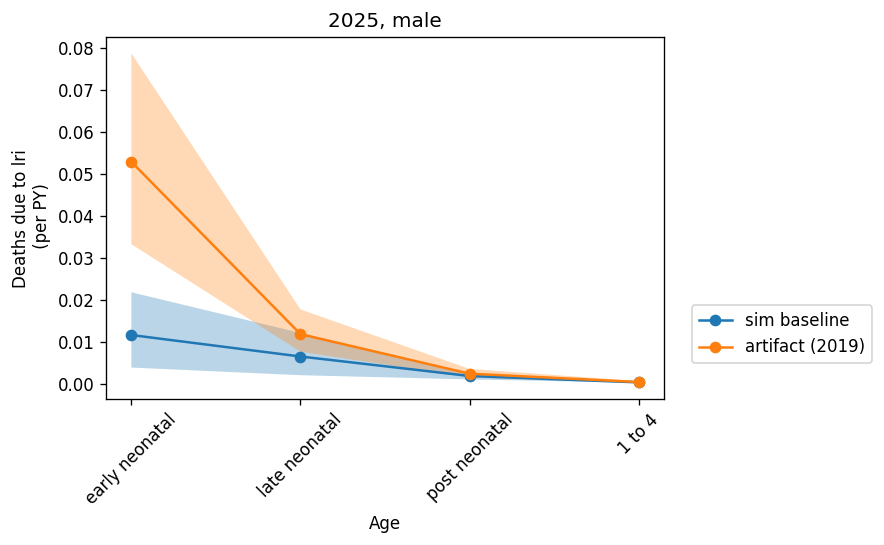

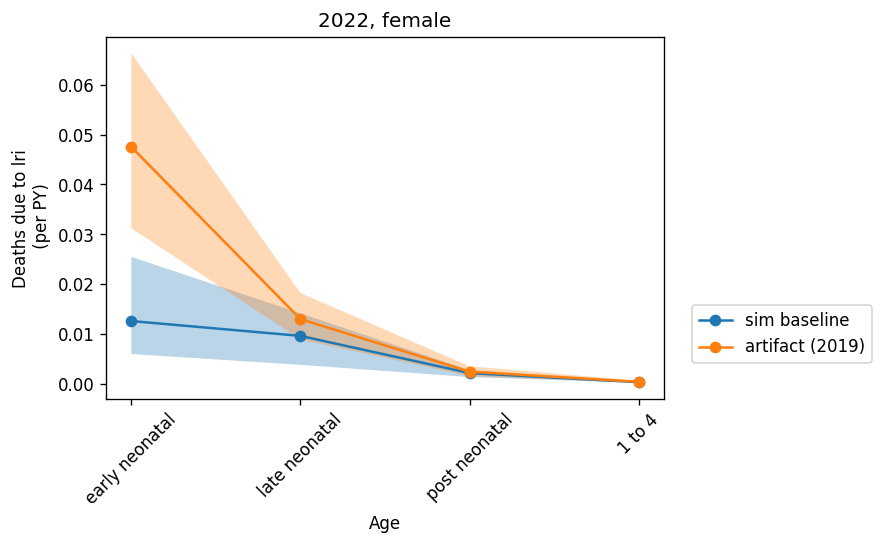

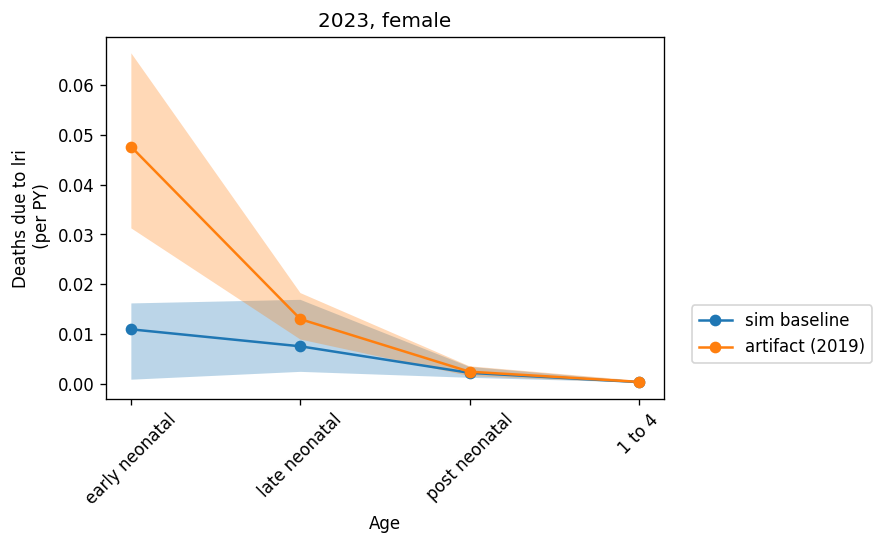

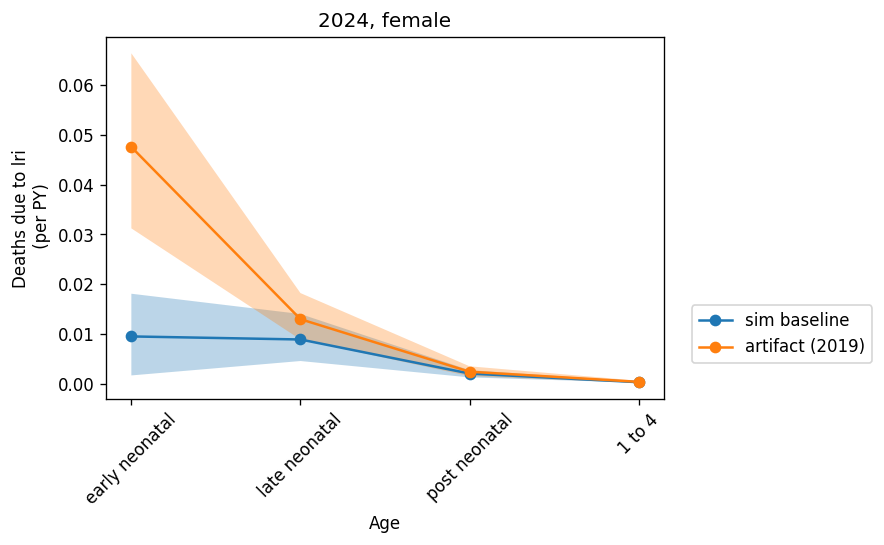

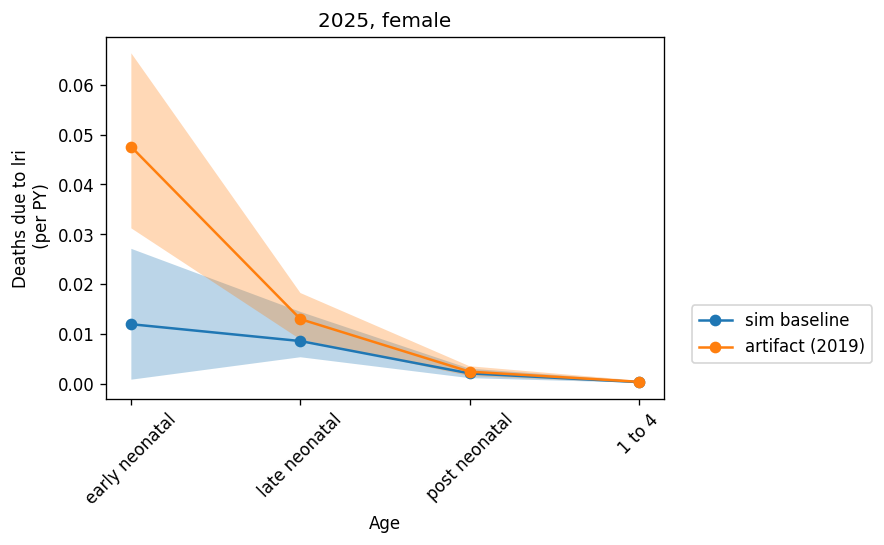

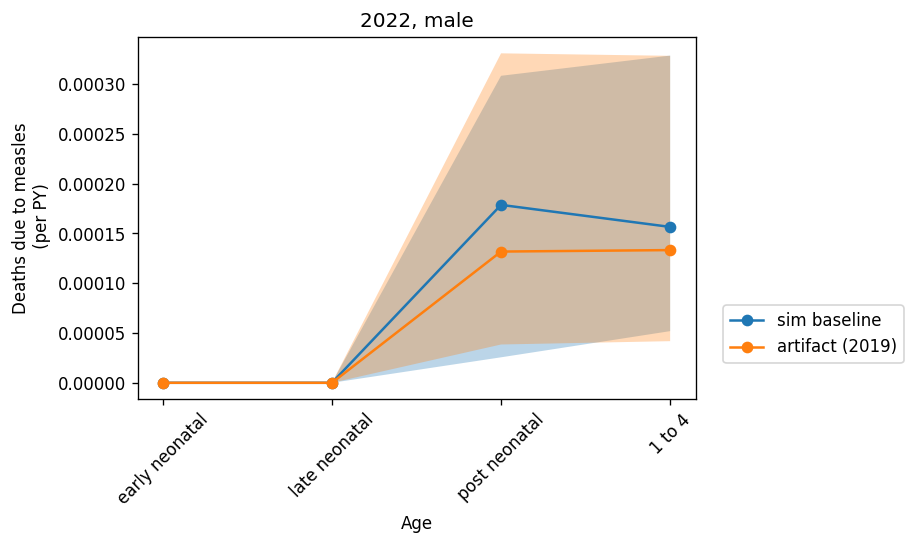

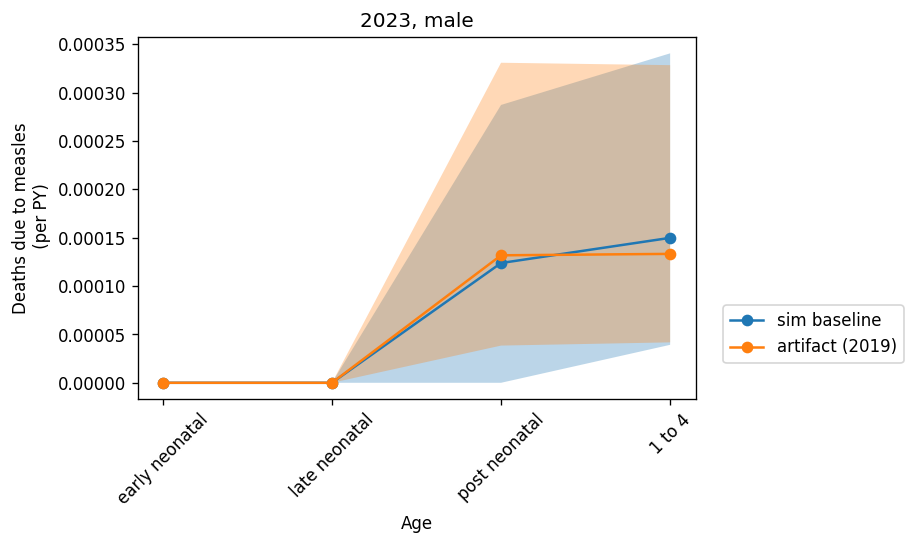

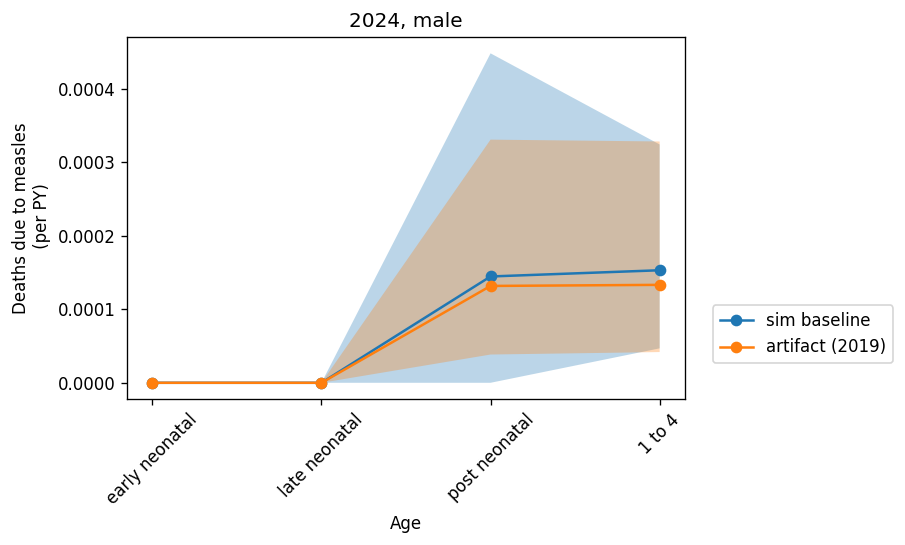

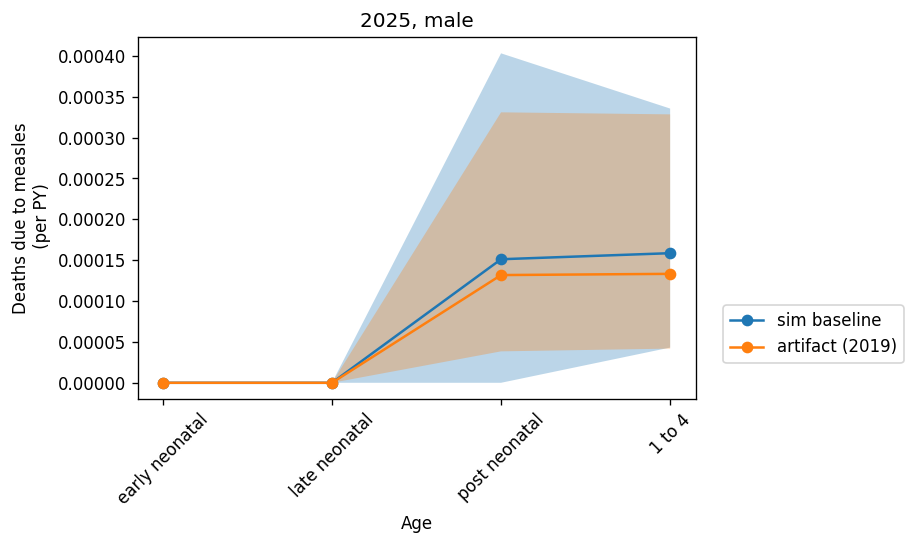

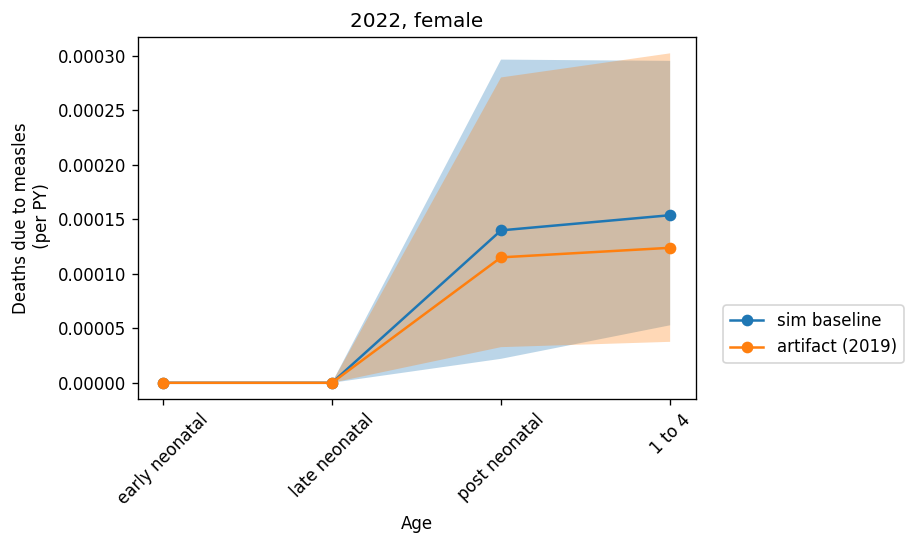

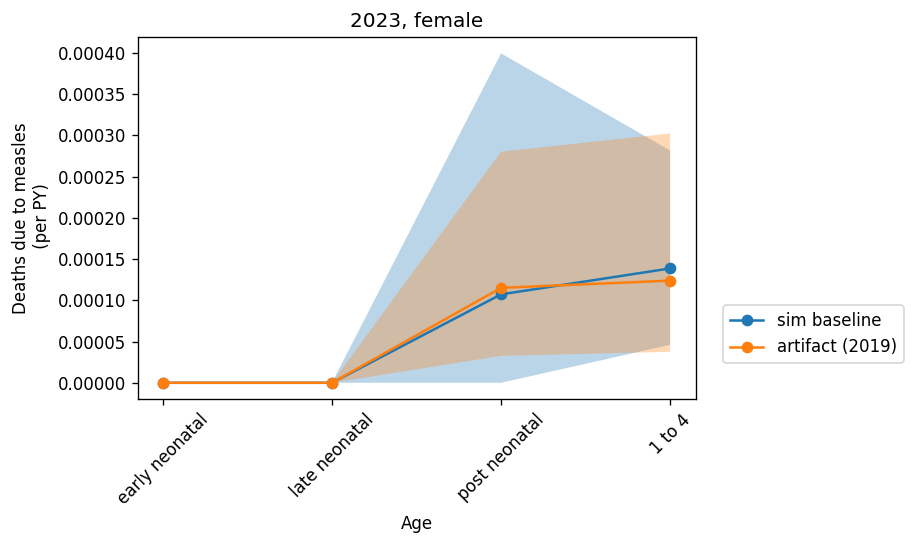

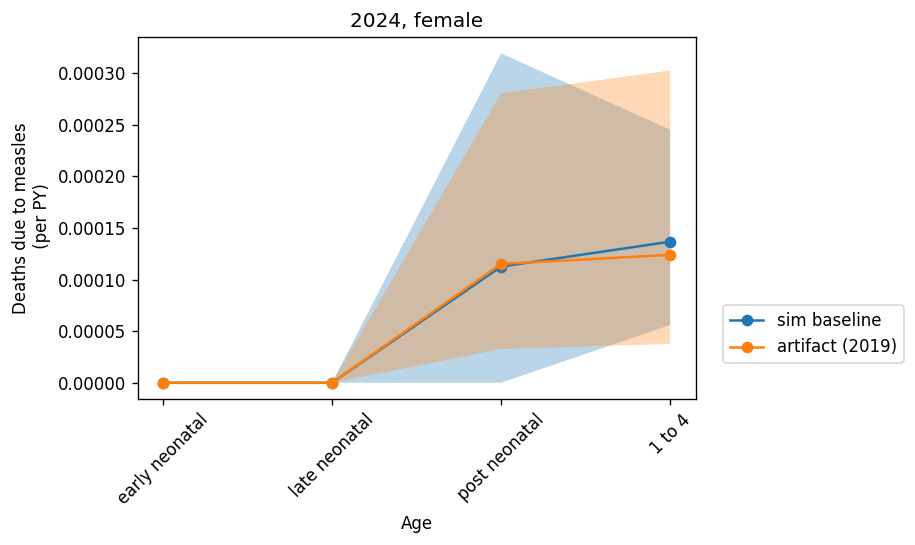

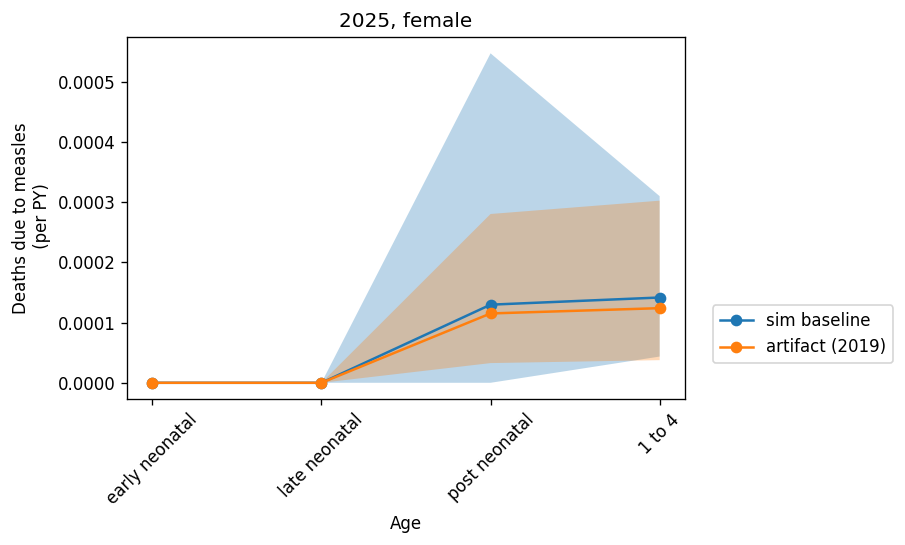

In [80]:
with PdfPages(output_dir + 'all_cause_mortality.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(acmr, art_acmr, sim_year, 2019, sex, 'acmr')
            pdf.savefig(bbox_inches='tight')
    
with PdfPages(output_dir + 'diarrhea_mortality.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(deaths_dd, art_csmr_dd, sim_year, 2019, sex, 'csmr_dd')      
            pdf.savefig(bbox_inches='tight')
    
with PdfPages(output_dir + 'lri_mortality.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(deaths_lri, art_csmr_lri, sim_year, 2019, sex, 'csmr_lri') 
            pdf.savefig(bbox_inches='tight')
    
with PdfPages(output_dir + 'measles_mortality.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(deaths_msls, art_csmr_msls, sim_year, 2019, sex, 'csmr_msls') 
            pdf.savefig(bbox_inches='tight')

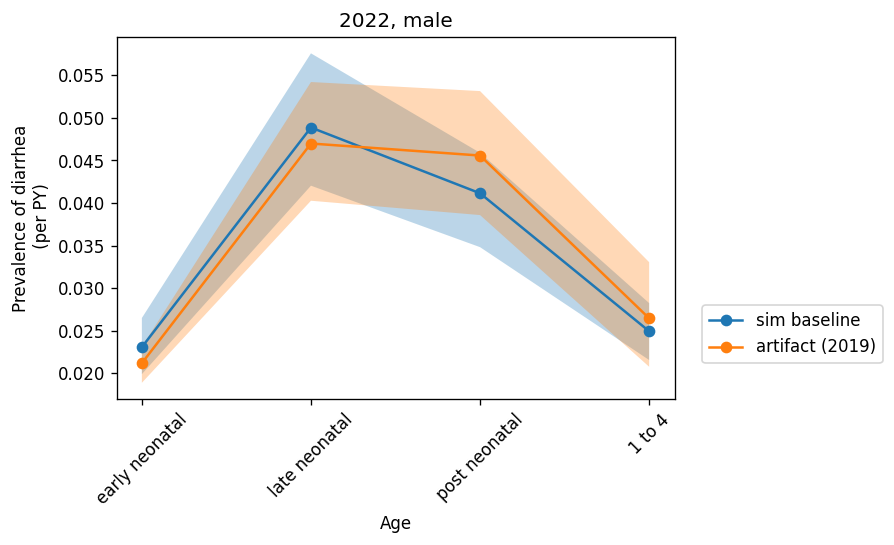

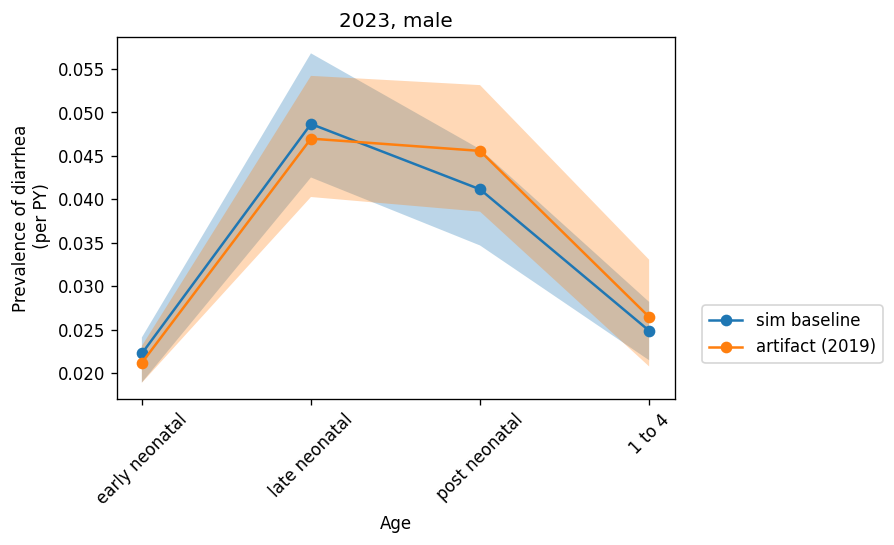

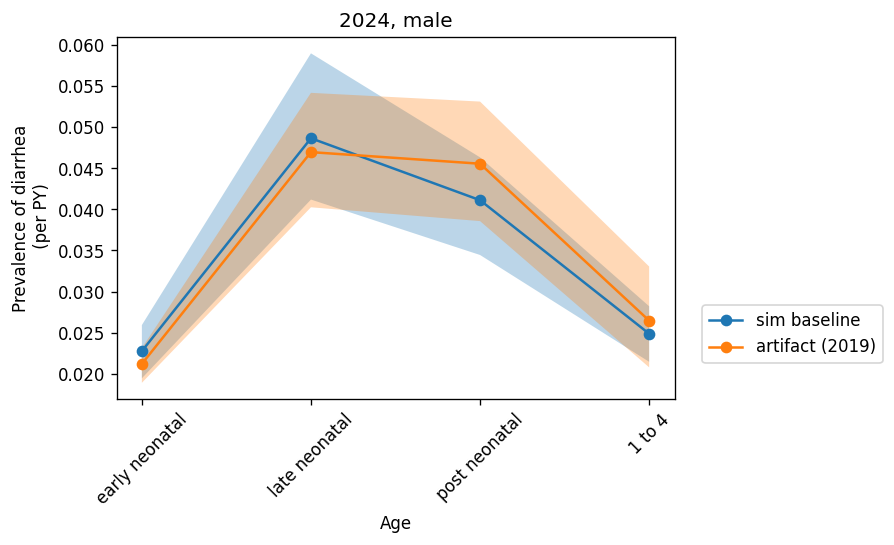

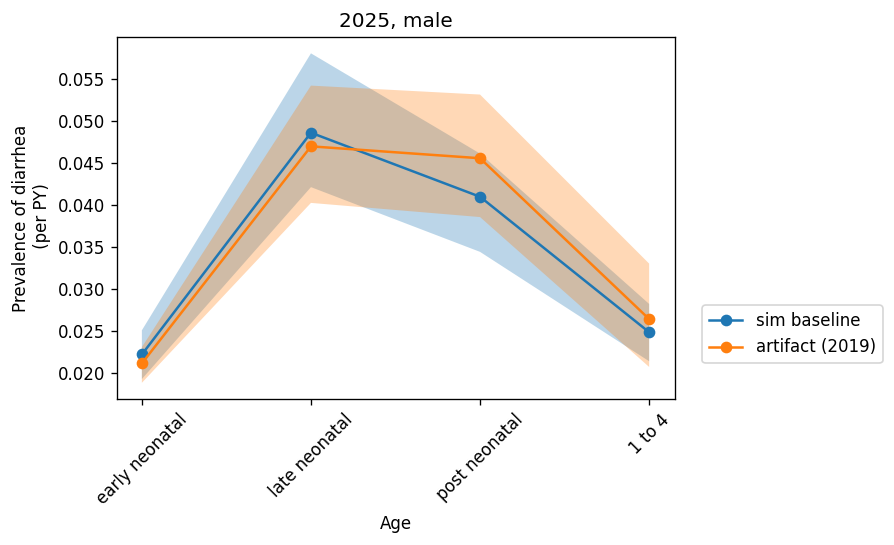

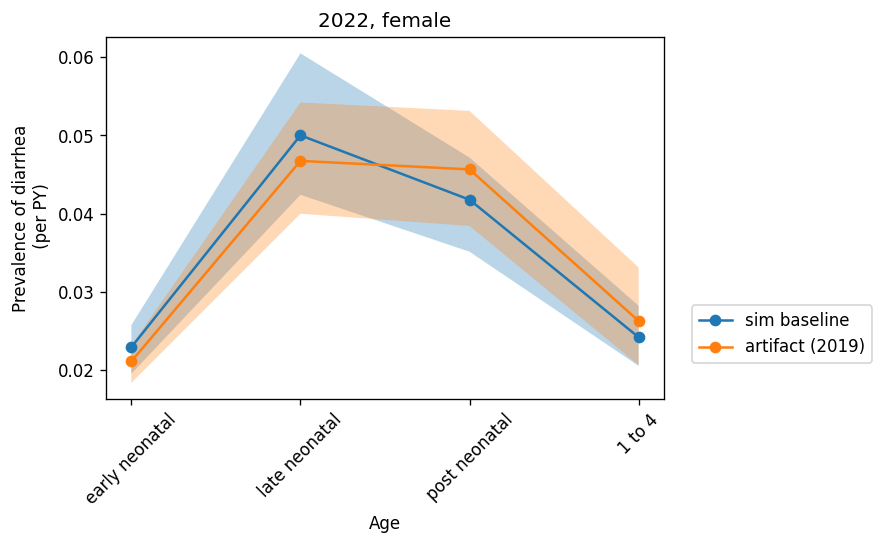

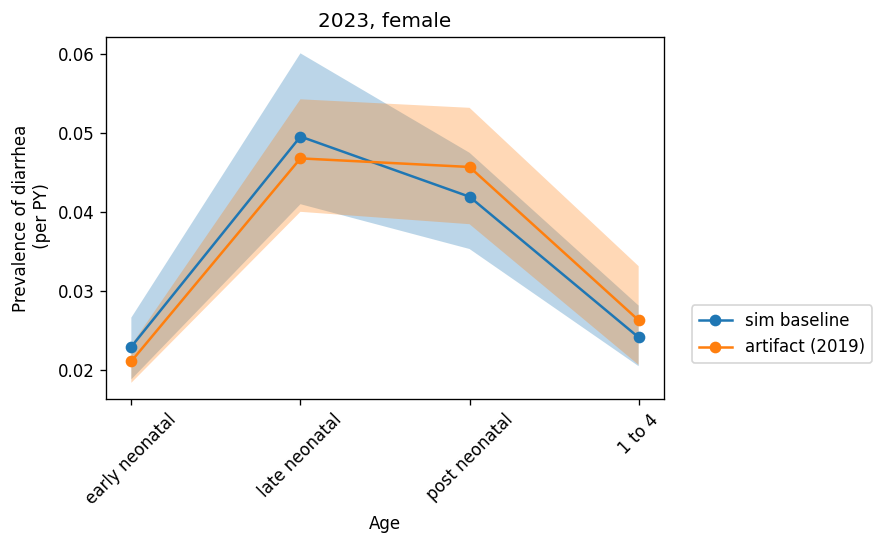

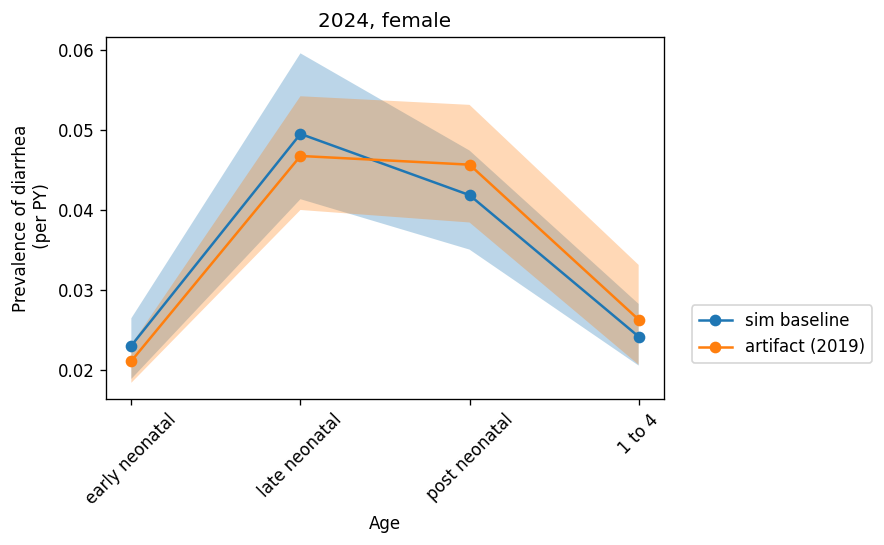

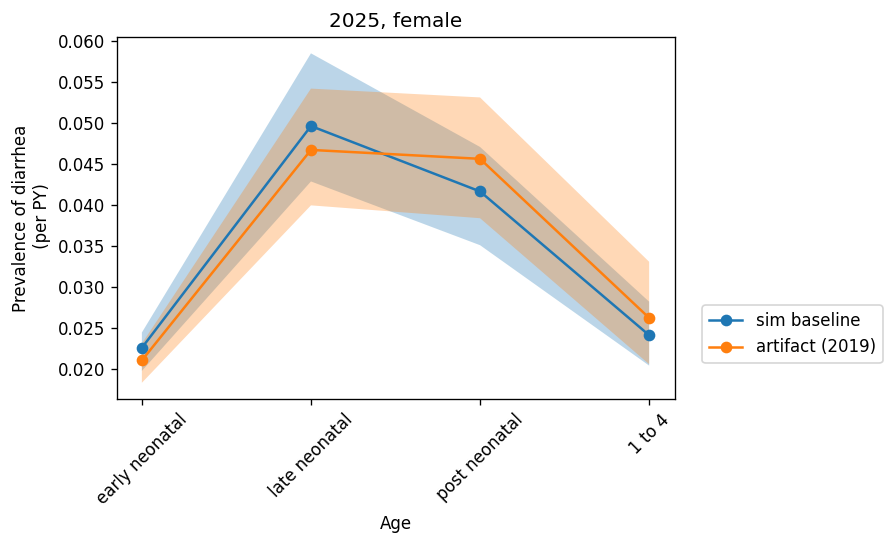

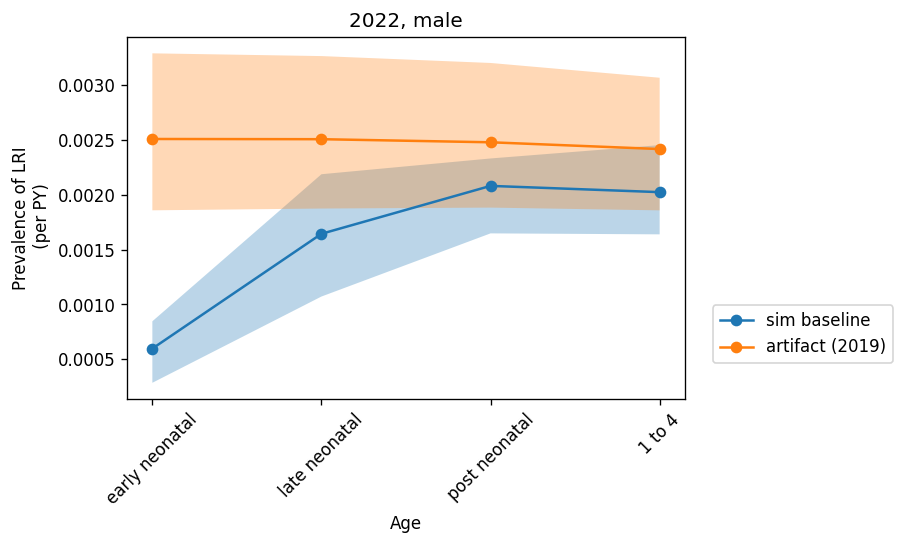

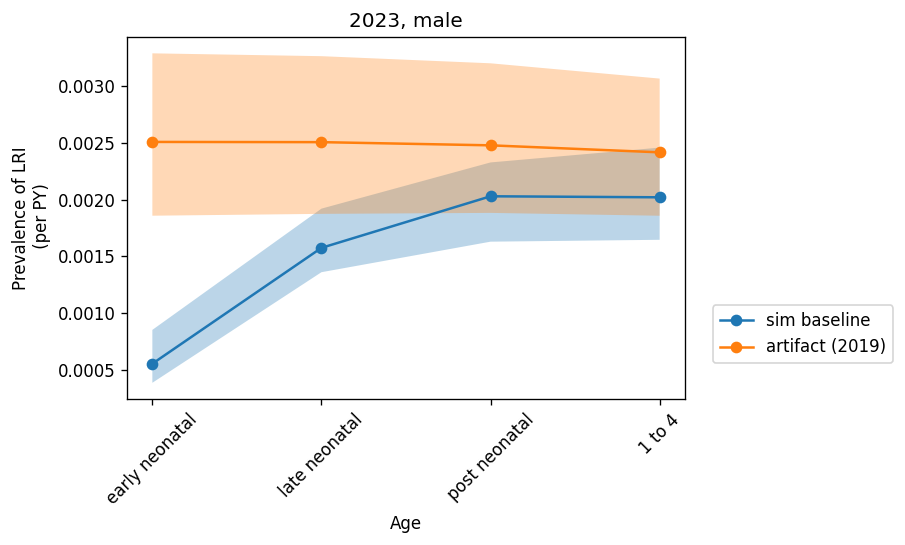

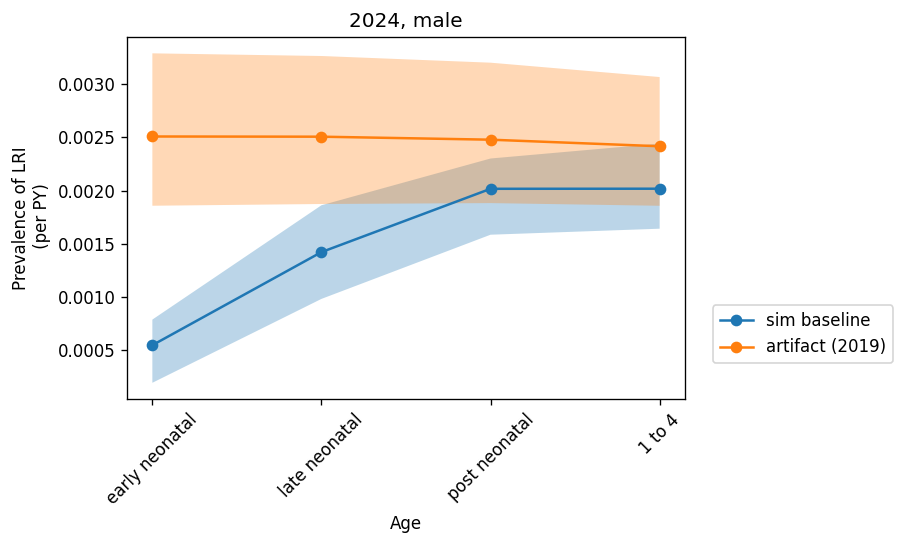

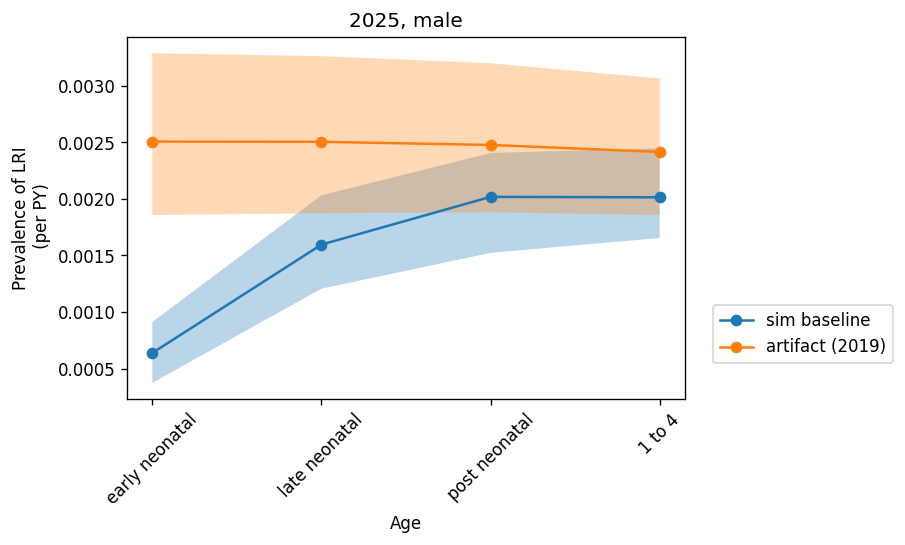

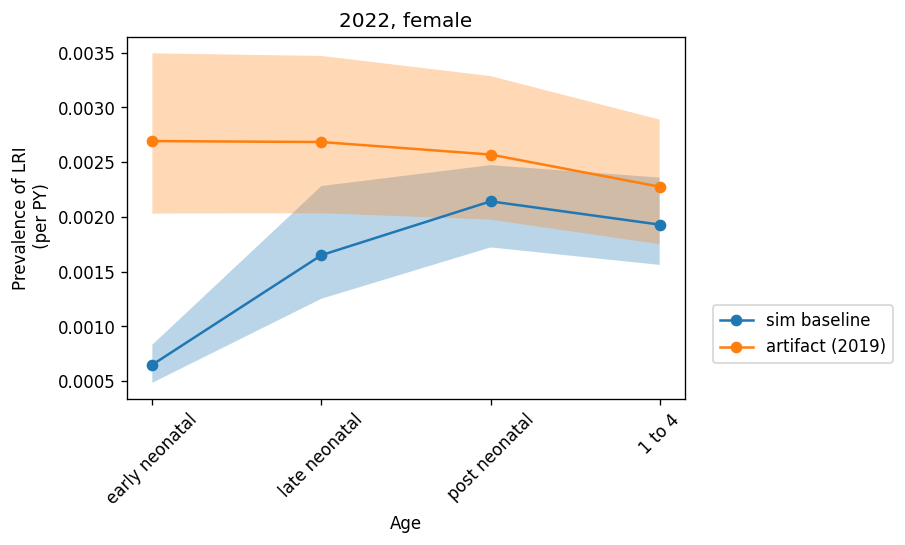

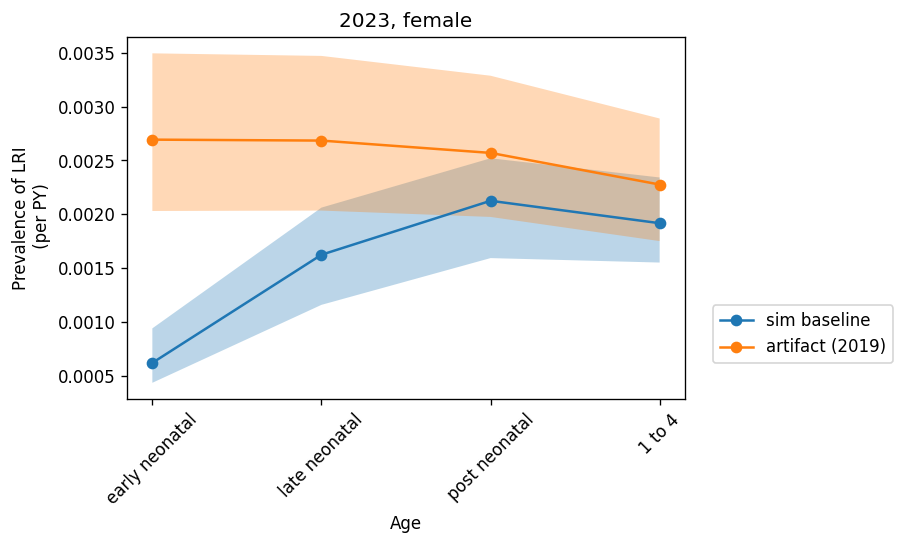

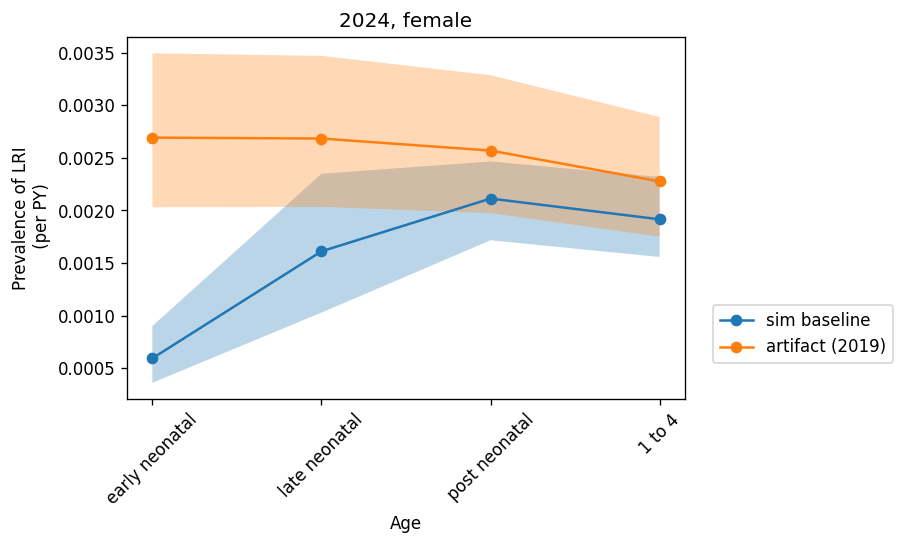

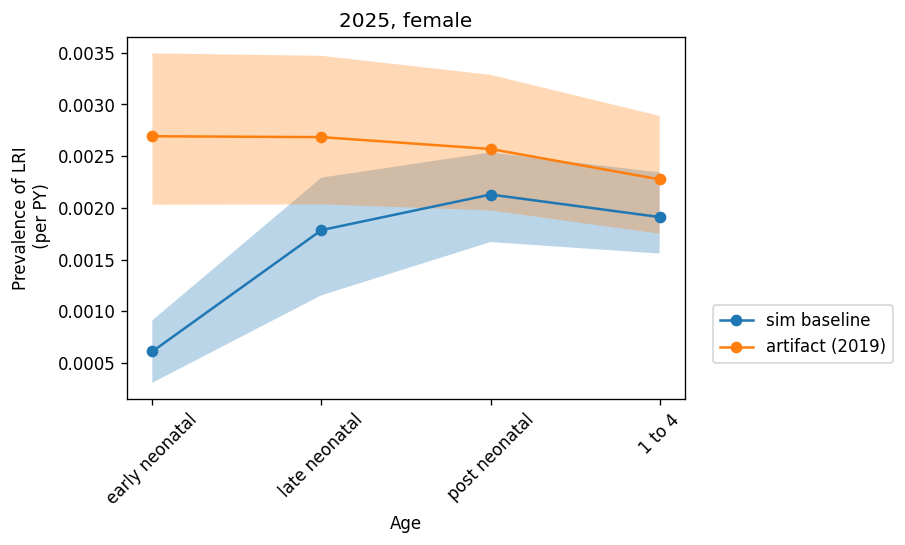

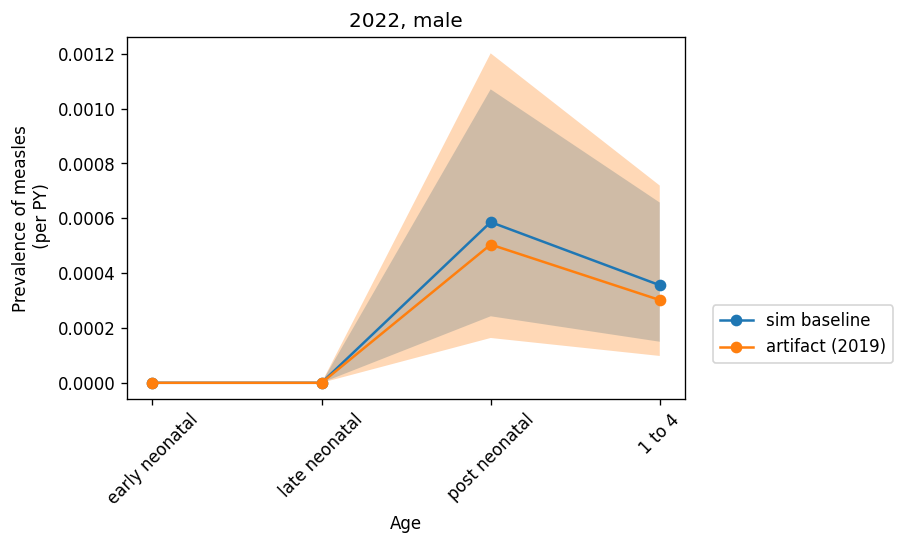

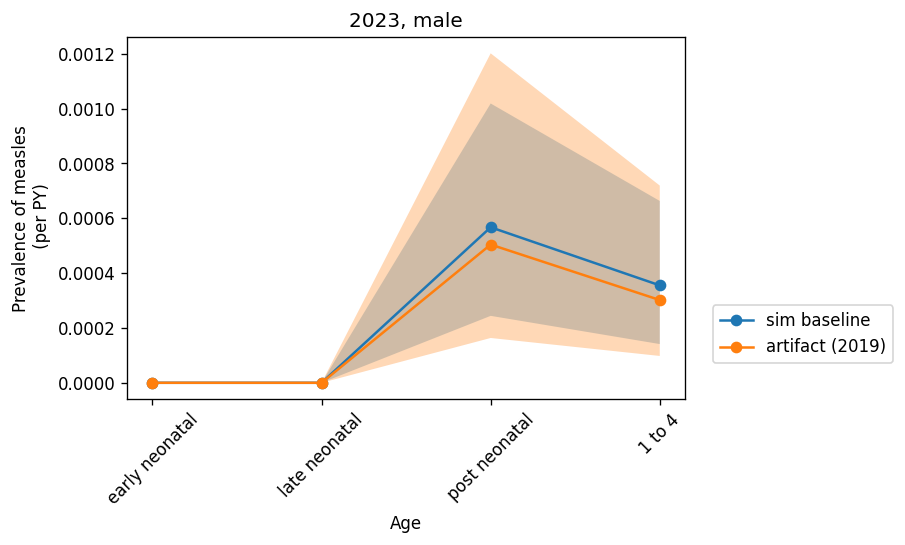

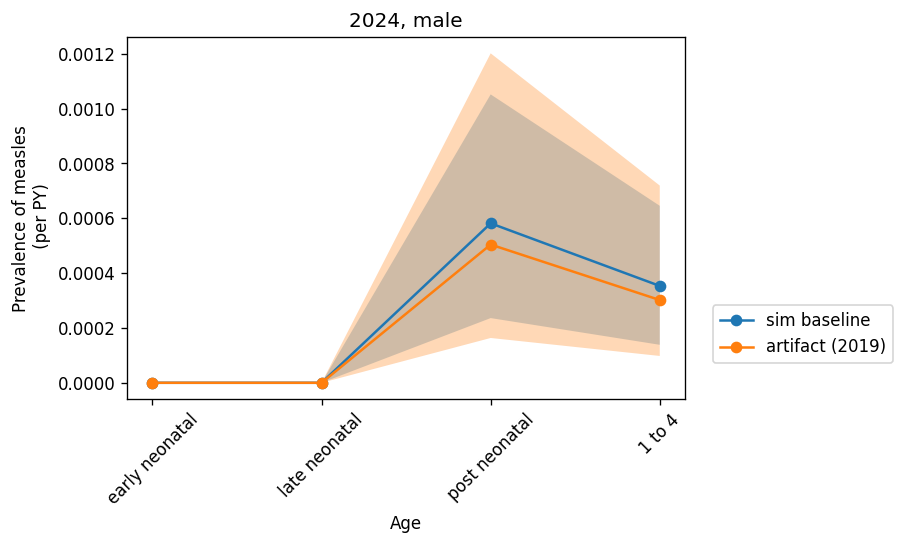

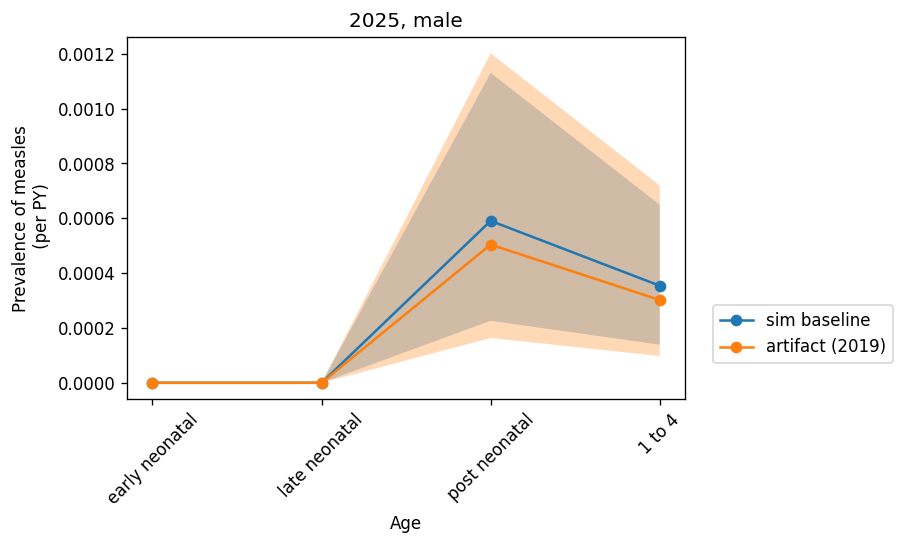

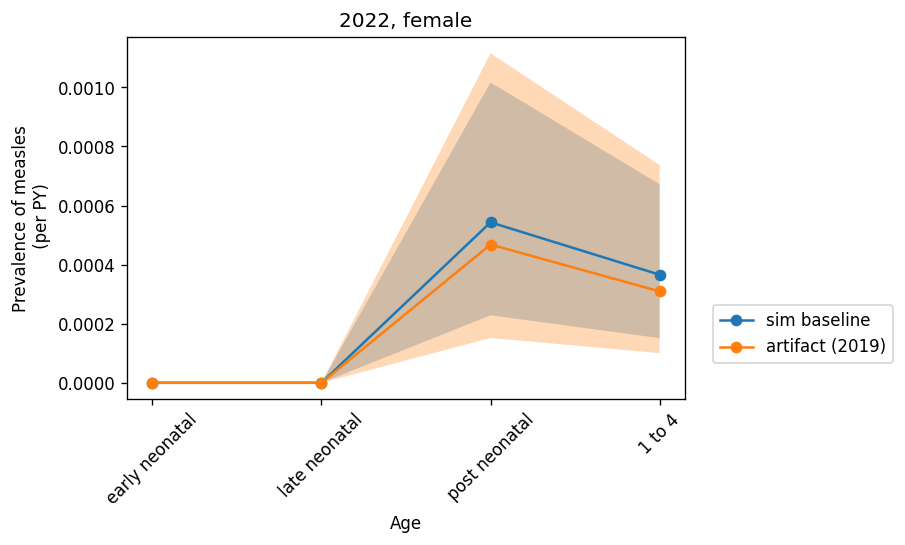

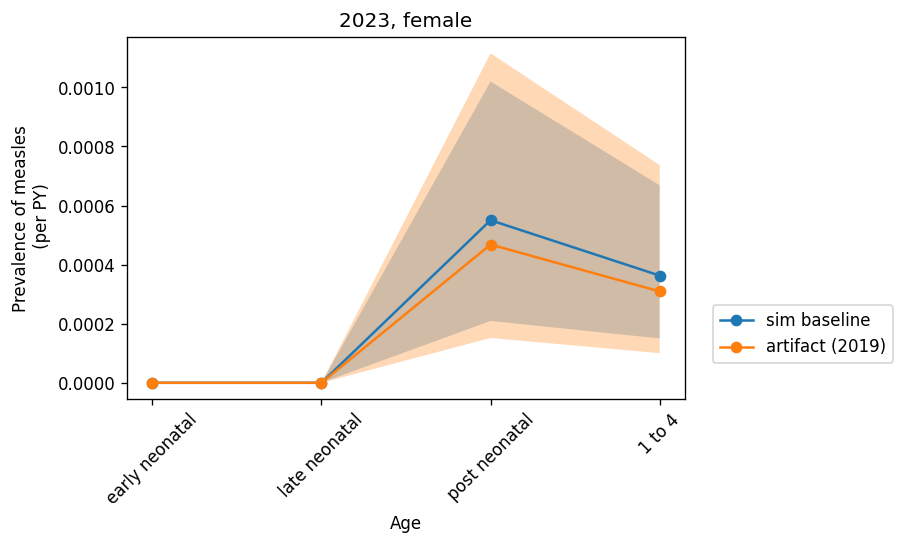

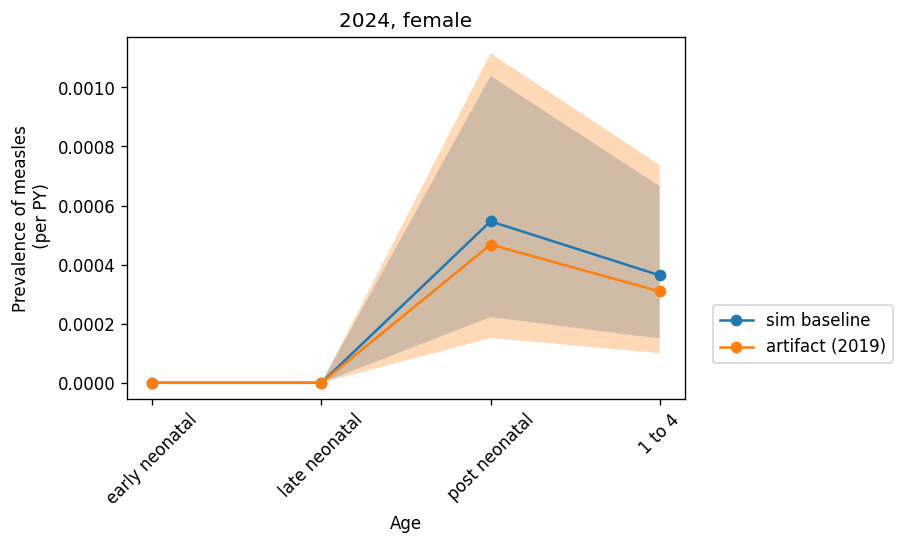

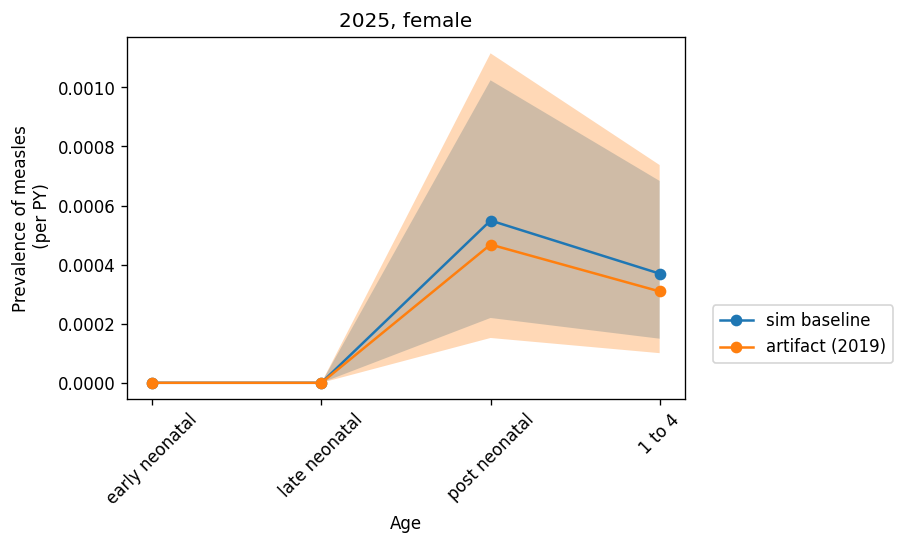

In [81]:
with PdfPages(output_dir + 'diarrhea_prevalence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(prevalence_dd, art_prevalence_dd, sim_year, 2019, sex, 'prevalence_dd')
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'lri_prevalence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(prevalence_lri, art_prevalence_lri, sim_year, 2019, sex, 'prevalence_lri')                
            pdf.savefig(bbox_inches='tight')

with PdfPages(output_dir + 'measles_prevalence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(prevalence_msls, art_prevalence_msls, sim_year, 2019, sex, 'prevalence_msls')
            pdf.savefig(bbox_inches='tight')


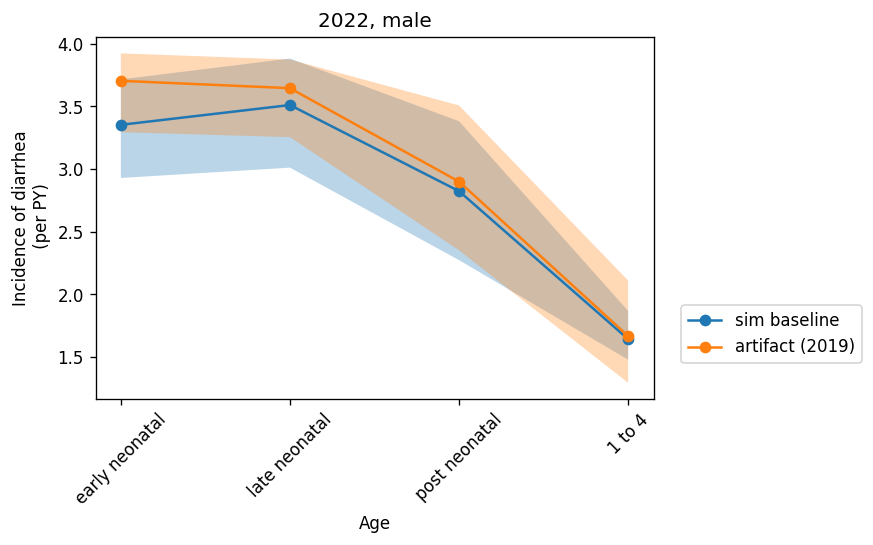

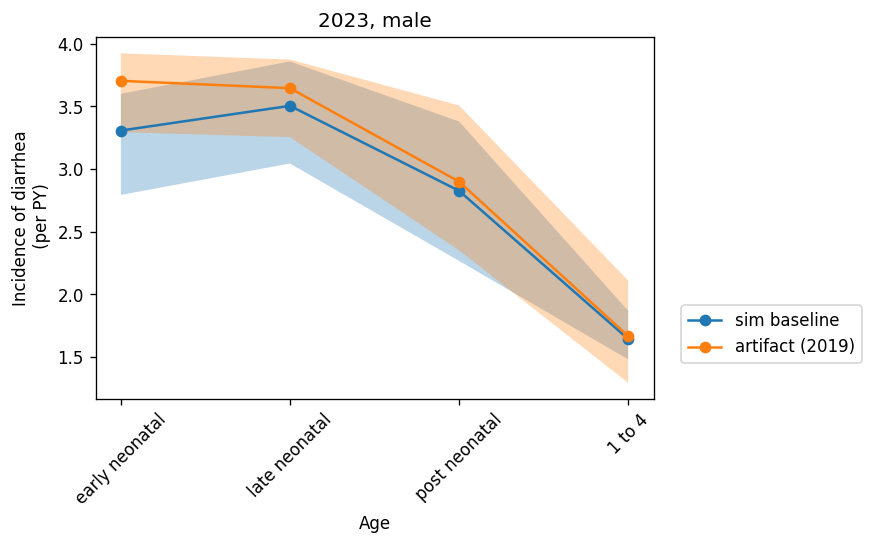

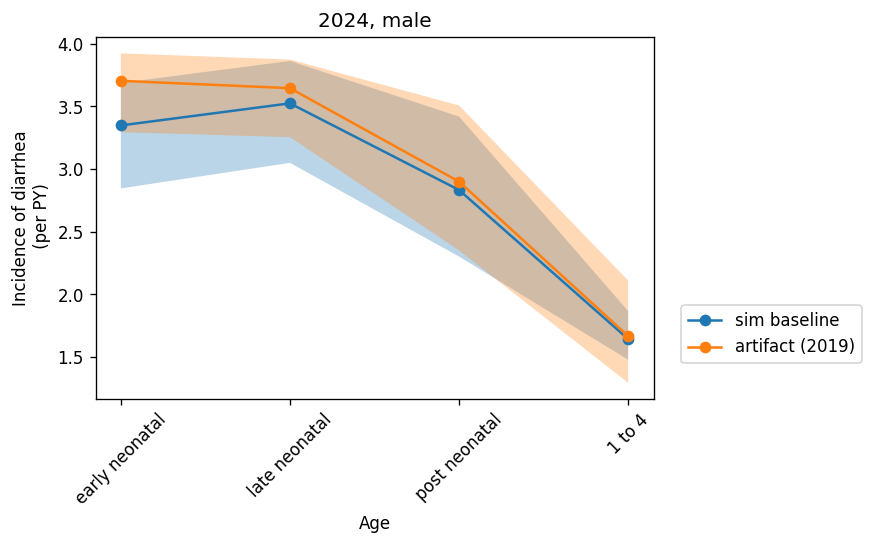

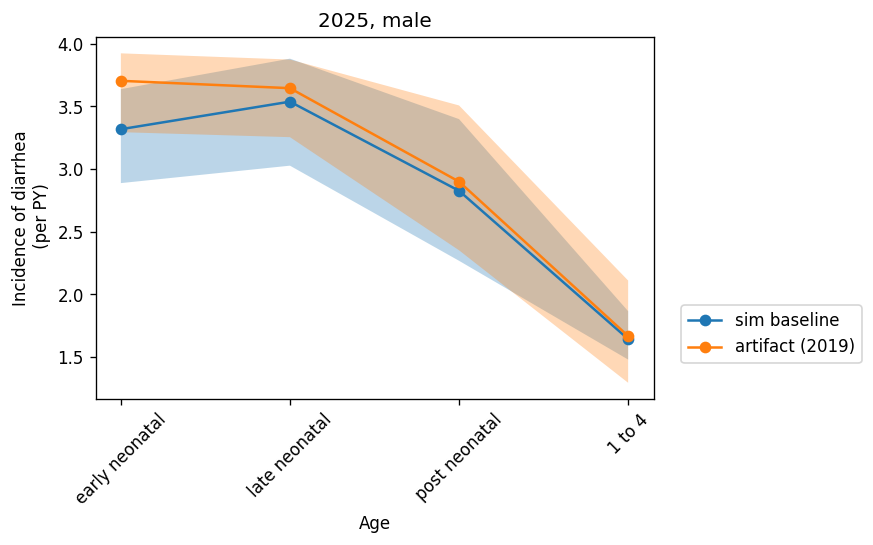

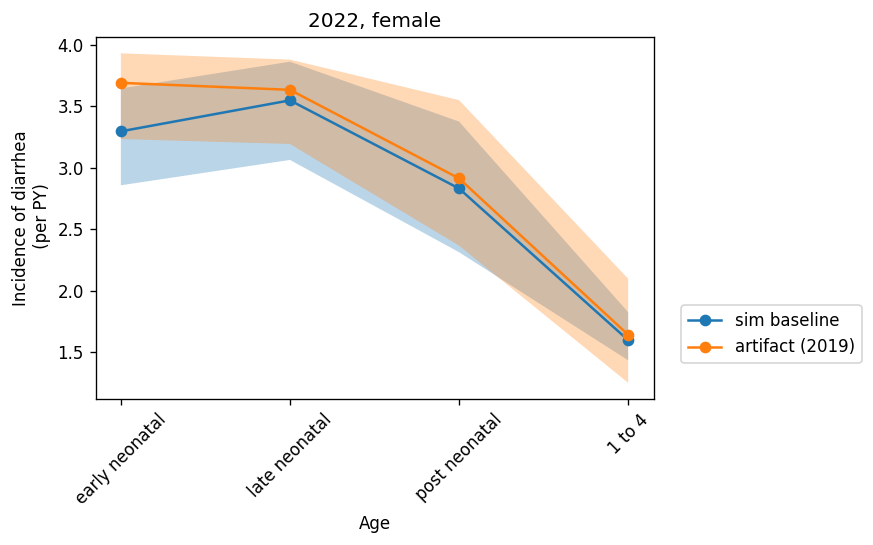

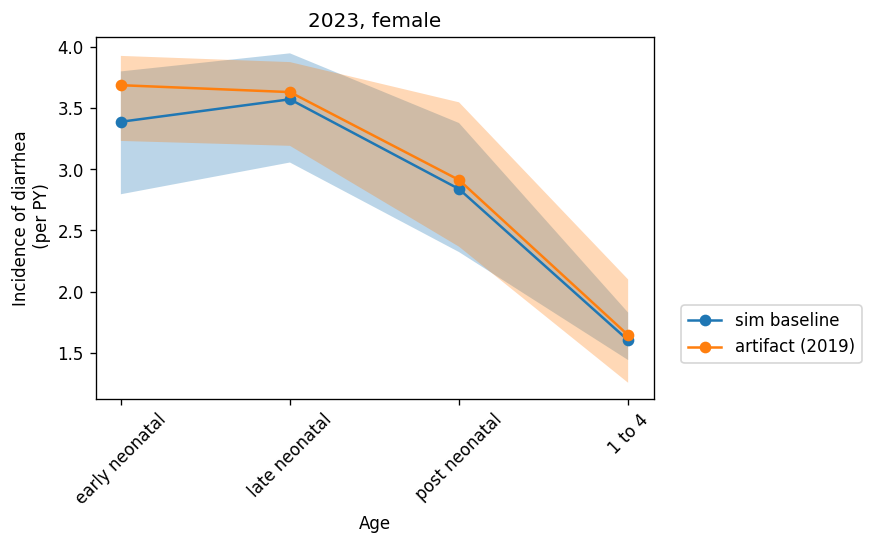

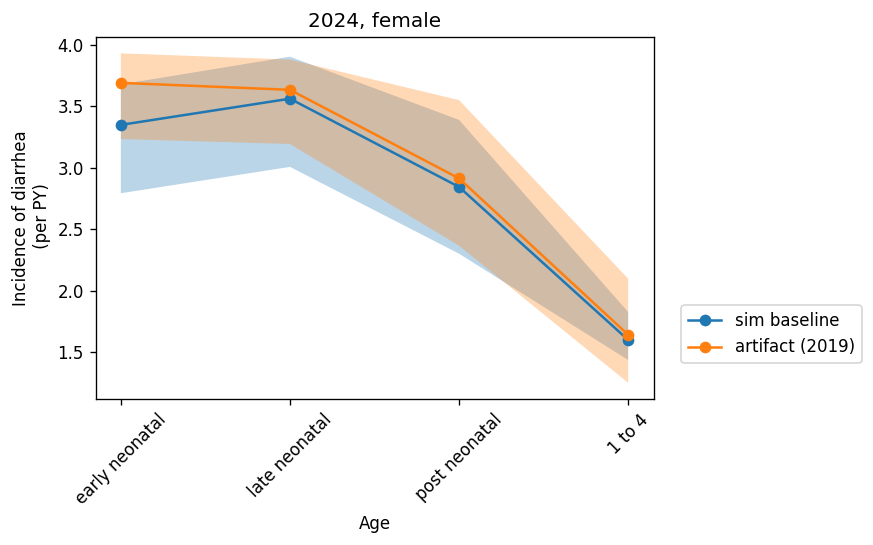

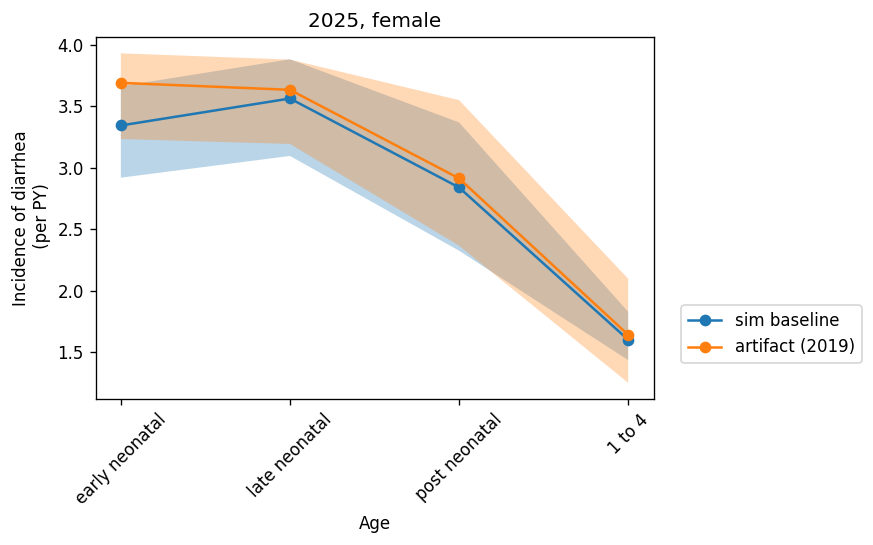

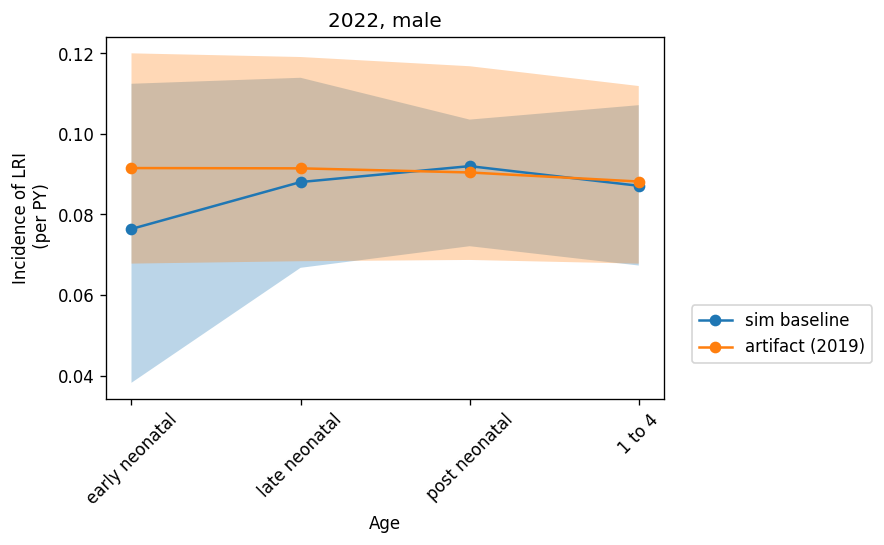

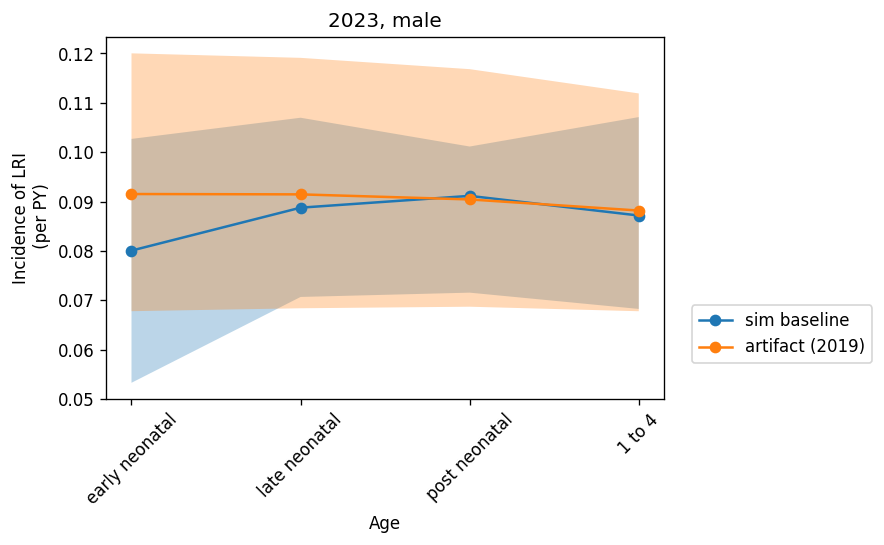

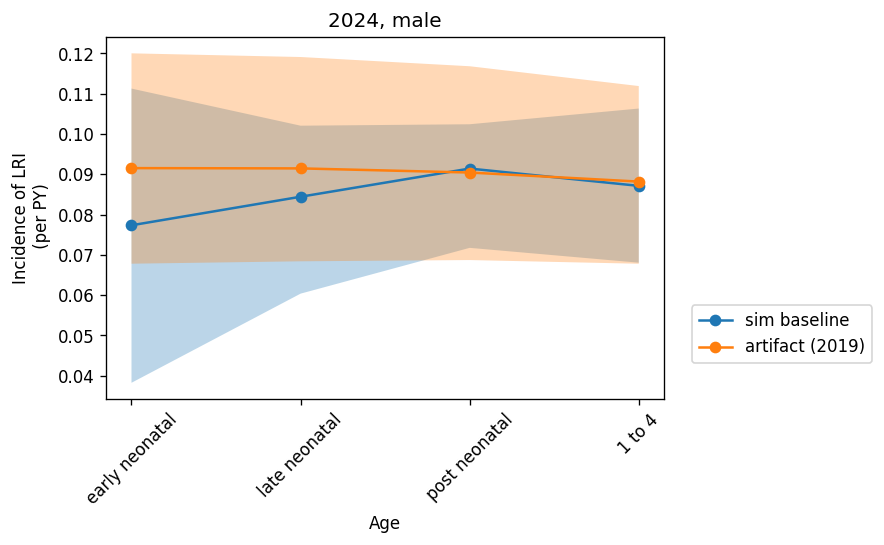

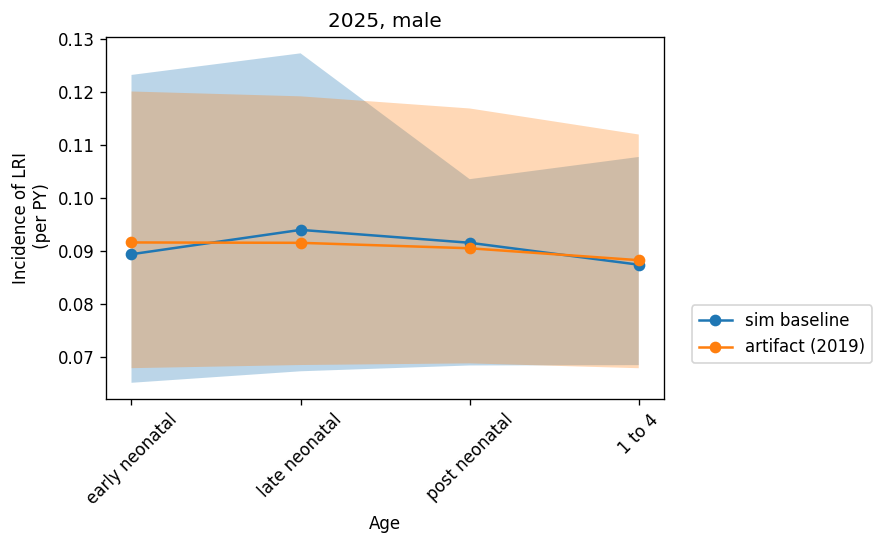

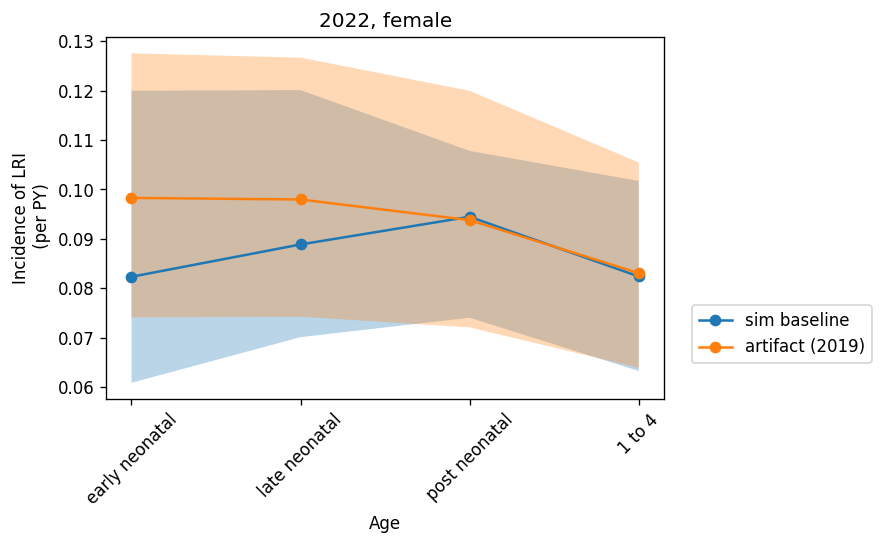

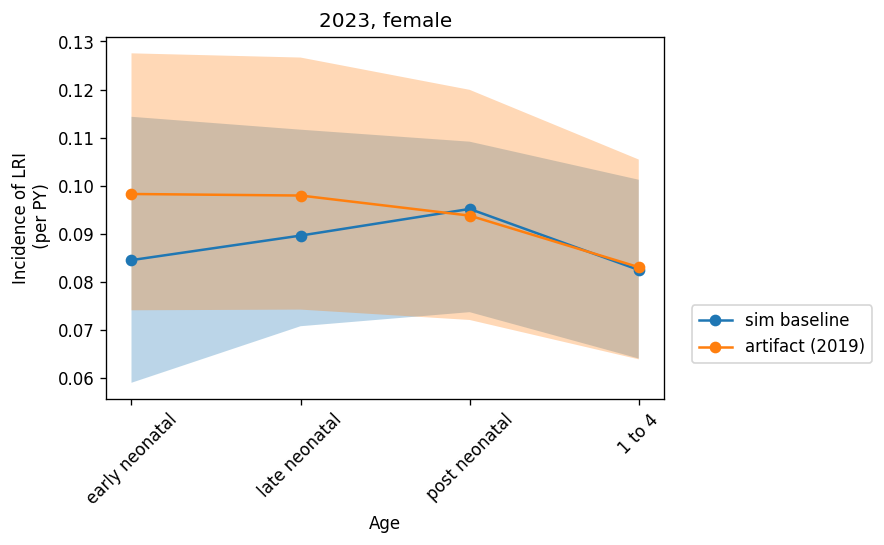

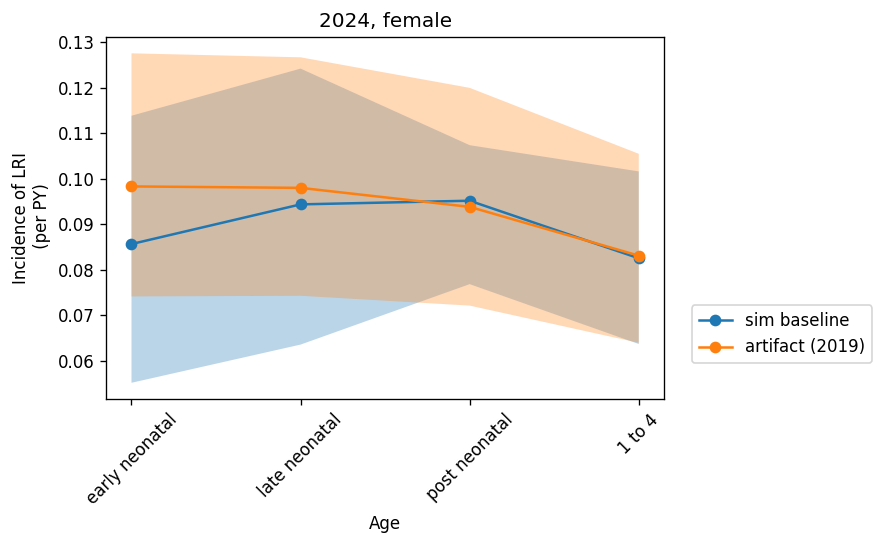

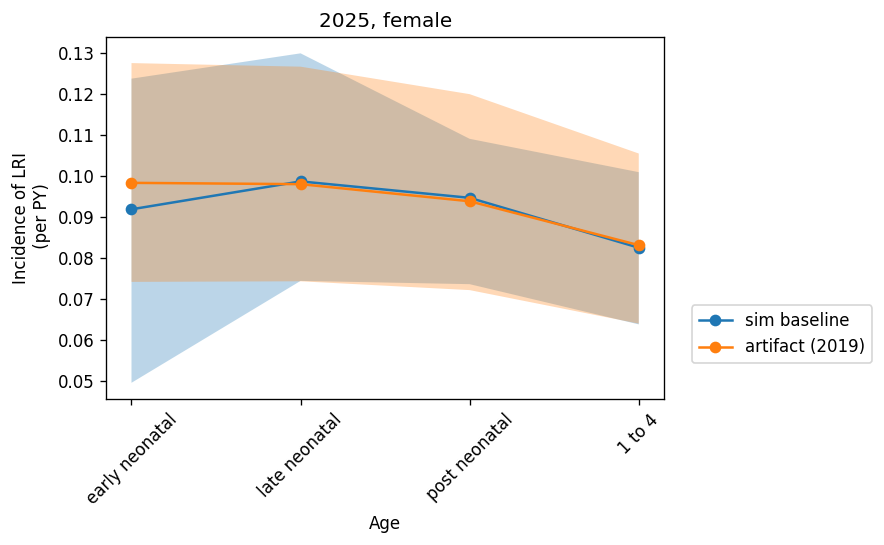

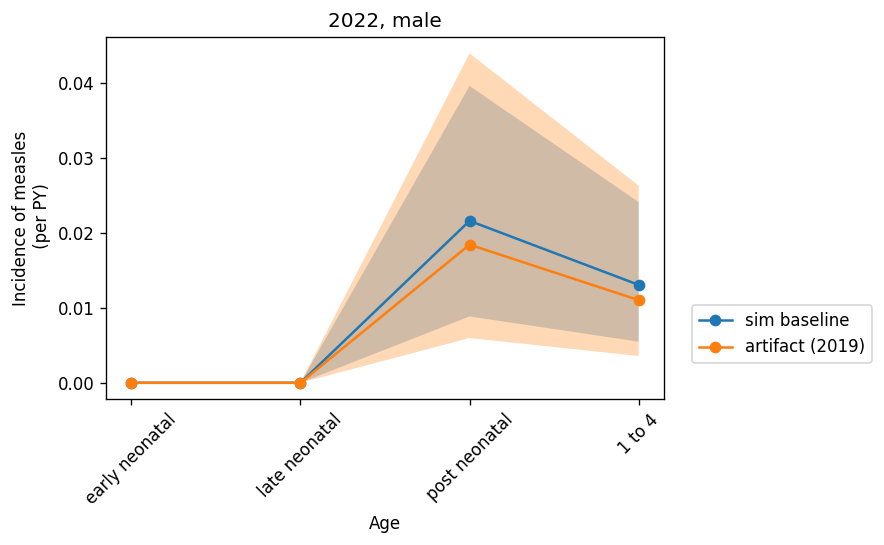

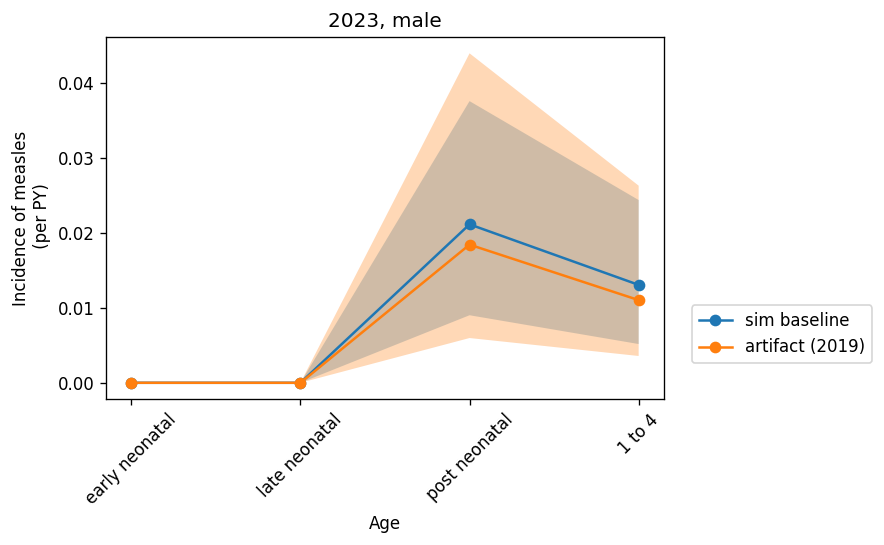

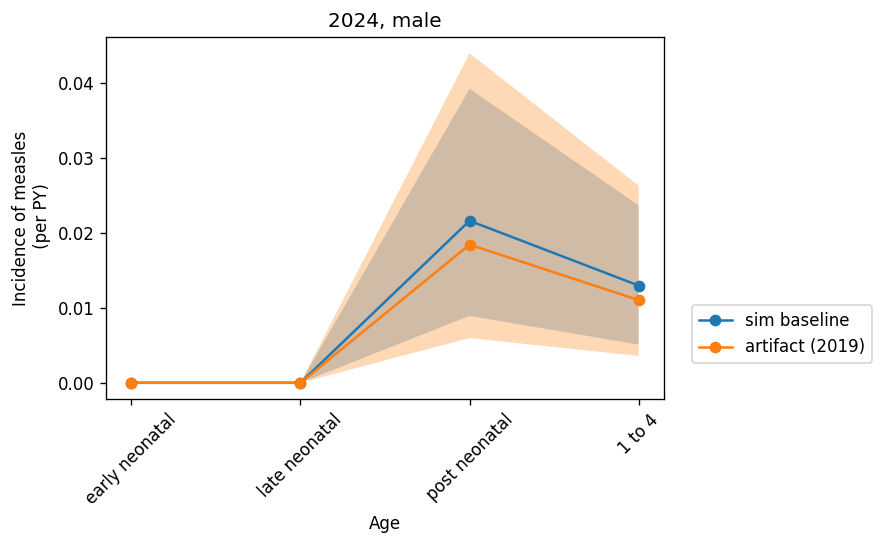

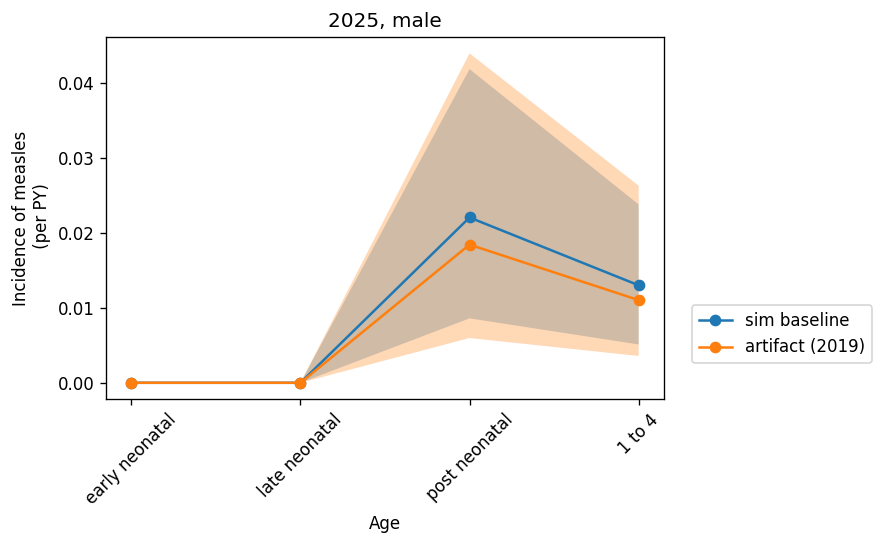

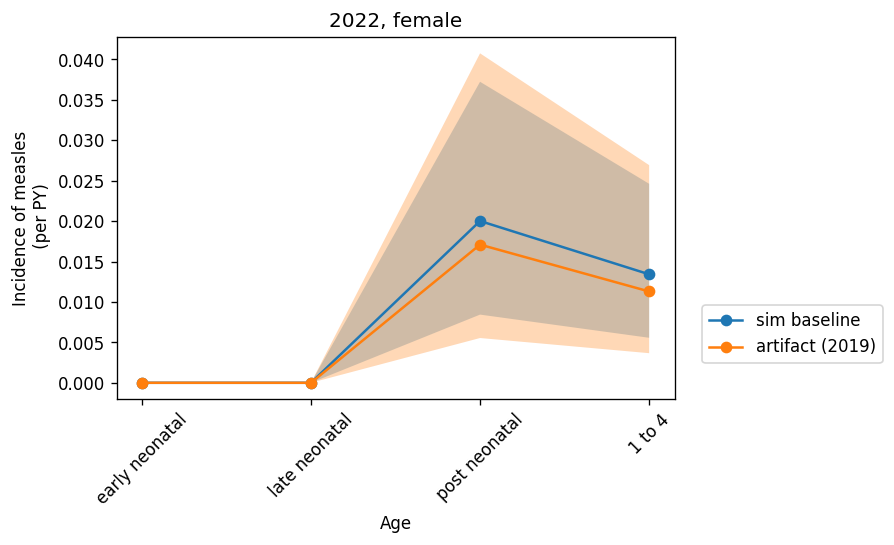

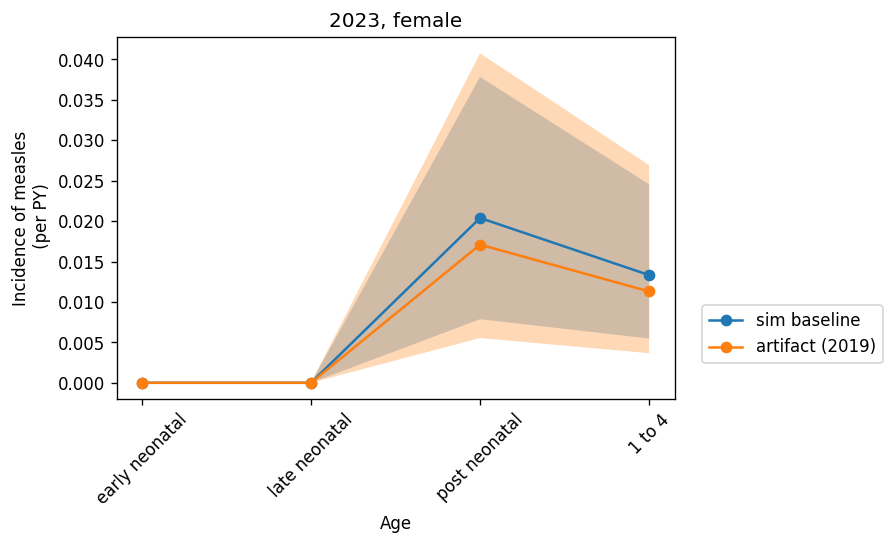

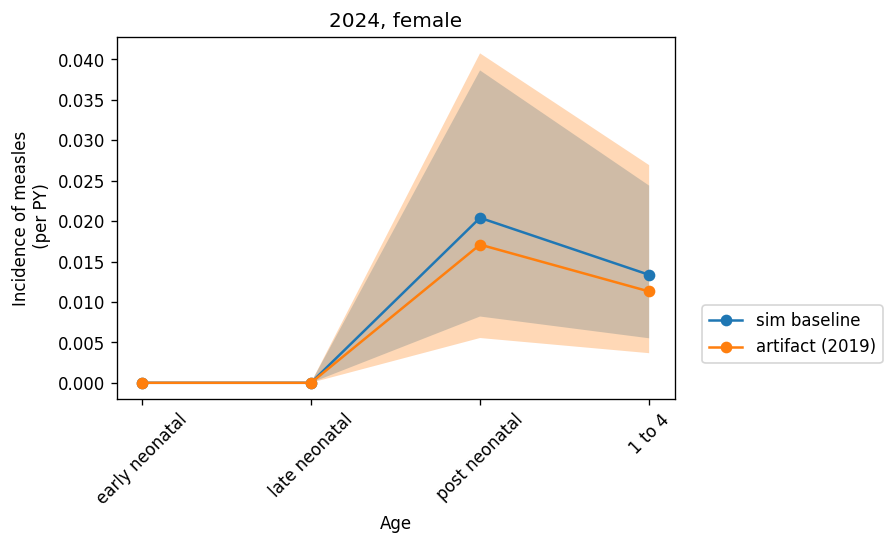

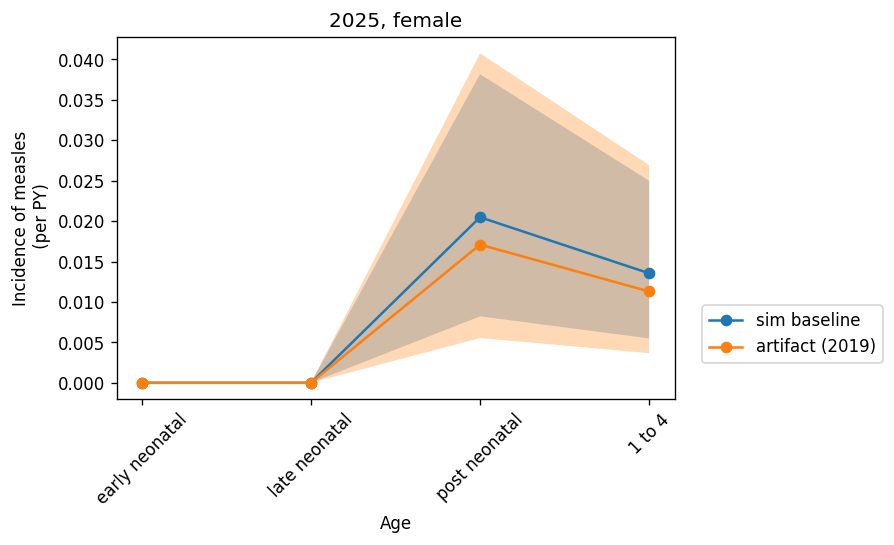

In [82]:
with PdfPages(output_dir + 'diarrhea_incidence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(incidence_dd, art_incidence_dd, sim_year, 2019, sex, 'incidence_dd')           
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'lri_incidence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(incidence_lri, art_incidence_lri, sim_year, 2019, sex, 'incidence_lri')
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'measles_incidence.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(incidence_msls, art_incidence_msls, sim_year, 2019, sex, 'incidence_msls')
            pdf.savefig(bbox_inches='tight')

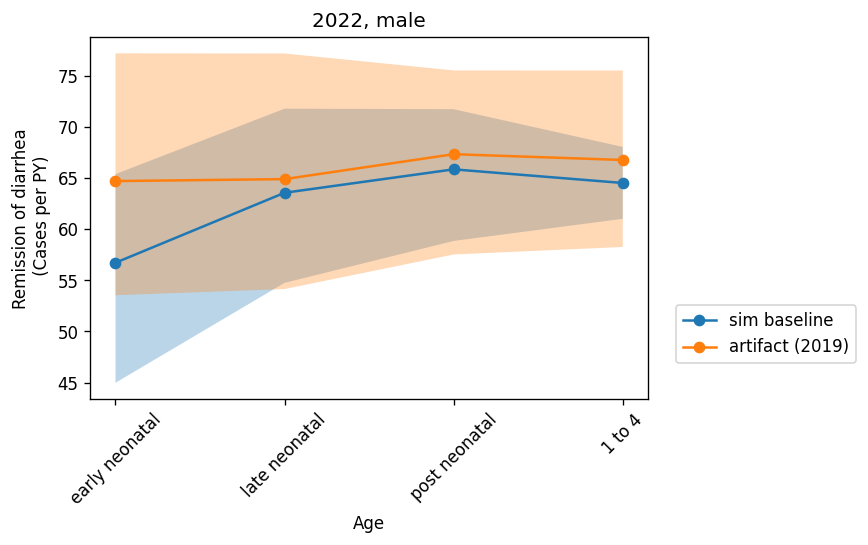

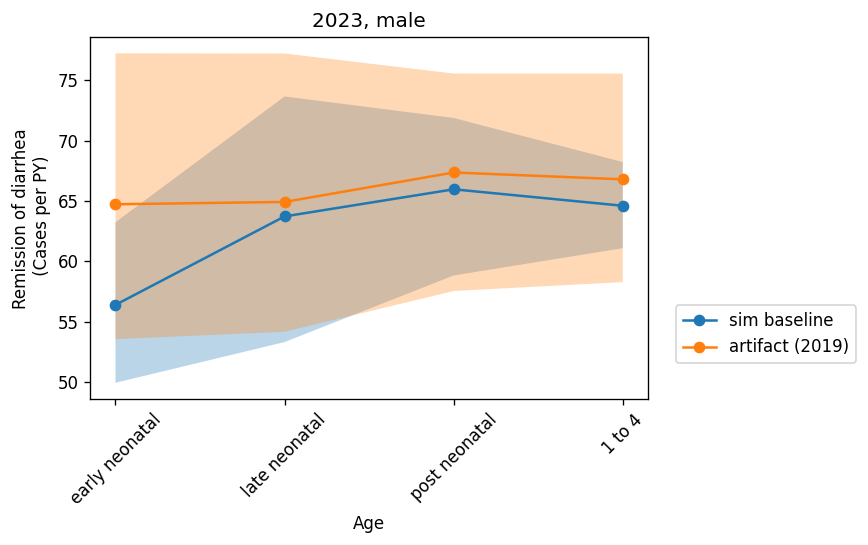

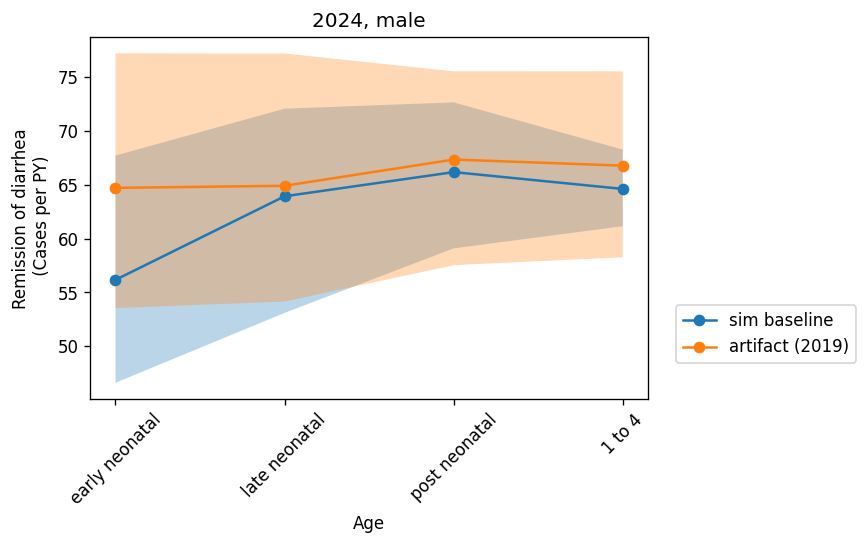

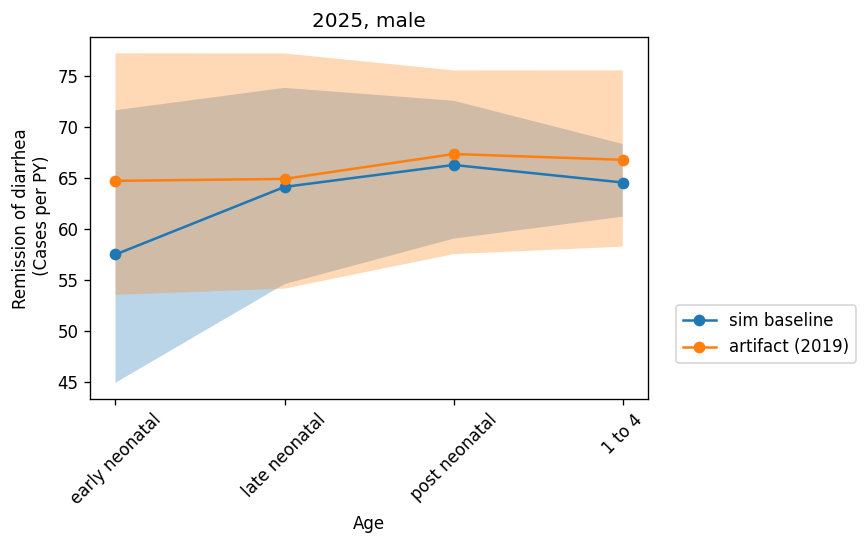

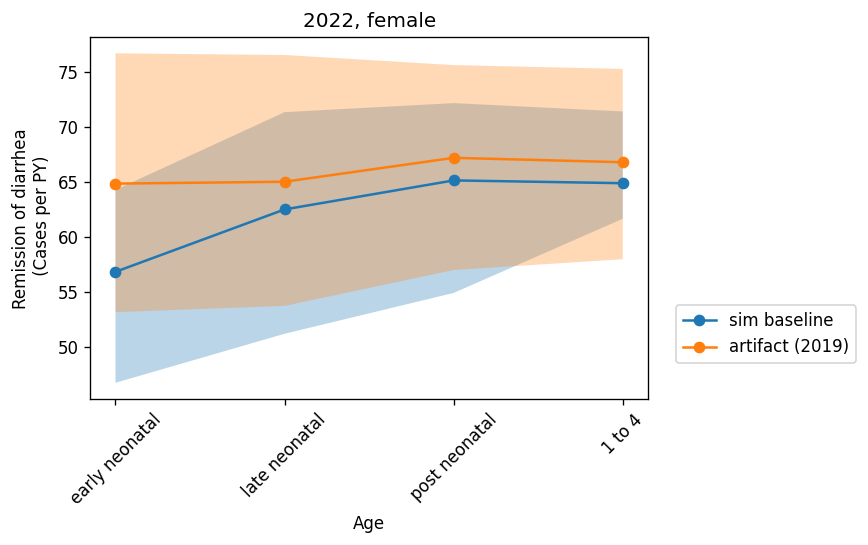

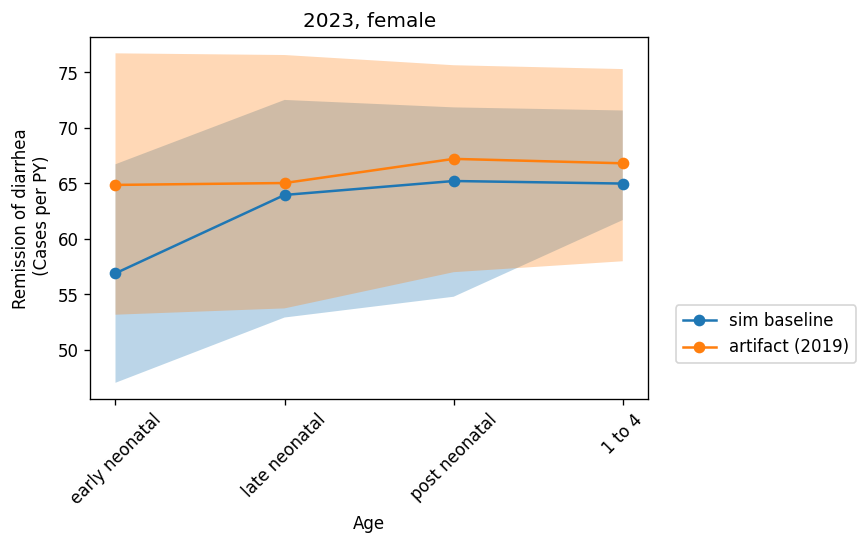

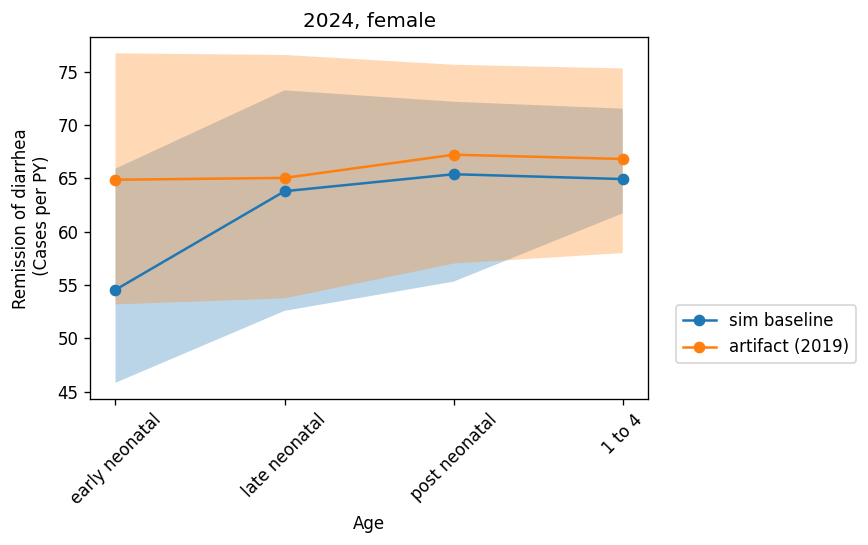

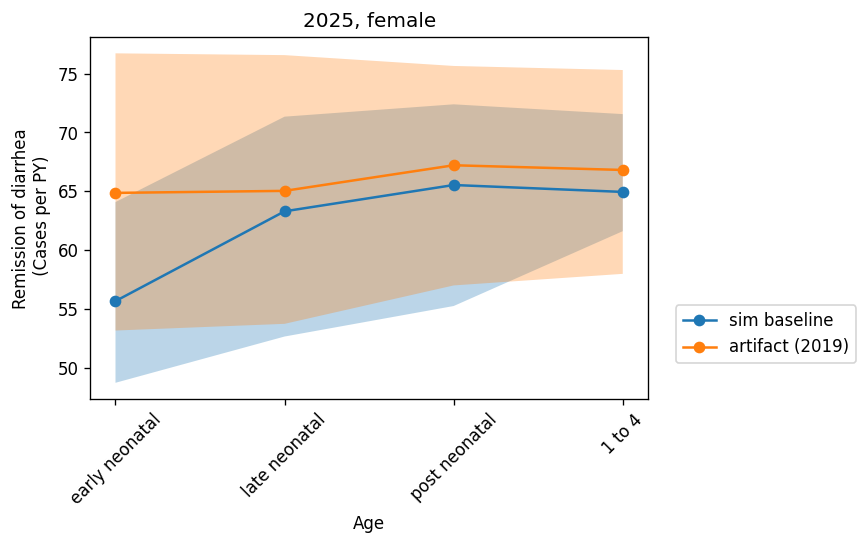

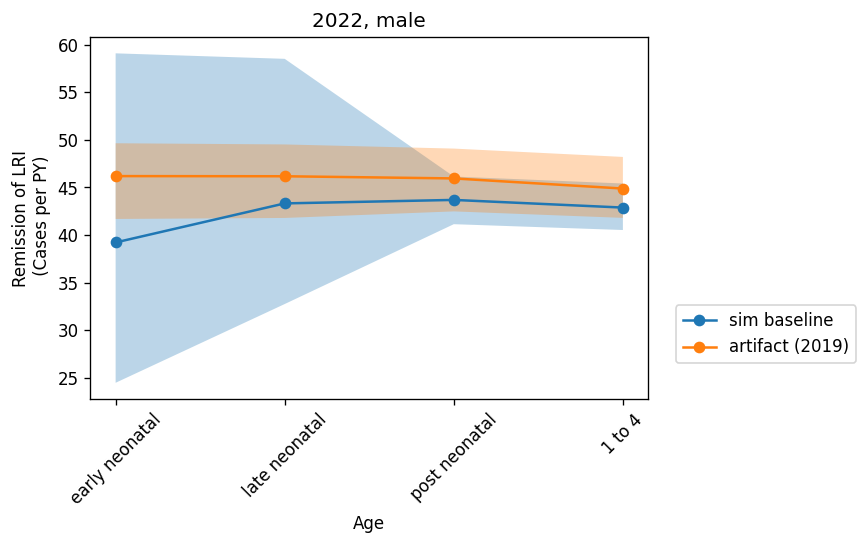

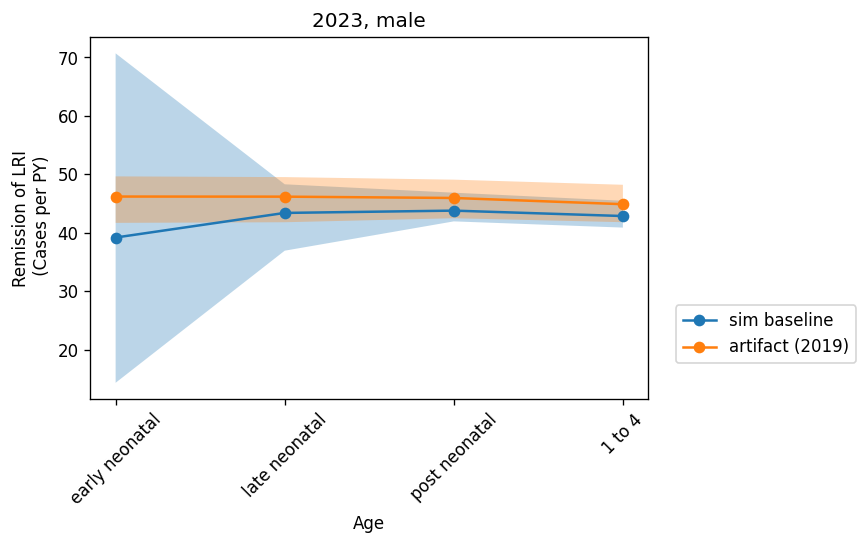

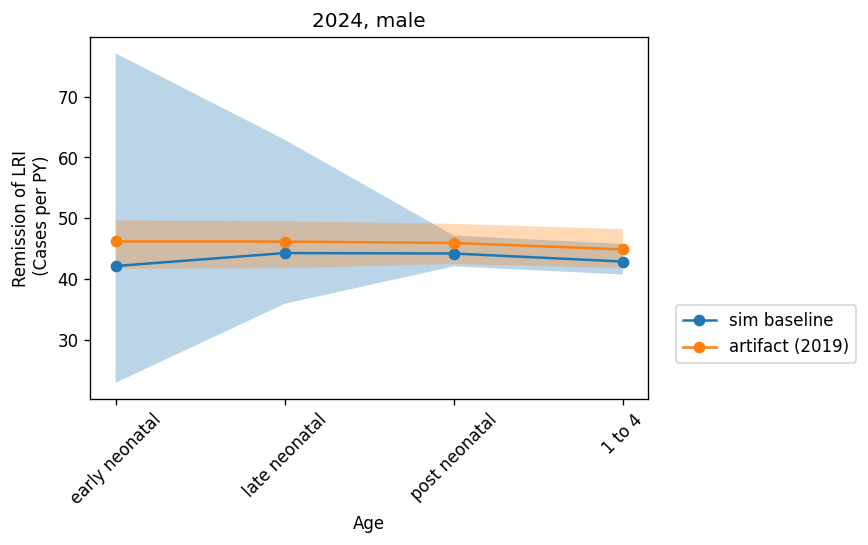

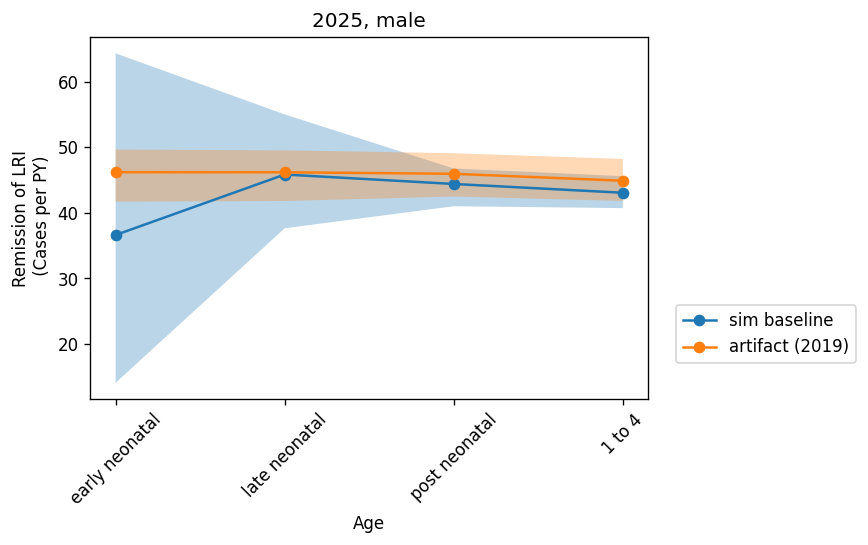

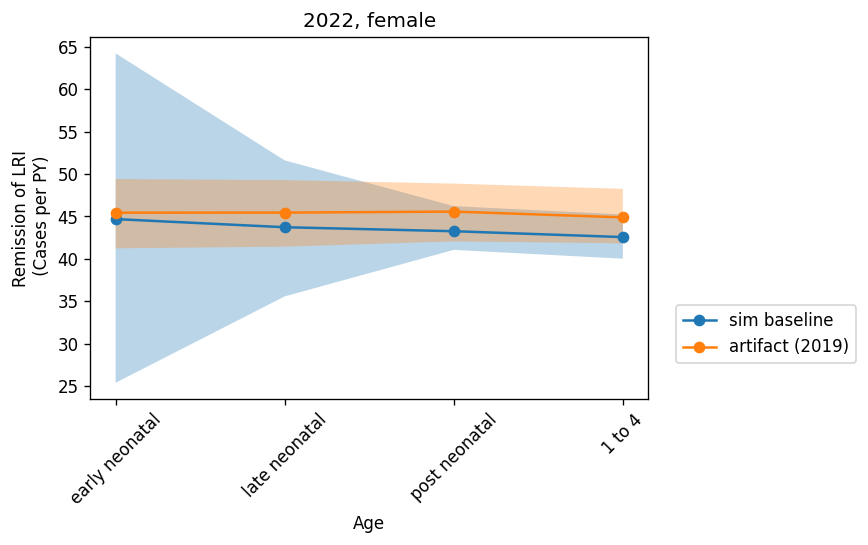

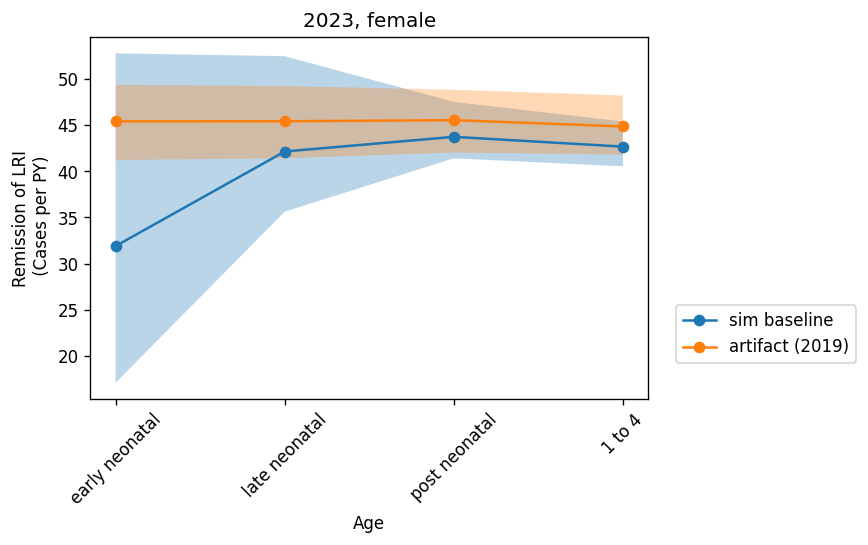

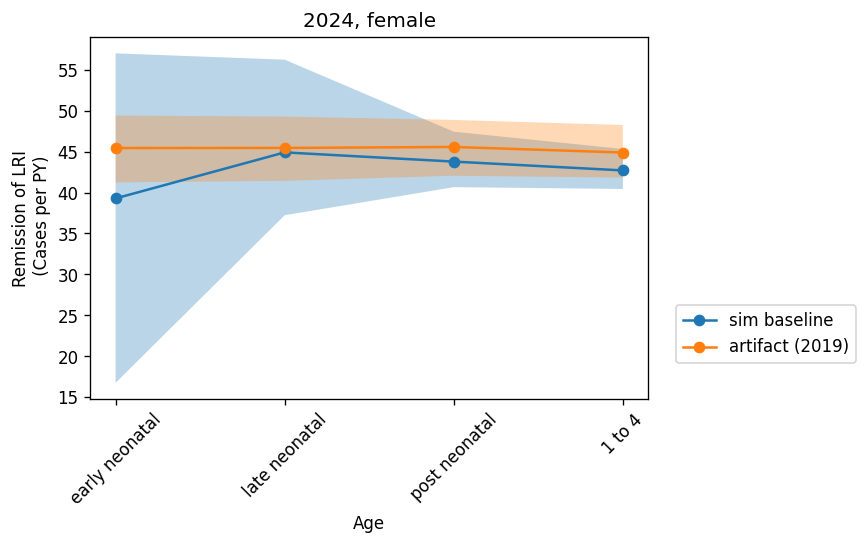

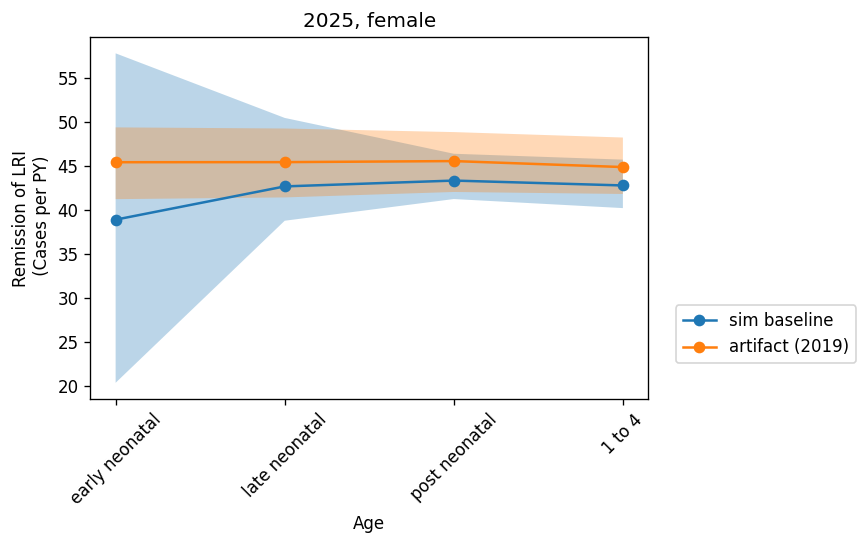

In [83]:
with PdfPages(output_dir + 'diarrhea_remission.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(remission_dd, art_remission_dd, sim_year, 2019, sex, 'remission_dd')
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'lri_remission.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(remission_lri, art_remission_lri, sim_year, 2019, sex, 'remission_lri')            
            pdf.savefig(bbox_inches='tight')
            
# with PdfPages(output_dir + 'measles_remission.pdf') as pdf:
#     for sex in ['male', 'female']:
#         for sim_year in range(2022, 2026):
#             plot_sim_vs_artifact(remission_msls, art_remission_msls, sim_year, 2019, sex, 'remission_msls')
#             pdf.savefig(bbox_inches='tight')

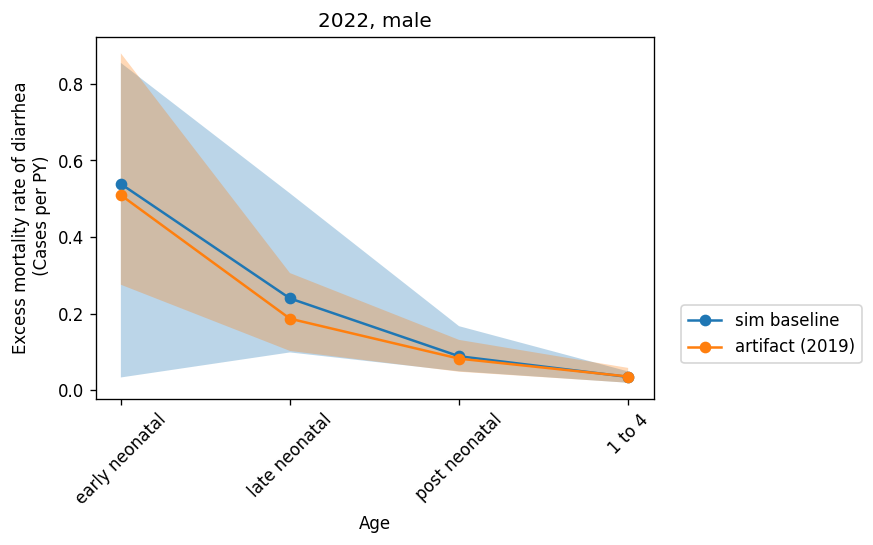

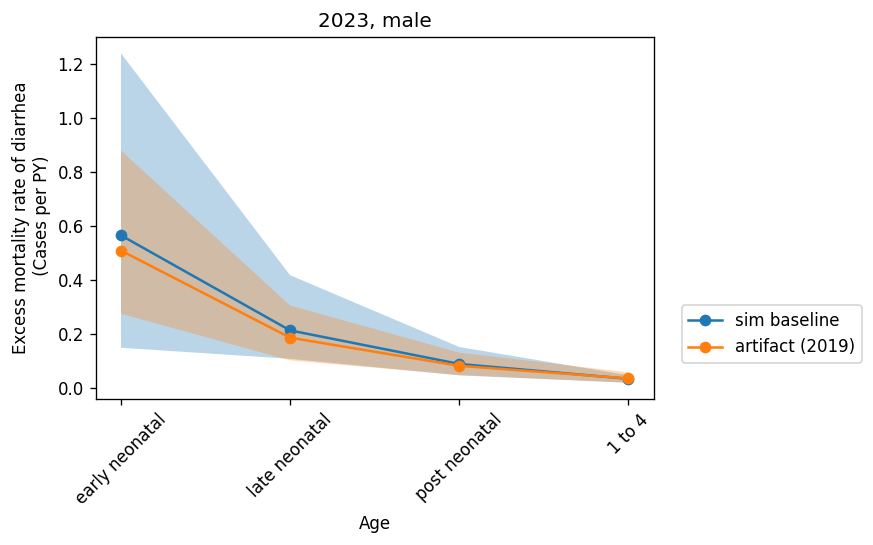

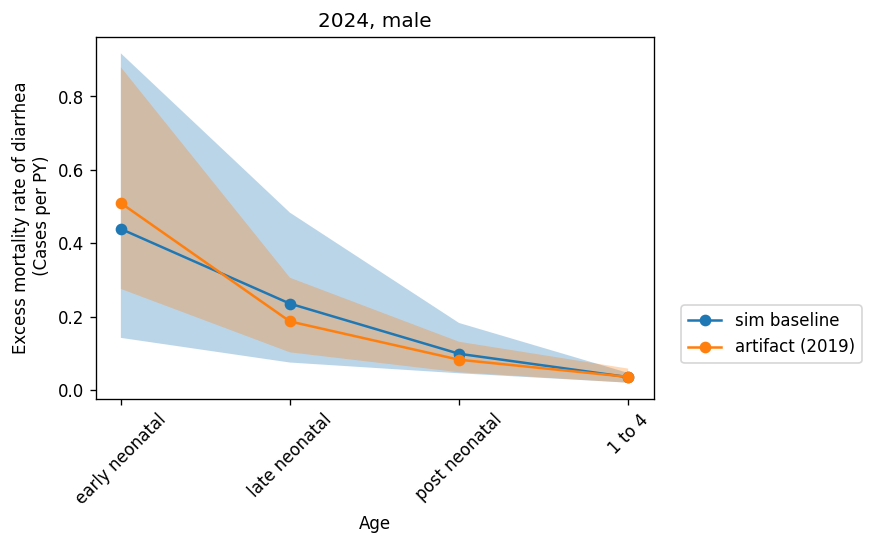

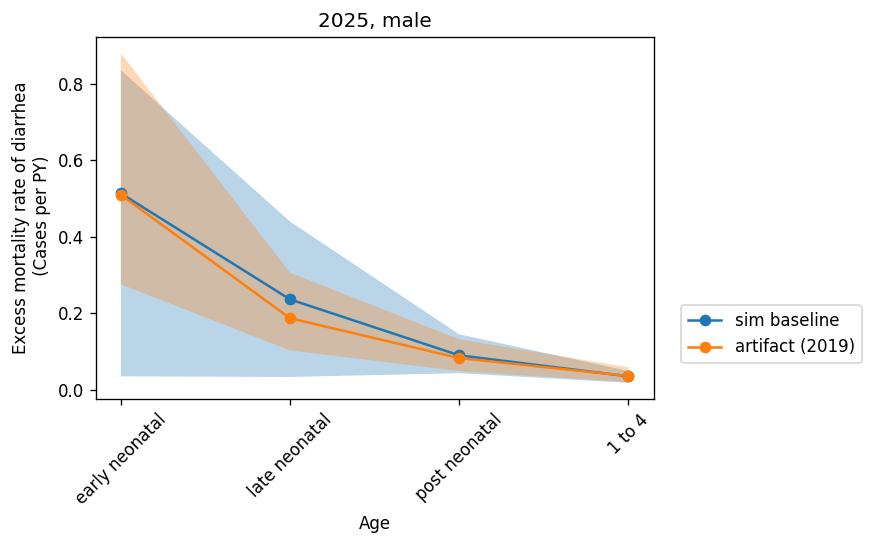

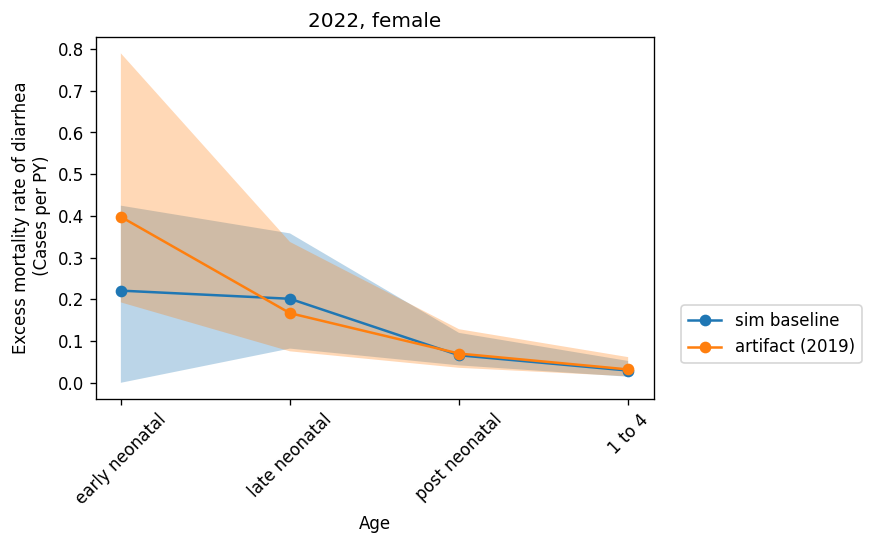

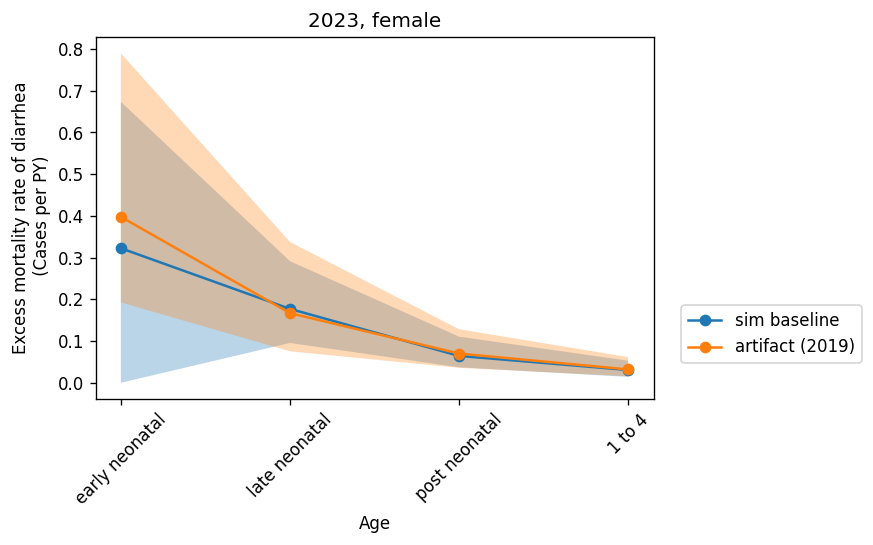

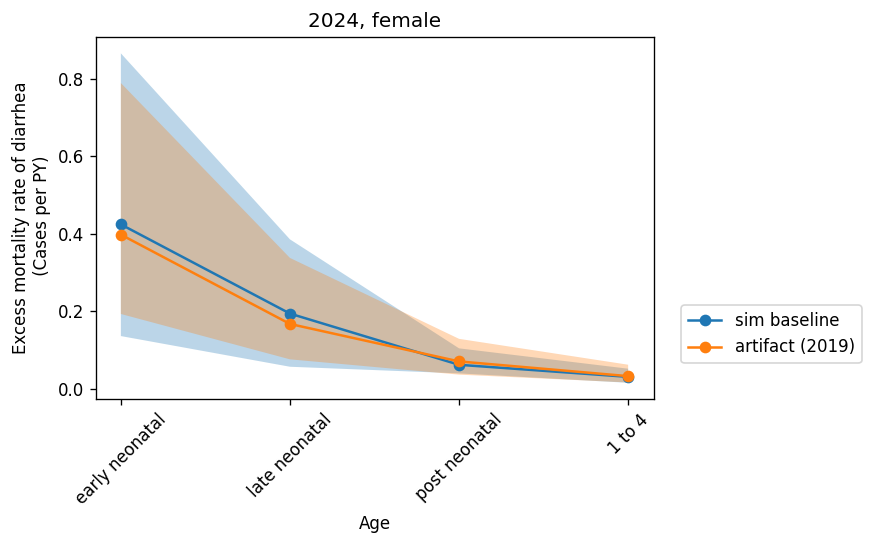

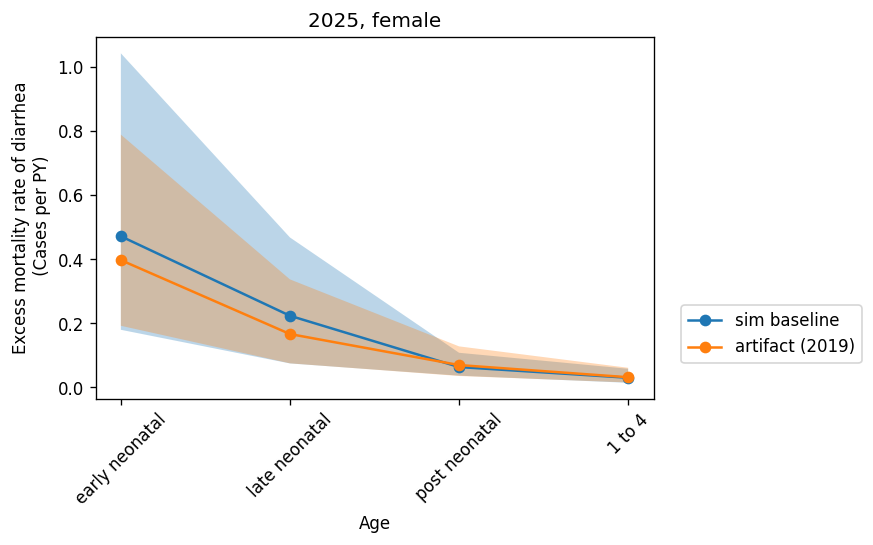

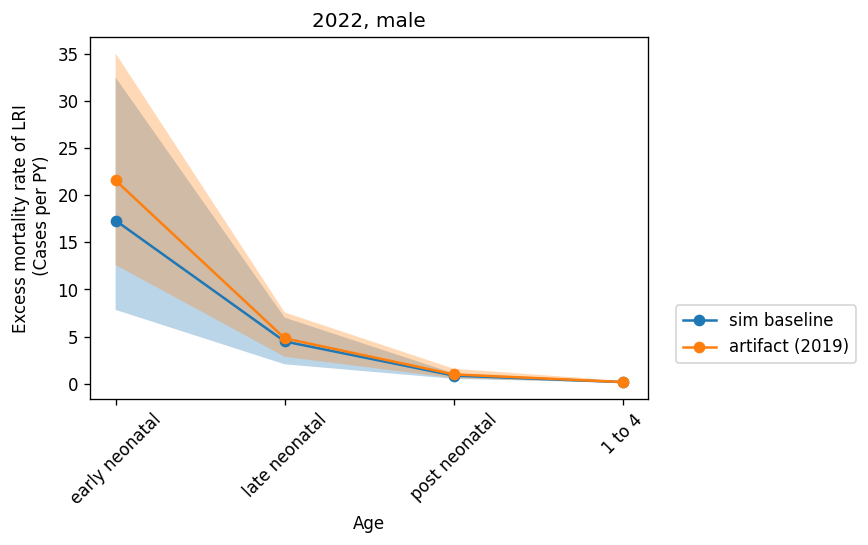

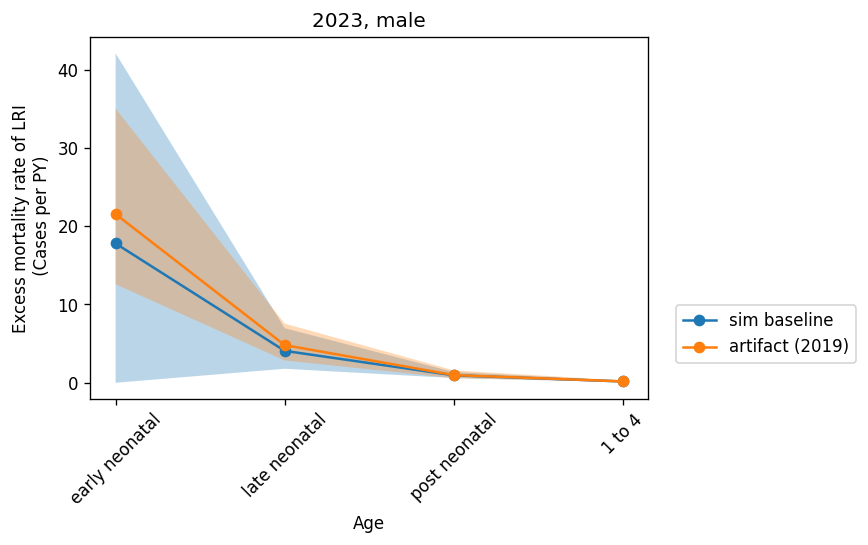

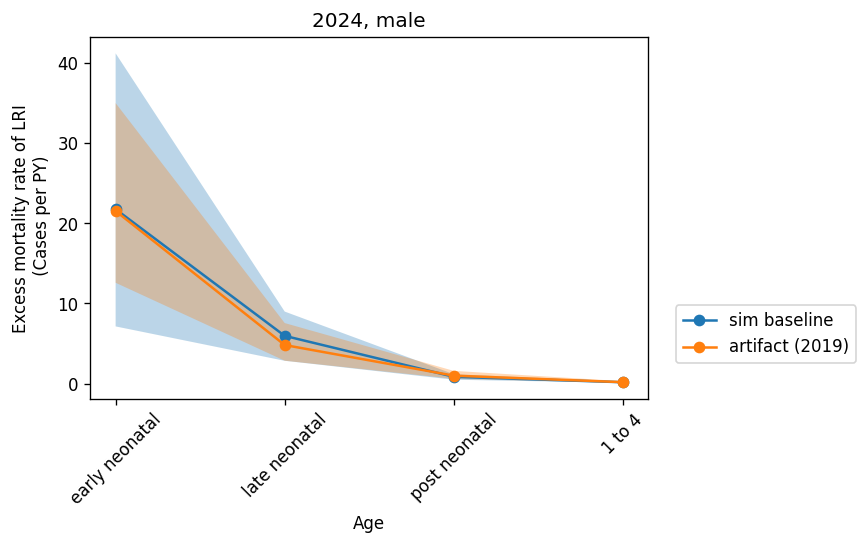

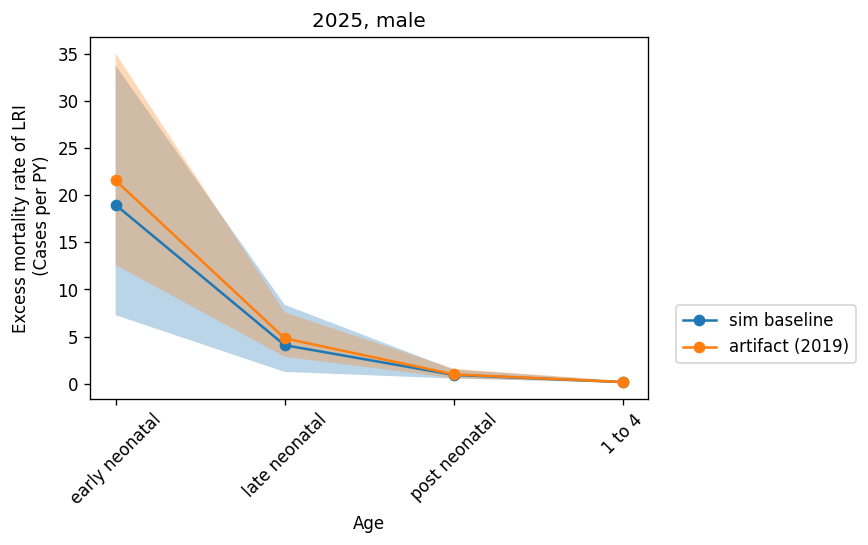

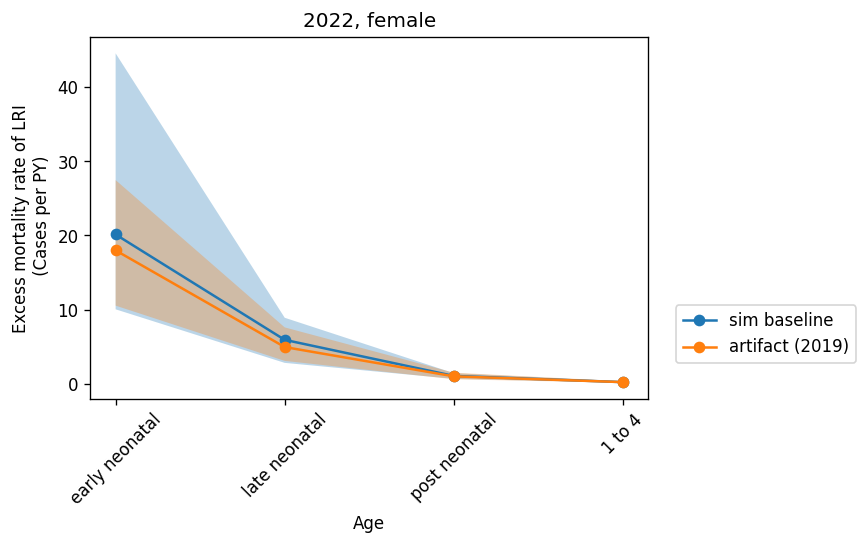

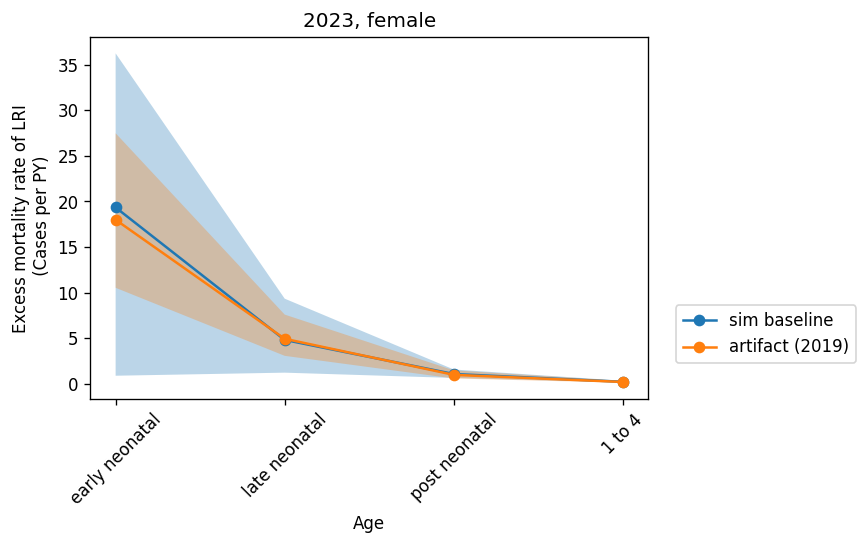

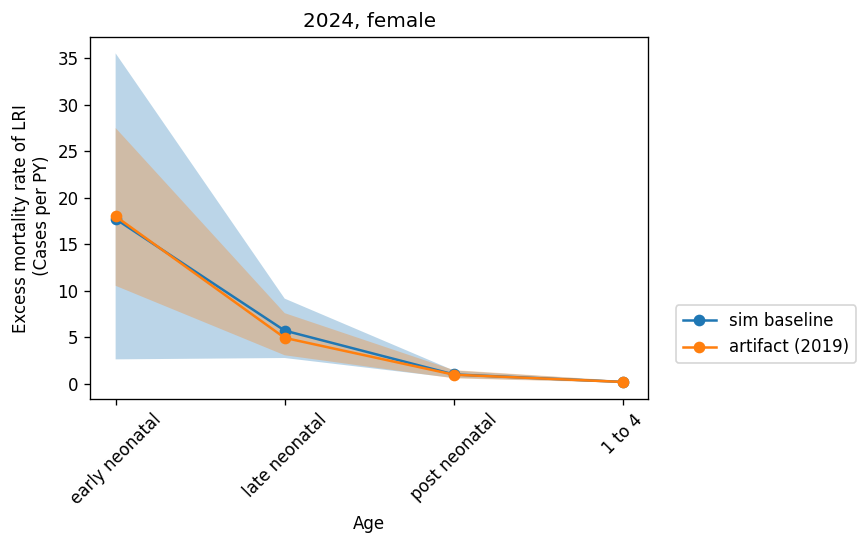

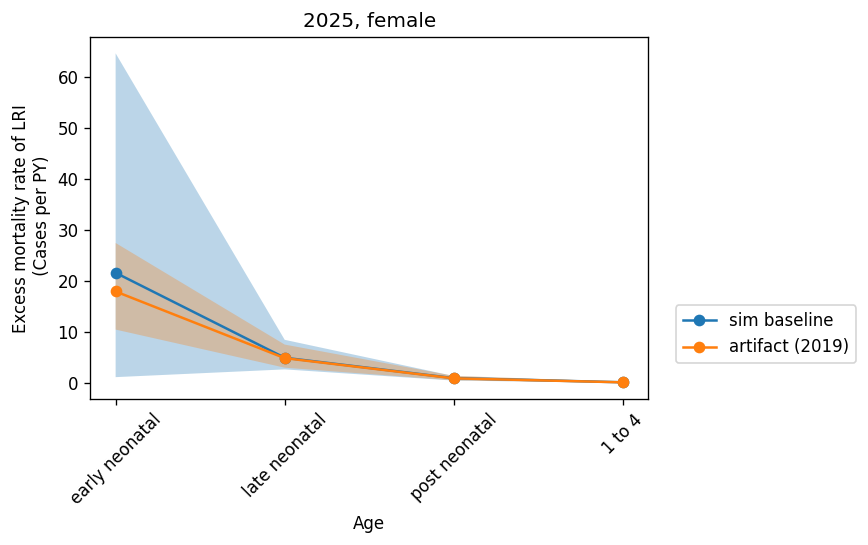

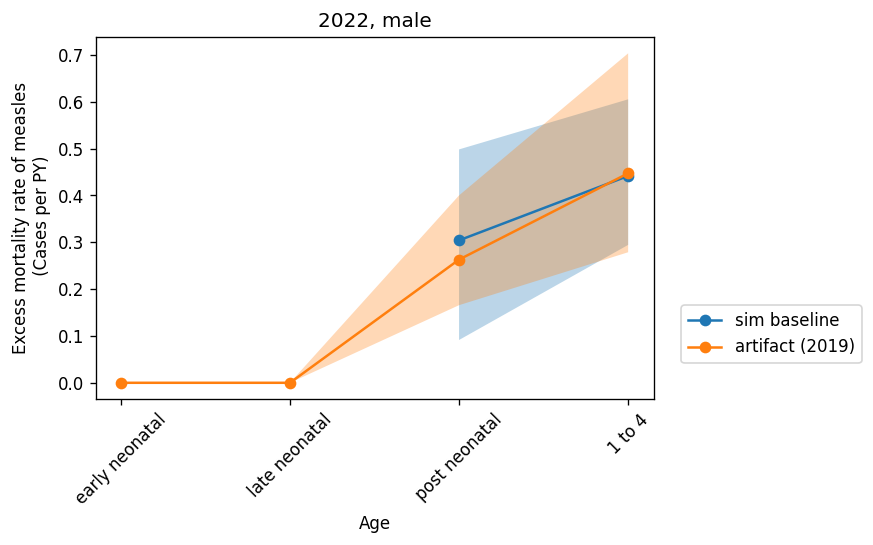

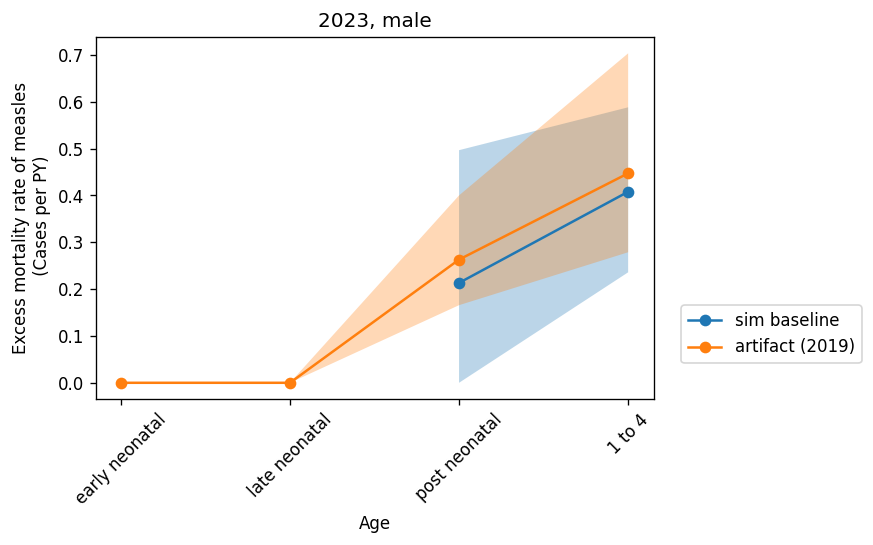

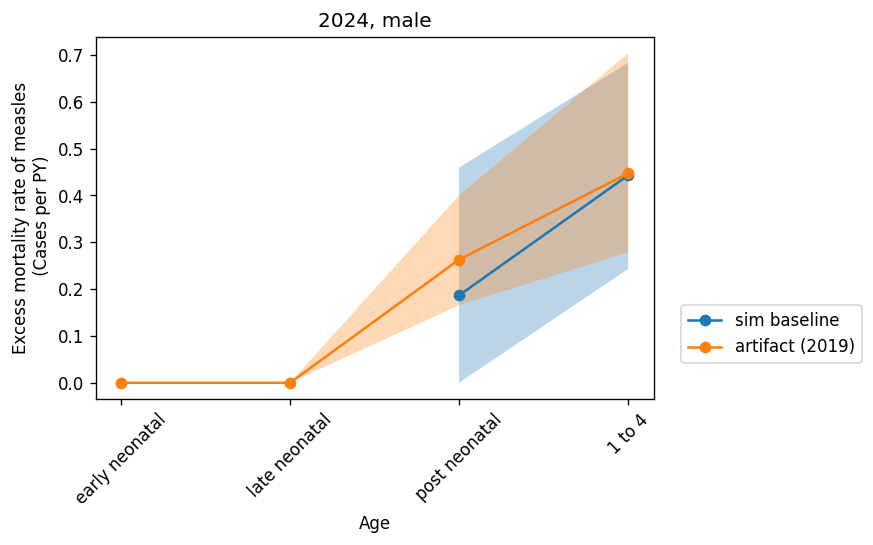

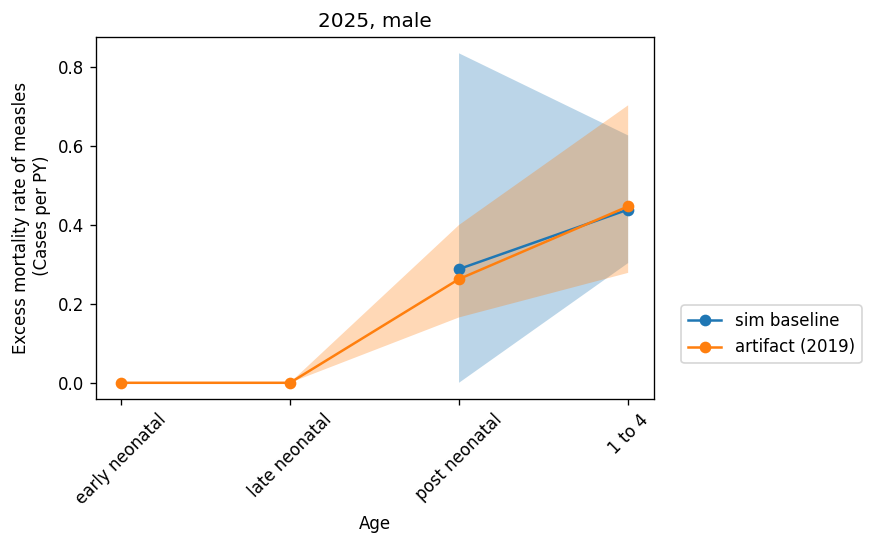

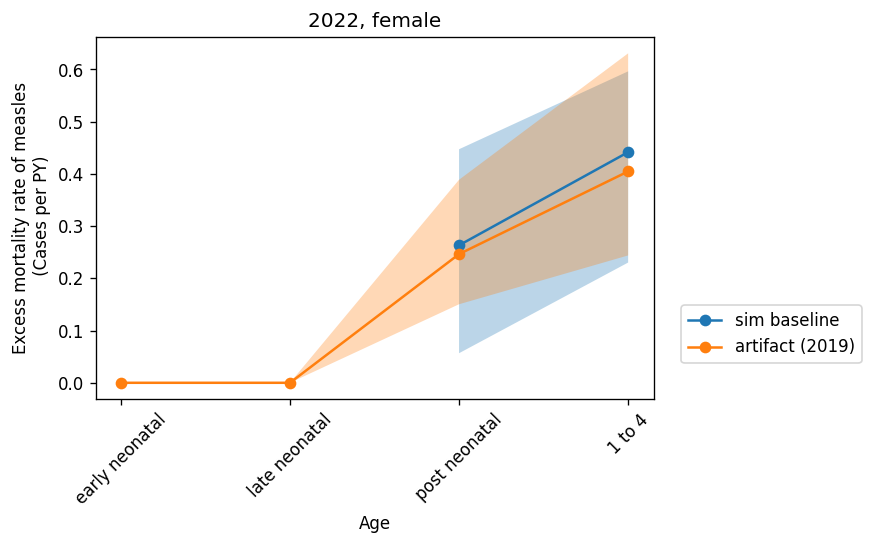

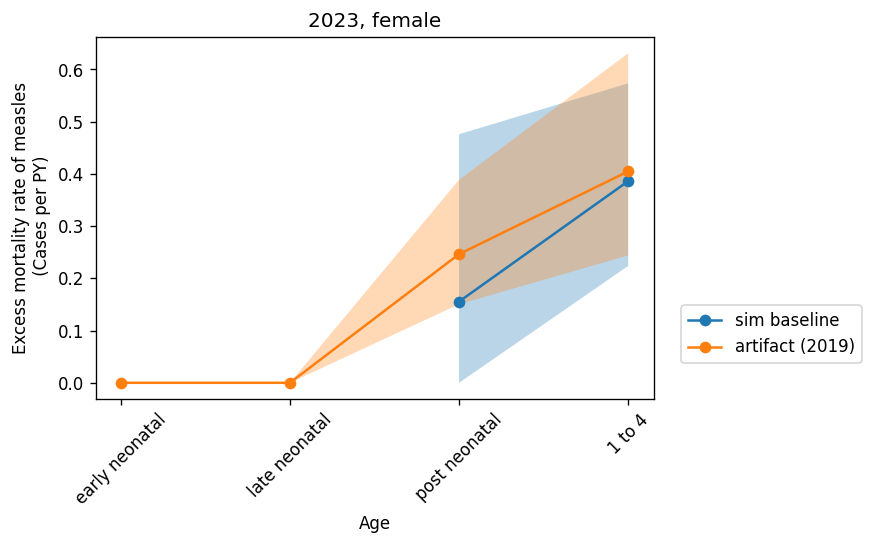

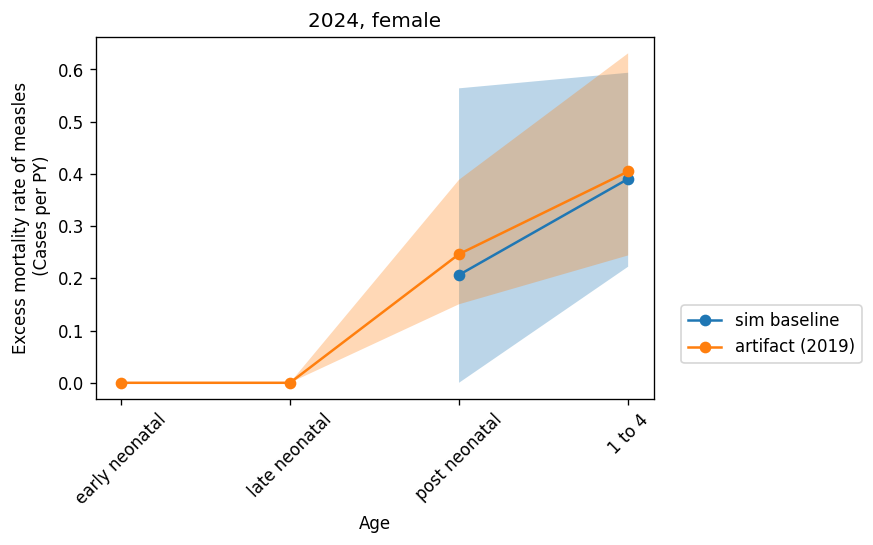

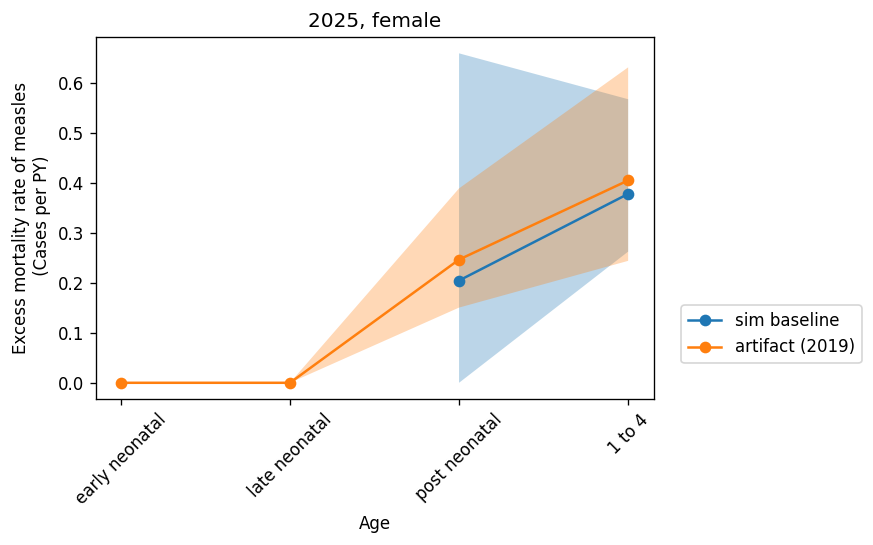

In [84]:
with PdfPages(output_dir + 'diarrhea_emr.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(emr_dd, art_emr_dd, sim_year, 2019, sex, 'emr_dd')    
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'lri_emr.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(emr_lri, art_emr_lri, sim_year, 2019, sex, 'emr_lri')      
            pdf.savefig(bbox_inches='tight')
            
with PdfPages(output_dir + 'measles_emr.pdf') as pdf:
    for sex in ['male', 'female']:
        for sim_year in range(2022, 2026):
            plot_sim_vs_artifact(emr_msls, art_emr_msls, sim_year, 2019, sex, 'emr_msls')        
            pdf.savefig(bbox_inches='tight')

================================== END ==============================================